## Importing Libraries

In [1]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing important libraries
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 300)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.impute import KNNImputer # to impute missing values

from sklearn.preprocessing import MinMaxScaler # for scaling

from sklearn.decomposition import PCA # for PCA

from sklearn.decomposition import IncrementalPCA # for Incremental PCA

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# confusion matrix
from sklearn import metrics

# precision and recall
from sklearn.metrics import precision_score, recall_score

# Precision and recall trade off
from sklearn.metrics import precision_recall_curve

# Model Building
import statsmodels.api as sm

# ROC Curve
from sklearn.metrics import plot_roc_curve

# tree
from sklearn import tree

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# for train-test split and GridSearchCV
from sklearn import model_selection

## Reading and Inspecting Data

In [3]:
df = pd.read_csv("telecom_churn_data.csv", sep = ",", encoding = "ISO-8859-1", header = 0)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
df.shape

(99999, 226)

In [7]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

## Data Cleaning

Removing certain columns that won't be useful to the analysis, like: mobile_number, all the numerical columns that have a single value, and the date columns since those are not important to the analysis

In [8]:
cols_to_delete = ['mobile_number','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8', 'date_of_last_rech_data_9'] 

numerics = ['int32','int64','float32','float64']
numericCols = df.select_dtypes(include=numerics).columns # getting a list of numerical columns

for col in numericCols:
    if (df[col].min() == df[col].max()):
        cols_to_delete.append(col)

cols_to_delete # print columns to delete

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

Appending columns that have null values above 70% to ***cols_to_delete*** variable. Even if those missing values are meaningful missing values, imputing those will make the features highly biased and hence won't be important for the analysis.

In [9]:
for col in df.columns:
    if (df[col].isnull().sum()/df.shape[0] >= 0.7):
        cols_to_delete.append(col) # append columns with more than 70% null values
        print(col + " :  " +str(100*df[col].isnull().sum()/df.shape[0])) # print the columns with more than 70% null values and also the percentage of null values in those features

date_of_last_rech_data_6 :  74.84674846748467
date_of_last_rech_data_7 :  74.42874428744287
date_of_last_rech_data_8 :  73.66073660736608
date_of_last_rech_data_9 :  74.07774077740777
total_rech_data_6 :  74.84674846748467
total_rech_data_7 :  74.42874428744287
total_rech_data_8 :  73.66073660736608
total_rech_data_9 :  74.07774077740777
max_rech_data_6 :  74.84674846748467
max_rech_data_7 :  74.42874428744287
max_rech_data_8 :  73.66073660736608
max_rech_data_9 :  74.07774077740777
count_rech_2g_6 :  74.84674846748467
count_rech_2g_7 :  74.42874428744287
count_rech_2g_8 :  73.66073660736608
count_rech_2g_9 :  74.07774077740777
count_rech_3g_6 :  74.84674846748467
count_rech_3g_7 :  74.42874428744287
count_rech_3g_8 :  73.66073660736608
count_rech_3g_9 :  74.07774077740777
av_rech_amt_data_6 :  74.84674846748467
av_rech_amt_data_7 :  74.42874428744287
av_rech_amt_data_8 :  73.66073660736608
av_rech_amt_data_9 :  74.07774077740777
arpu_3g_6 :  74.84674846748467
arpu_3g_7 :  74.428744287

In [10]:
cols_to_delete # final list of columns that we will delete before filtering high-value customers

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count

In [11]:
df.drop(cols_to_delete, axis = 1, inplace = True) # dropping the columns above
df.shape # Checking the shape of the dataframe again

(99999, 165)

Converting some columns to the correct data type i.e. converting any columns with unique values less than or equal to 31 to categorical columns.

In [12]:
toConvert = []

for col in df.columns:
    uniqueVal = df[col].nunique() # getting unique values of each column
    if (uniqueVal <= 31): # any column with unique values less than or equal to 31
        print(col + " : " + str(uniqueVal)) # print the column and the number of unique value
        toConvert.append(col)

monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_2g_9 : 5
monthly_3g_6 : 12
monthly_3g_7 : 15
monthly_3g_8 : 12
monthly_3g_9 : 11
sachet_3g_6 : 25
sachet_3g_7 : 27
sachet_3g_8 : 29
sachet_3g_9 : 27


Looking at the value_counts for the above columns before converting them to the data type of 'object' i.e. to categorical column to check if they are skewed or not.

In [13]:
for col in toConvert:
    print(col)
    print(df[col].value_counts(normalize = True)*100)
    print("------------")

monthly_2g_6
0    92.674927
1     6.728067
2     0.562006
3     0.028000
4     0.007000
Name: monthly_2g_6, dtype: float64
------------
monthly_2g_7
0    92.435924
1     6.855069
2     0.669007
3     0.033000
4     0.005000
5     0.002000
Name: monthly_2g_7, dtype: float64
------------
monthly_2g_8
0    92.591926
1     6.775068
2     0.586006
3     0.037000
4     0.008000
5     0.002000
Name: monthly_2g_8, dtype: float64
------------
monthly_2g_9
0    93.735937
1     5.695057
2     0.530005
3     0.033000
4     0.006000
Name: monthly_2g_9, dtype: float64
------------
monthly_3g_6
0     94.290943
1      4.472045
2      0.861009
3      0.237002
4      0.076001
5      0.034000
6      0.012000
7      0.009000
8      0.003000
9      0.002000
11     0.002000
14     0.001000
Name: monthly_3g_6, dtype: float64
------------
monthly_3g_7
0     94.326943
1      4.263043
2      1.016010
3      0.227002
4      0.074001
5      0.042000
6      0.026000
7      0.010000
8      0.005000
9      0.004000


Above columns are highly skewed. These columns contain more than 90% of the value of '0'. So these columns won't be useful. Hence, dropping these columns

In [14]:
df.drop(toConvert, axis = 1, inplace = True)
df.shape

(99999, 153)

Now that high missing columns and highly skewed columns have been removed, will impute other columns with null values. Looking at columns with null values

In [15]:
null_cols = [] # list to keep column names with null values

for col in df.columns:
    if ((df[col].isnull().sum() / df.shape[0]) > 0): # cols with null percentage greater than 0
        null_cols.append(col)
        print(col + " : " +str(100 * df[col].isnull().sum() / df.shape[0])) # print only the columns with null values with the percentage of null values

onnet_mou_6 : 3.937039370393704
onnet_mou_7 : 3.8590385903859037
onnet_mou_8 : 5.3780537805378055
onnet_mou_9 : 7.745077450774508
offnet_mou_6 : 3.937039370393704
offnet_mou_7 : 3.8590385903859037
offnet_mou_8 : 5.3780537805378055
offnet_mou_9 : 7.745077450774508
roam_ic_mou_6 : 3.937039370393704
roam_ic_mou_7 : 3.8590385903859037
roam_ic_mou_8 : 5.3780537805378055
roam_ic_mou_9 : 7.745077450774508
roam_og_mou_6 : 3.937039370393704
roam_og_mou_7 : 3.8590385903859037
roam_og_mou_8 : 5.3780537805378055
roam_og_mou_9 : 7.745077450774508
loc_og_t2t_mou_6 : 3.937039370393704
loc_og_t2t_mou_7 : 3.8590385903859037
loc_og_t2t_mou_8 : 5.3780537805378055
loc_og_t2t_mou_9 : 7.745077450774508
loc_og_t2m_mou_6 : 3.937039370393704
loc_og_t2m_mou_7 : 3.8590385903859037
loc_og_t2m_mou_8 : 5.3780537805378055
loc_og_t2m_mou_9 : 7.745077450774508
loc_og_t2f_mou_6 : 3.937039370393704
loc_og_t2f_mou_7 : 3.8590385903859037
loc_og_t2f_mou_8 : 5.3780537805378055
loc_og_t2f_mou_9 : 7.745077450774508
loc_og_t2c

All the null values that exist are less than 10%. So will impute those using KNN Imputer from SKLearn Library.  

Compared to using simple imputation methods like replacing with mean/median, KNN Imputer takes longer, but the accuracy of the model increases with KNN Imputer

In [16]:
%%time

cols = df.columns 

imputer = KNNImputer(n_neighbors = 5, weights = 'uniform', metric = 'nan_euclidean')
imputer.fit(df[cols])

df[cols] = imputer.transform(df[cols])

df.head()

Wall time: 19min 24s


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,40.102,17.28,0.00,4.532,94.592,103.516,0.00,24.532,4.64,0.566,0.00,0.00,50.316,47.476,0.00,2.768,3.902,8.054,0.00,2.052,29.804,23.738,0.00,8.502,0.328,0.388,0.00,0.00,0.0,0.00,0.00,0.00,34.038,32.184,0.00,10.556,24.388,8.894,0.00,2.48,25.61,32.18,0.00,12.974,0.332,0.062,0.00,0.282,50.334,41.14,0.00,15.738,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,11.042,3.502,0.16,6.472,22.986,22.528,4.13,13.852,0.226,0.07,1.15,0.20,34.254,26.104,5.44,20.526,1.834,1.668,0.00,0.286,2.67,5.322,0.00,4.098,2.70,3.508,0.00,0.494,7.204,10.498,0.00,4.88,0.00,0.00,5.44,0.00,0.118,0.082,0.0,0.642,0.77,0.00,0.0,0.00,0.00,0.00,0.0,0.052,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.110,78.68,7.68,18.340,15.740,99.840,304.76,53.760,0.00,0.000,0.00,0.00,0.000,0.000,0.00,0.000,23.880,74.560,7.68,18.340,11.510,75.940,291.86,53.760,0.000,0.000,0.00,0.00,0.0,2.91,0.00,0.00,35.390,150.510,299.54,72.110,0.230,4.110,0.00,0.00,0.00,0.46,0.13,0.000,0.000,0.000,0.00,0.000,0.230,4.58,0.13,0.000,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.610,29.910,29.23,116.090,17.480,65.380,375.58,56.930,0.000,8.93,3.61,0.00,19.090,104.230,408.43,173.030,0.000,0.000,2.35,0.000,5.90,0.000,12.49,15.010,0.00,0.000,0.00,0.000,5.900,0.000,14.84,15.01,26.83,104.23,423.28,188.04,0.000,0.000,0.0,0.000,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.000,4.0,9.0,11.0,5.0,74.0,384.0,283.0,121.0,44.0,154.0,65.0,50.0,44.0,23.0,30.0,0.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0.0,0.0,2.0,0.0,1006.0,0.0,0.0,0.00,0.00
2,167.690,189.058,210.226,290.714,11.540,55.24,37.26,74

Confirming again to check if any null values exist in the dataset

In [17]:
df.isnull().values.any()

False

## Filtering high-value customers

In [18]:
for col in df.columns:
    if col.startswith('total_rech_amt') :
        print(col)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9


To filter high-value customers, need to do the following steps:
- Find Average recharge amount in the first 2 months i.e. the good phase
- Find the 70th percentile of that average recharge amount
- Get customers who have the average recharge of equal or more than 70th percentile of the average recharge amount

In [19]:
df['total_rech_amt_good_avg'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2
df.shape

(99999, 154)

In [20]:
df.drop(['total_rech_amt_6','total_rech_amt_7'], axis = 1, inplace = True) # since we derived a new feature which we will do for all the months of 6 and 7
df.shape

(99999, 152)

In [21]:
df['total_rech_amt_good_avg'].quantile([0.7])

0.7    368.5
Name: total_rech_amt_good_avg, dtype: float64

In [22]:
high_df = df[df['total_rech_amt_good_avg'] >= 368.5]
high_df.shape

(30011, 152)

## Derive Churn

Will create a column 'churn' based on the 9th month:
- Users who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

Attributes:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [23]:
high_df[(high_df['total_ic_mou_9'] == 0) & (high_df['total_og_mou_9'] == 0) & (high_df['vol_2g_mb_9'] == 0) & (high_df['vol_3g_mb_9'] == 0)]

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_avg
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.290,34.414,453.43,567.16,325.910,185.482,16.23,33.49,31.640,25.078,23.74,12.59,38.060,37.456,51.39,31.38,40.280,25.754,308.63,447.38,162.280,86.460,62.13,55.14,53.230,12.470,0.00,0.00,0.000,0.000,422.16,533.91,255.790,124.692,4.30,23.29,12.010,2.074,49.89,31.76,49.140,34.440,6.66,20.08,16.68,0.070,60.86,75.14,77.840,36.588,0.00,0.18,10.01,20.234,4.50,0.00,6.500,1.422,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.0,58.14,32.26,27.310,22.474,217.56,221.49,121.190,87.438,152.16,101.46,39.530,8.072,427.88,355.23,188.040,117.992,36.89,11.83,30.390,8.236,91.44,126.99,141.330,18.692,52.19,34.24,22.210,3.406,180.54,173.08,193.940,30.338,626.46,558.04,428.74,0.0,0.21,0.0,0.000,0.000,2.06,14.53,31.590,44.302,15.74,15.19,15.140,0.000,5.0,5.0,7.0,3.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
97,374.863,294.023,183.043,0.000,433.59,415.66,221.060,87.726,74.54,43.66,31.860,8.978,0.00,0.00,6.160,1.408,0.00,0.00,23.910,13.818,2.83,16.19,9.730,1.310,16.99,23.14,17.790,3.740,3.54,1.46,1.830,0.000,0.40,0.00,0.000,0.000,23.38,40.81,29.360,5.054,430.76,399.46,191.310,72.596,53.59,13.81,8.330,5.218,0.00,0.00,0.00,0.000,484.36,413.28,199.640,77.814,0.00,0.00,0.00,0.000,2.54,11.81,2.010,0.582,0.86,0.0,0.0,0.0,511.16,465.91,231.03,0.0,11.61,32.89,4.460,2.040,16.94,26.94,26.630,5.940,0.98,0.63,0.000,0.000,29.54,60.48,31.090,7.984,0.49,1.36,1.060,1.548,0.00,4.16,0.000,6.478,0.00,0.00,0.000,0.000,0.49,5.53,1.060,8.026,32.04,67.84,32.16,0.0,0.63,0.0,0.000,0.018,0.00,0.00,0.000,0.000,1.36,1.83,0.000,0.000,14.0,17.0,14.0,3.0,206.0,0.0,36.0,44.0,36.0,0.0,30.0,20.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502.0,0.00,0.00,0.00,0.0,3

There are 2593 rows where users have churned. So assigning the value '1' for new column 'churn' where users churned, for other rows the value will be 0.

In [24]:
high_df['churn'] = np.where(((high_df['total_ic_mou_9']== 0) & (high_df['total_og_mou_9']== 0) & (high_df['vol_2g_mb_9']== 0) & (high_df['vol_3g_mb_9']== 0)), 1, 0)

len(high_df[high_df['churn'] == 1]) # confirming the number of rows where churn is 1

2593

Since all the churned customers have been tagged, all the attributes of the churn phase are no longer required. Hence dropping all attributes having ‘ _9’, etc. in their names.

In [25]:
churnCols = []

for col in high_df.columns:
    if col.endswith('_9'):
        churnCols.append(col)

print(churnCols) # print the features of 9th month
print(len(churnCols)) # print the number of columns corresponding to the churn phase

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'sachet_2g_9']
37


In [26]:
final_df = high_df.copy() # create a new dataframe 

final_df.drop(churnCols, axis = 1, inplace = True)
final_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_avg,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,3.0,315.0,21.03,910.65,122.16,0.0,519.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6.0,4.0,11.0,717.0,110.0,110.0,130.0,110.0,50.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,3.0,2607.0,0.00,0.00,0.00,0.0,380.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.4

In [27]:
final_df.shape

(30011, 116)

## Data Preparation

### Checking churn percentage

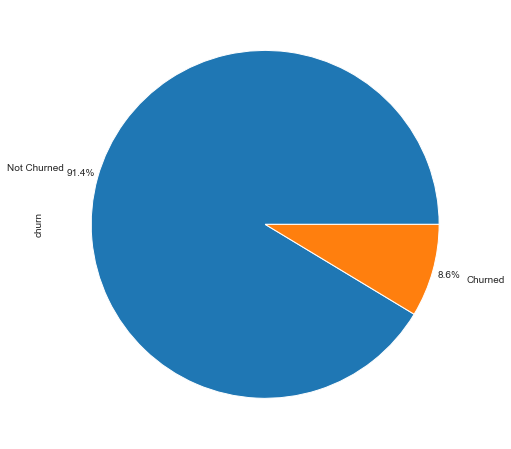

In [28]:
(final_df['churn'].value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, figsize = (8,8), labels = ["Not Churned", "Churned"])

plt.show()

"Churn" feature is highly skewed. To balance this column, will use "class_weight" command during the modeling process instead of using Undersampling/Oversampling.

For easier exploratory analysis, deriving some new features. Taking the average of the first 2 months i.e. Month 6 and Month 7, and will derive a new column for each feature using that. The new feature will be that of the good phase.

In [29]:
month_6 = [] # store all the features with _6 in the end
month_7 = [] # store all the features with _7 in the end

for col in final_df.columns:
    if col.endswith('_6'):
        month_6.append(col)
    elif col.endswith('_7'):
        month_7.append(col)

print('Month 6')
print(month_6) # print all the column names with _6 in the end
print(len(month_6))

print('-------------')

print('Month 7')
print(month_7) # print all the column names with _7 in the end
print(len(month_7))

Month 6
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'sachet_2g_6']
36
-------------
Month 7
['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',

In [30]:
final_df.shape

(30011, 116)

In [31]:

for i in range(0,len(month_6)): 
    final_df[month_6[i].rstrip('_6') + '_good_avg'] = (final_df[month_6[i]] + final_df[month_7[i]]) / 2 # strip _6 from end, and add good_avg in the end for the average of the good phase

final_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_avg,churn,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_t2f_mou_good_avg,std_og_mou_good_avg,isd_og_mou_good_avg,spl_og_mou_good_avg,og_others_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg,sachet_2g_good_avg
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,0.0,0.0,0.000,0.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,3.0,315.0,21.03,910.65,

Checking the shape of the dataframe after adding the new derived features

In [32]:
final_df.shape

(30011, 152)

Removing the features with _6 and _7 in the end after deriving new features and the old features are no longer required.

In [33]:
final_df.drop(month_6, axis = 1, inplace = True)
final_df.drop(month_7, axis = 1, inplace = True)
final_df.shape

(30011, 80)

Inspecting the final dataframe

In [34]:
final_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_avg,churn,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_t2f_mou_good_avg,std_og_mou_good_avg,isd_og_mou_good_avg,spl_og_mou_good_avg,og_others_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg,sachet_2g_good_avg
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7.0,3638.0,1580.0,779.0,0.00,0.00,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,0.0,0.0,0.000,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14.0,120.0,30.0,10.0,0.03,11.94,3.0,315.0,21.03,910.65,122.16,0.0,519.0,0,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,122.0,25.0,178.0,375.475,0.5
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11.0,717.0,130.0,0.0,0.02,0.00,3.0,2607.0,0.00,0.00,0.00,0.0,380.0,0,349.2585,305.075,266.295,83.885,21.620,27.910,99.205,2.270,0.0,129.395,266.195,154.150,0.00,420.355,0.00,0.00,0.000,549.750,37.730,80.705,2.405,120.845,76.985,168.960,0.000,245.950,570.595,0.225,153.695,49.860,5.0,110.0,80.0,0.0,0.000,0.0
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2.0,160.0,130.0,130.0,0.00,0.00,0.0,511.0,0.00,2.45,21.89,0.0,459.0,0,365.4220,62.260,263.015,1.415,8.870,53.885,209.640,2.240,0.0,265.775,5.235,43.750,0.00,48.990,0.00,1.63,0.000,316.410,56.385,188.250,8.695,253.345,73.715,45.880,0.255,119.860,373.210,0.000,0.000,0.000,8.0,110.0,100.0,0.0,0.000,0.0
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.0,30.0,30.0,0.0,0.00,0.00,0.0,667.0,0.00,0.00,0.00,0.0,408.0,0,354.4940,597.595,30.820,2.380,4.230,19.495,29.270,0.000,0.0,48.770,573.860,0.775,0.00,574.635,0.00,1.29,0.465,625.170,17.270,24.860,0.000,42.135,4.315,0.640,0.000,4.955,47.095,0.000,0.000,0.000,10.5,55.0,15.0,0.0,0.000,0.0


In [35]:
final_df.describe(percentiles= (0.25,0.5,0.75,0.9,0.95,0.99))

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_good_avg,churn,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_t2f_mou_good_avg,std_og_mou_good_avg,isd_og_mou_good_avg,spl_og_mou_good_avg,og_others_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg,sachet_2g_good_avg
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,534.857433,268.426020,376.581904,13.525878,21.817647,87.426689,168.314860,6.535477,1.741426,262.285557,172.602509,180.068620,1.801039,354.476099,2.046408,6.976760,0.059289,623.774684,66.318929,154.712817,14.803148,235.844627,15.123363,30.607696,2.700823,48.435657,295.426531,0.028260,11.800014,1.247142,10.225317,613.638799,162.869348,95.653294,69.209105,269.864111,0.607611,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356,0.086402,588.209915,300.724786,421.910293,15.643116,25.925057,95.351742,181.675356,7.061603,1.724989,284.097636,195.113009,208.598120,2.032753,405.748227,2.263227,6.706880,0.371534,697.911136,69.705221,160.651514,16.101226,246.467944,16.607713,32.832580,2.947602,52.391916,311.193772,0.042859,11.830729,1.340352,12.017394,173.537553,104.886392,78.515195,268.243209,0.543784
std,492.259586,466.176149,476.488250,74.623524,106.276978,234.658008,234.501295,20.217222,7.400313,365.977399,409.915893,416.608087,11.705855,615.807120,44.800387,22.903006,3.320342,685.983313,155.629720,216.553157,43.705618,306.237899,72.426029,105.280303,20.275110,140.905585,360.343153,0.116707,74.954044,12.890794,9.478572,601.821630,172.605809,145.260363,268.494284,859.299266,1.844444,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088,0.280961,409.006147,437.805619,440.462334,67.570537,94.943276,229.208742,230.726883,21.500983,6.703361,357.471457,389.755868,395.486538,11.892365,575.919464,44.830497,18.349341,1.845414,610.373239,154.149523,208.576250,44.586452,298.744911,76.240418,95.191586,18.805503,134.98910

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   arpu_8                     30011 non-null  float64
 1   onnet_mou_8                30011 non-null  float64
 2   offnet_mou_8               30011 non-null  float64
 3   roam_ic_mou_8              30011 non-null  float64
 4   roam_og_mou_8              30011 non-null  float64
 5   loc_og_t2t_mou_8           30011 non-null  float64
 6   loc_og_t2m_mou_8           30011 non-null  float64
 7   loc_og_t2f_mou_8           30011 non-null  float64
 8   loc_og_t2c_mou_8           30011 non-null  float64
 9   loc_og_mou_8               30011 non-null  float64
 10  std_og_t2t_mou_8           30011 non-null  float64
 11  std_og_t2m_mou_8           30011 non-null  float64
 12  std_og_t2f_mou_8           30011 non-null  float64
 13  std_og_mou_8               30011 non-null  flo

### Outlier Treatment

Plotting boxplots for each feature and then treating the outliers.

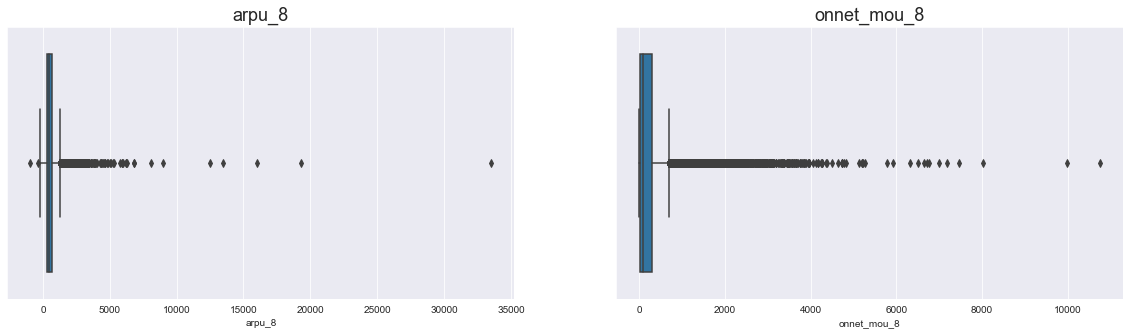

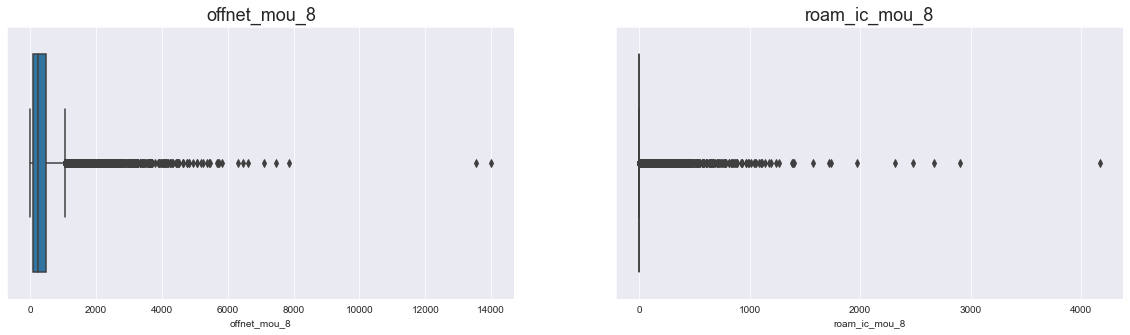

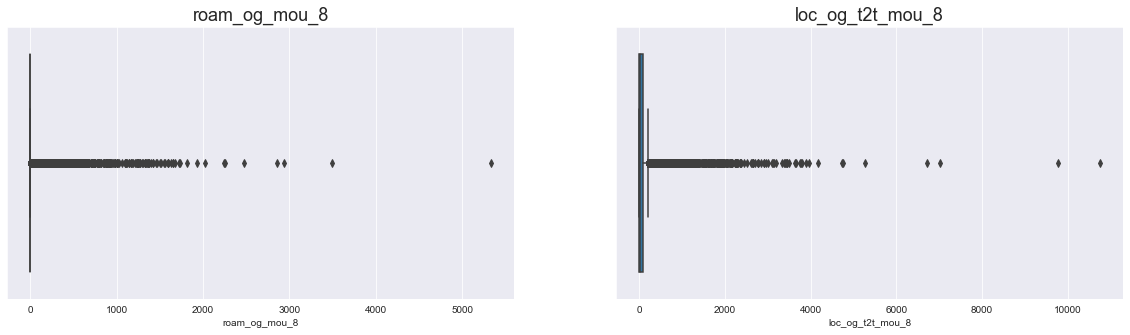

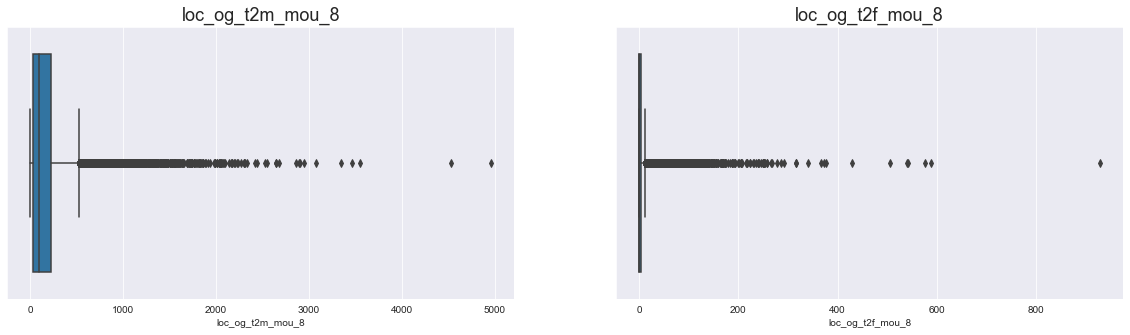

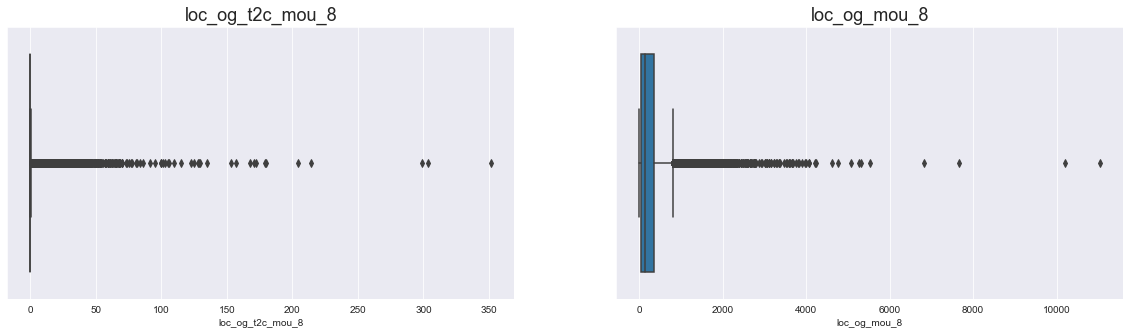

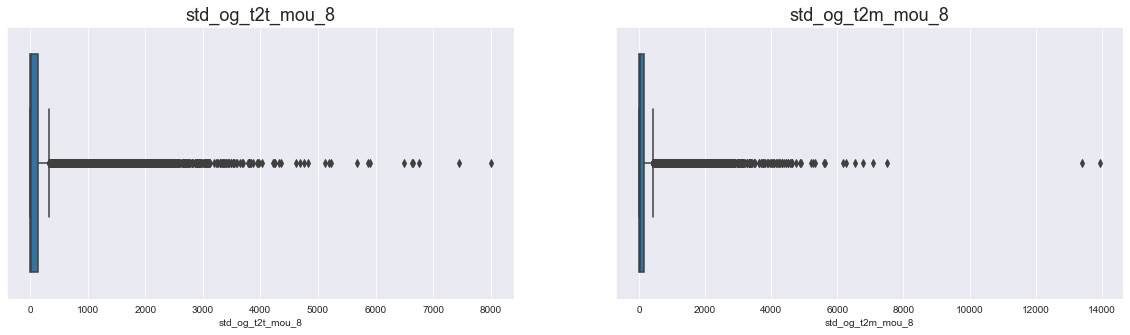

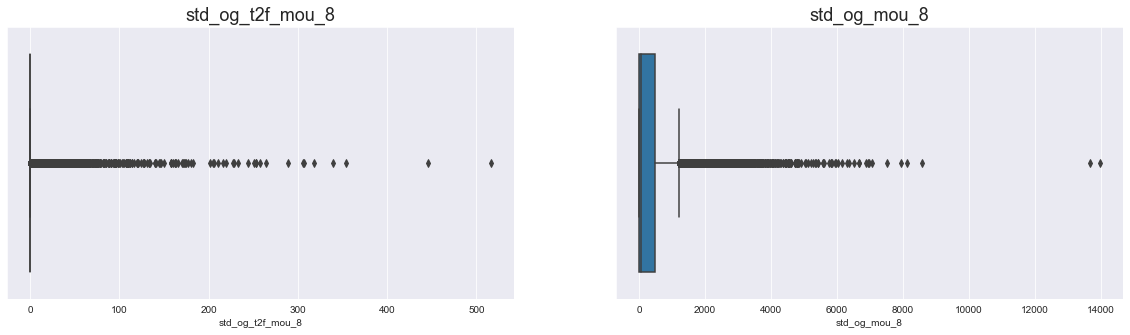

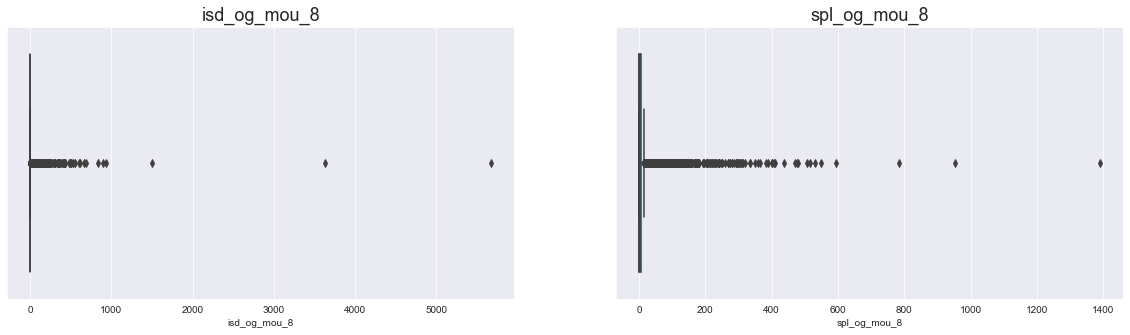

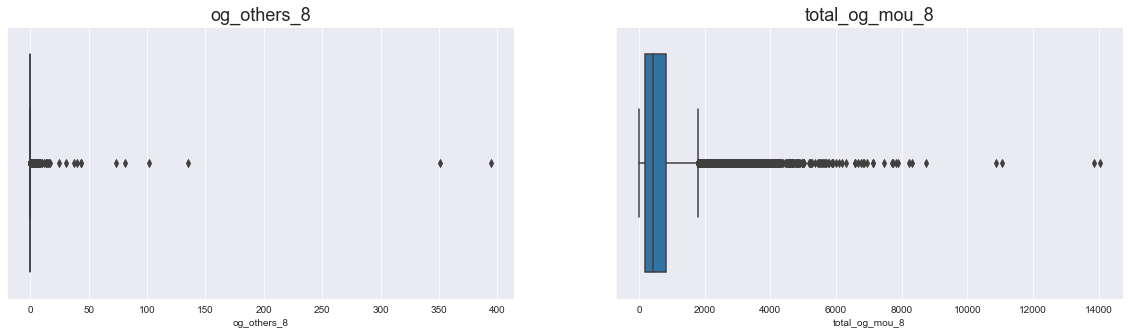

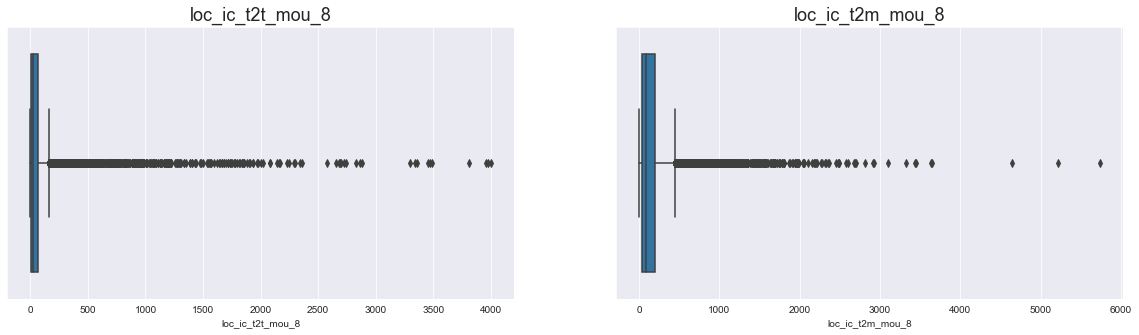

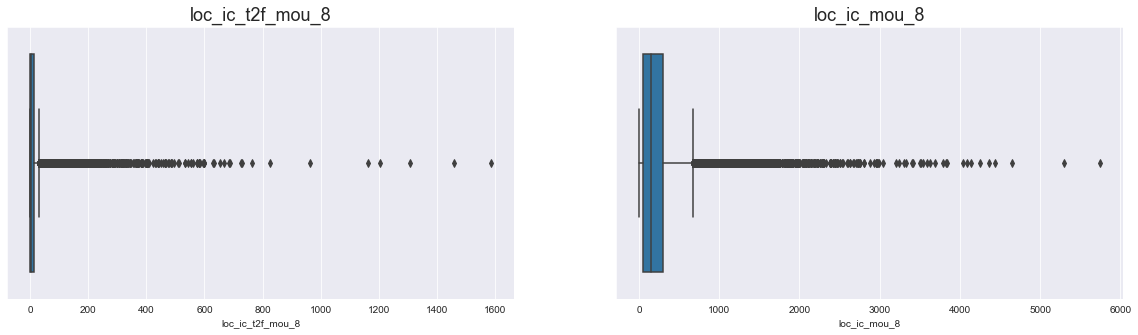

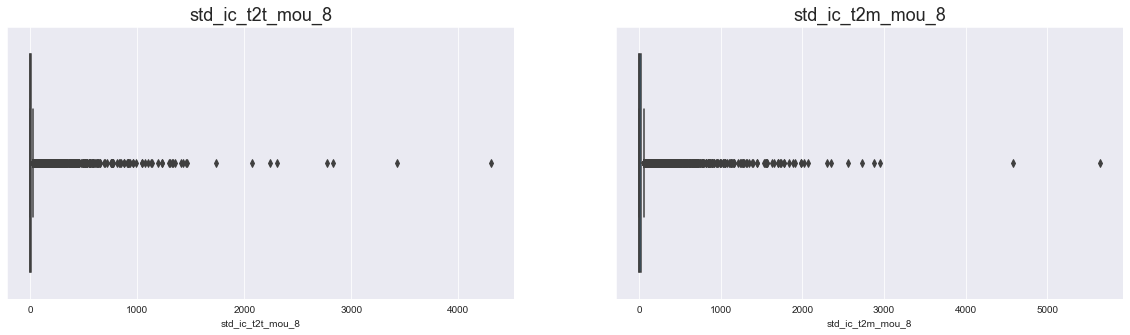

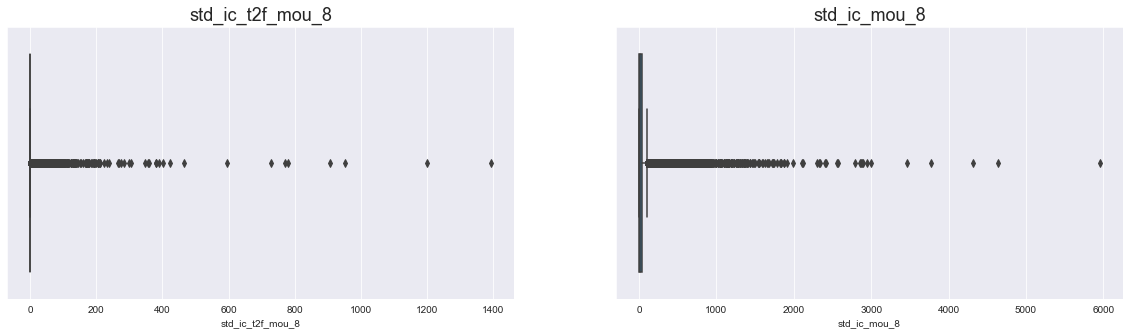

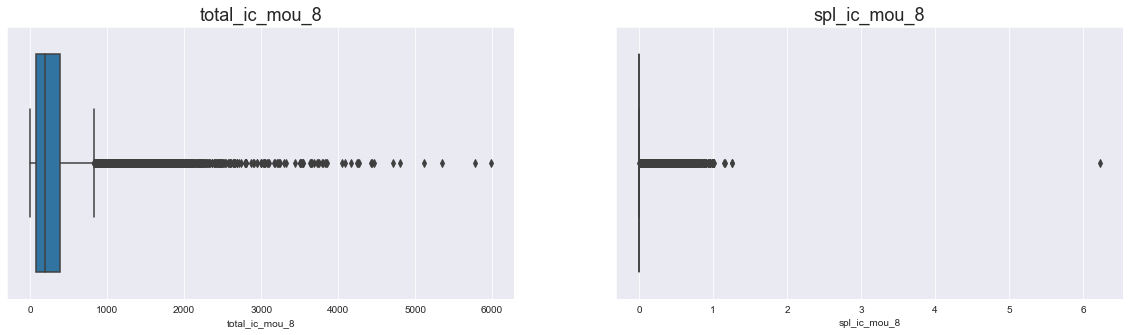

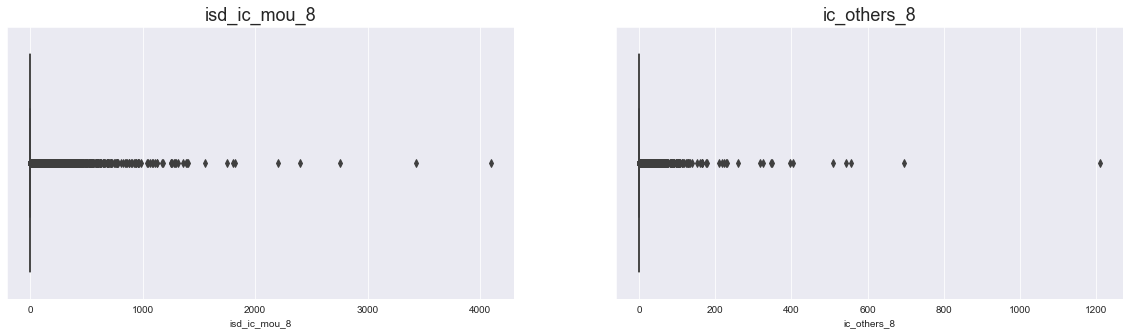

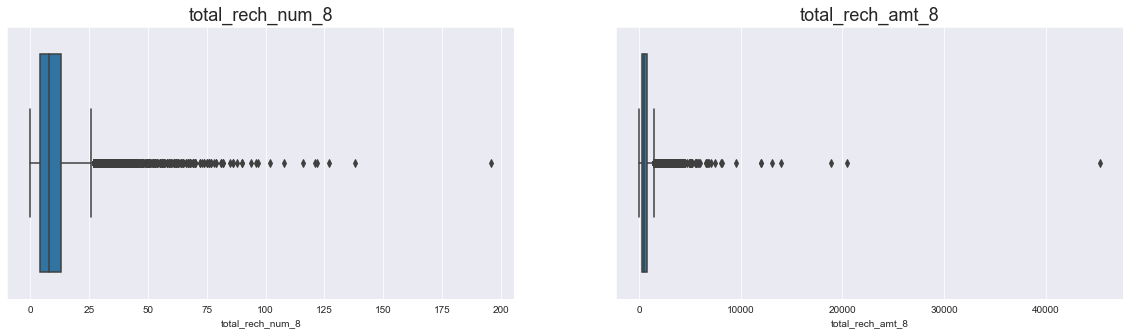

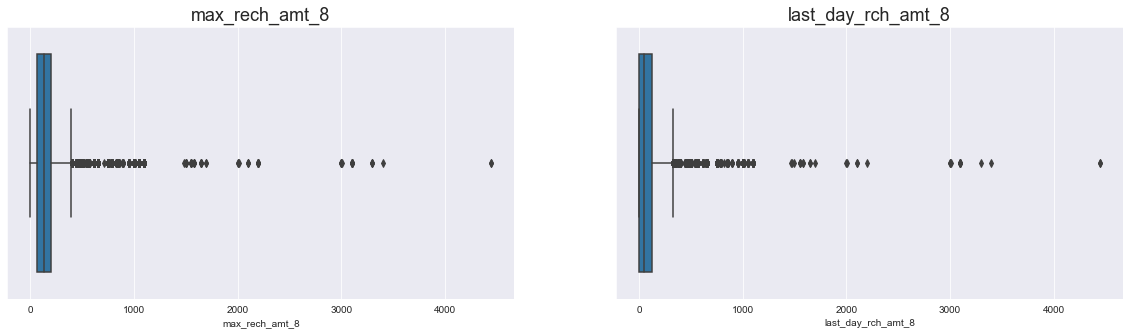

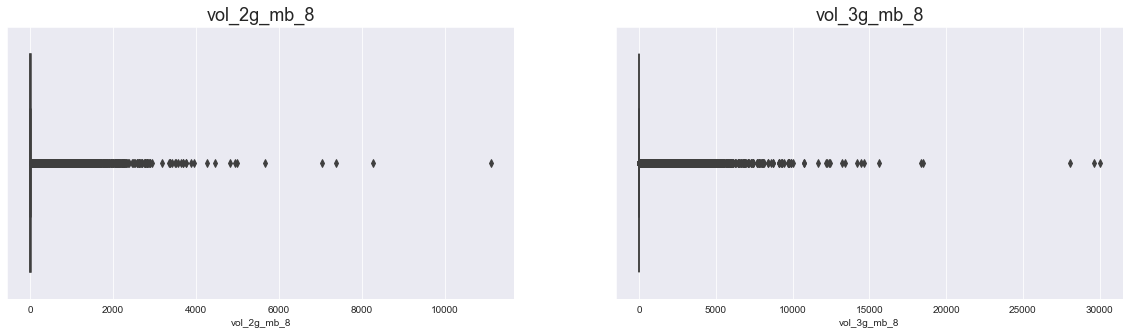

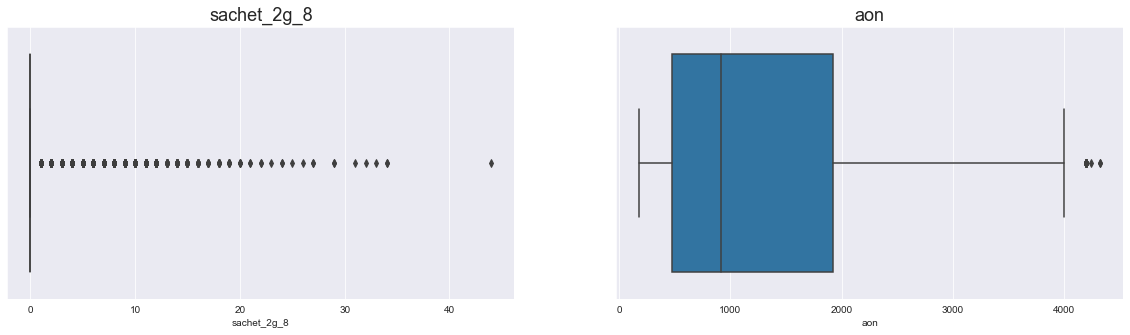

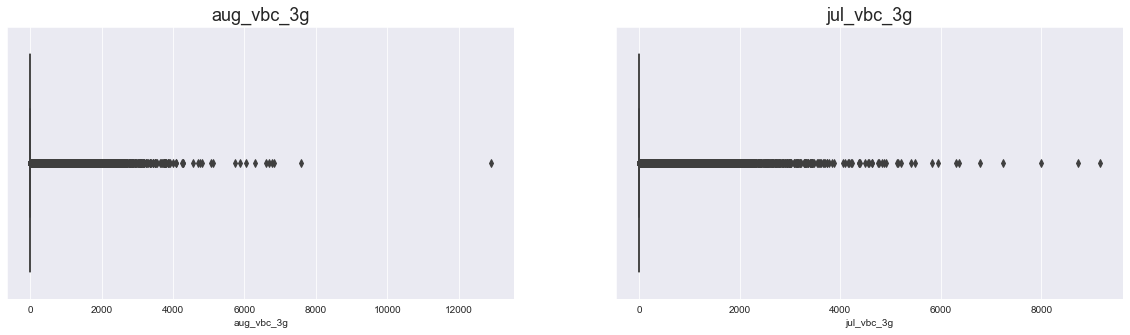

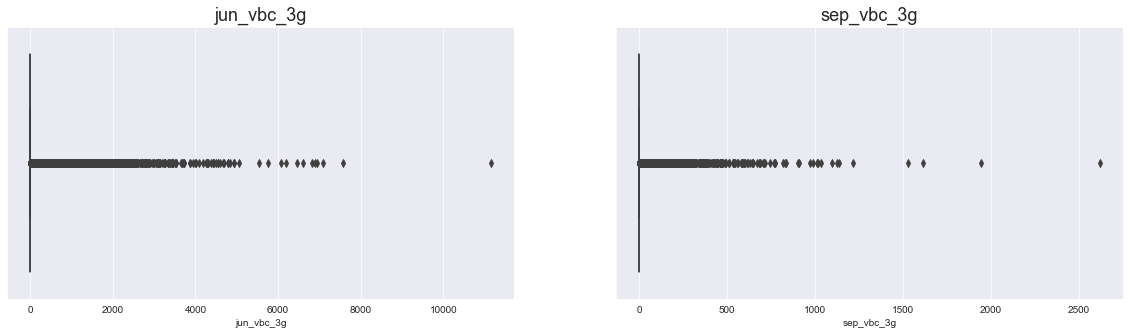

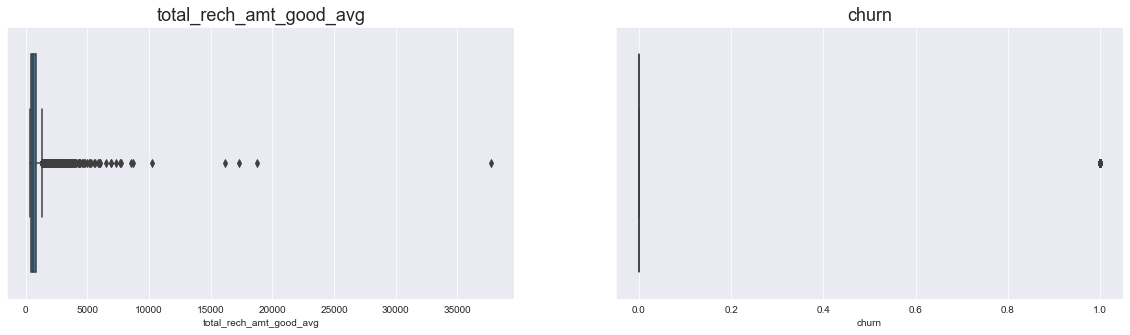

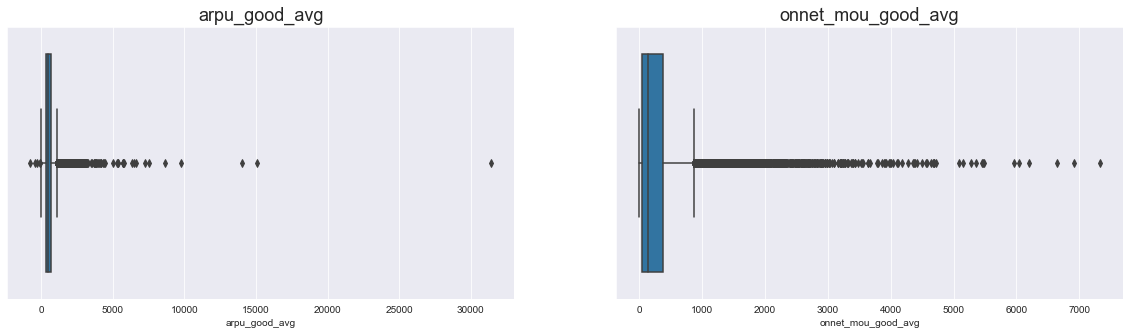

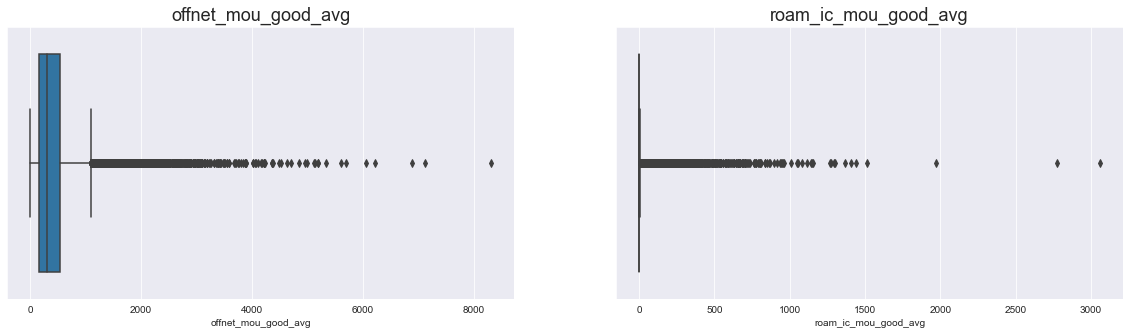

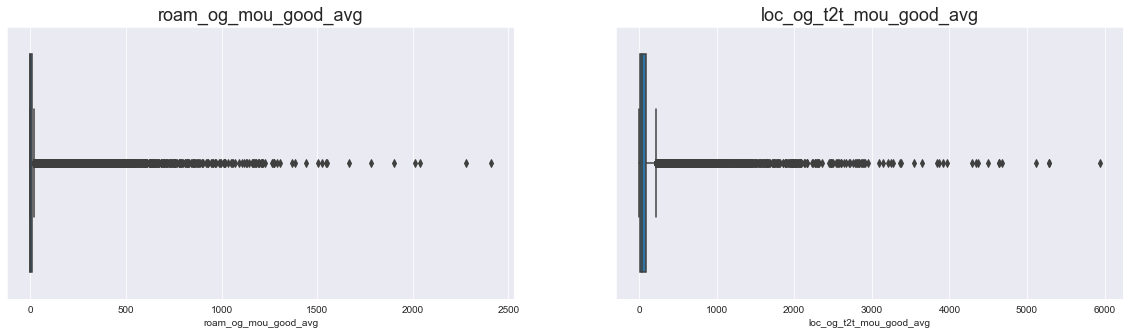

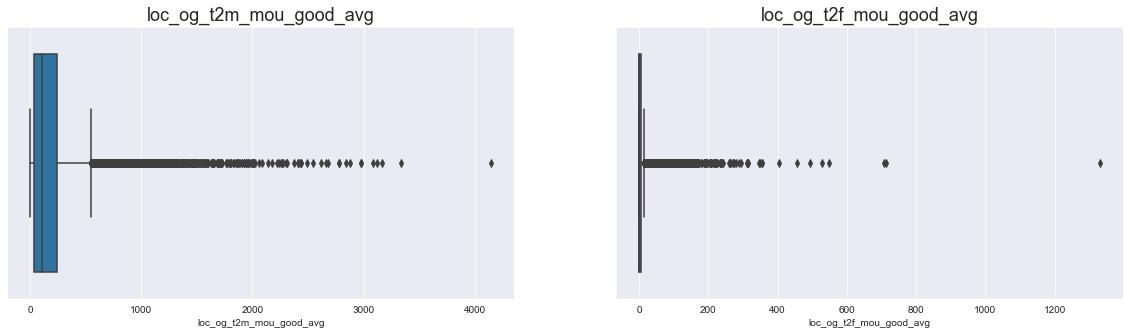

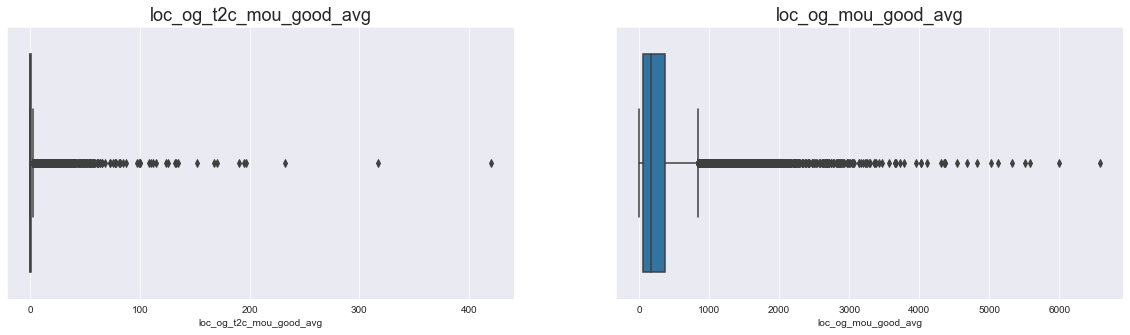

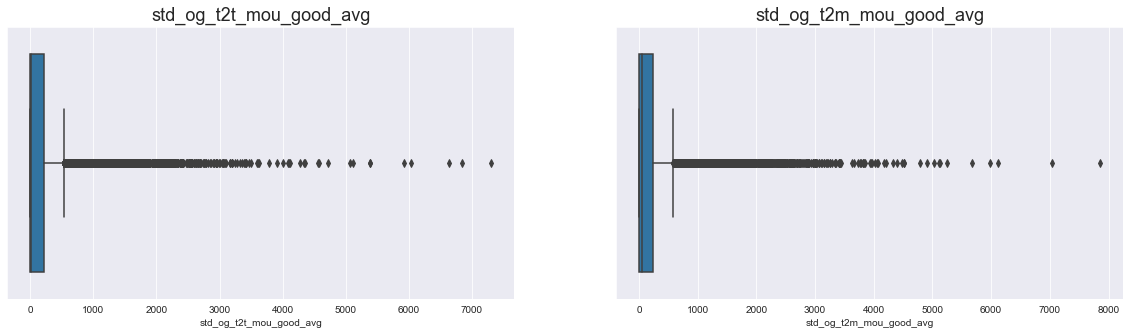

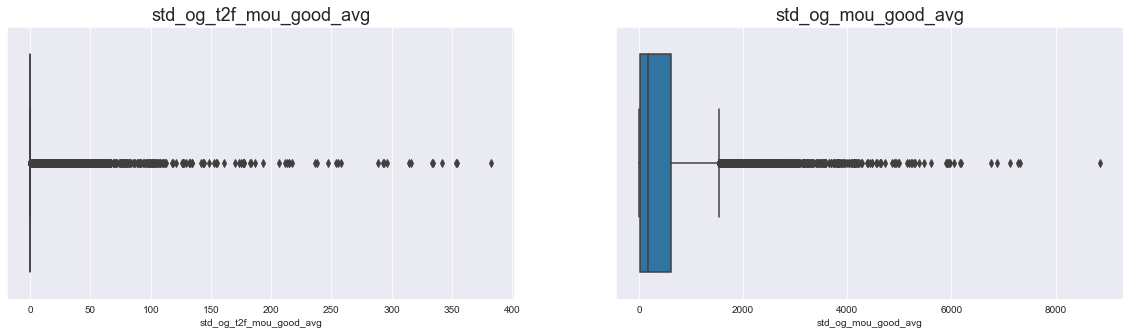

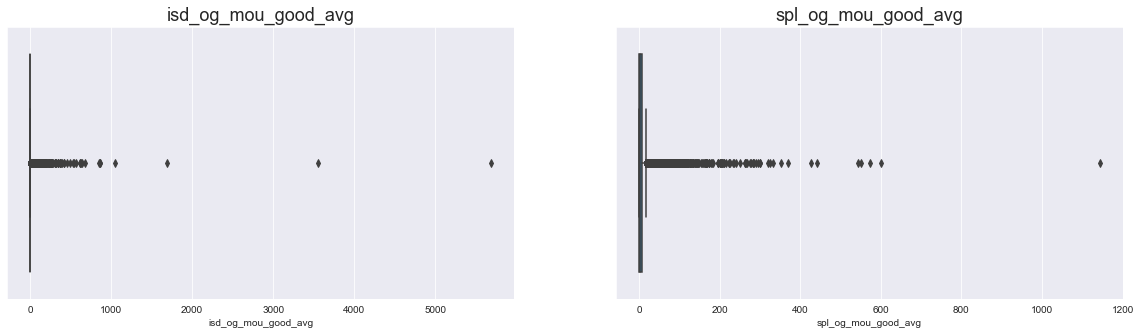

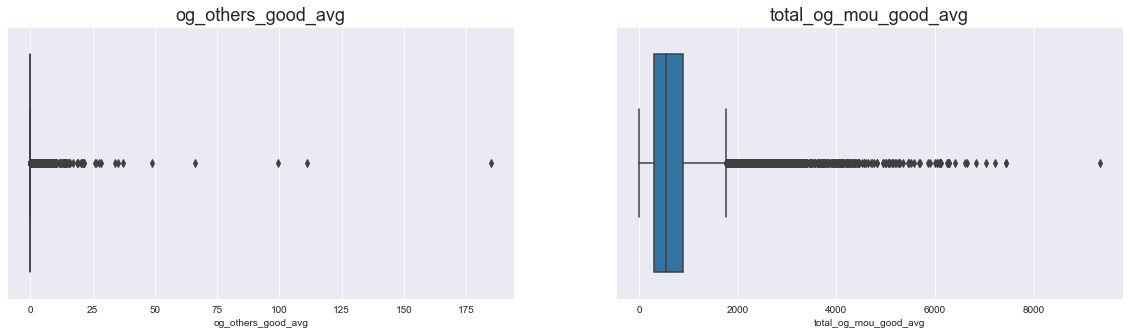

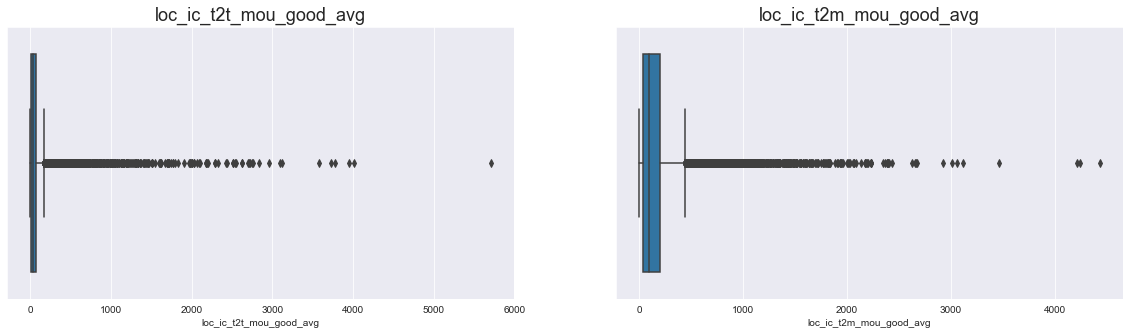

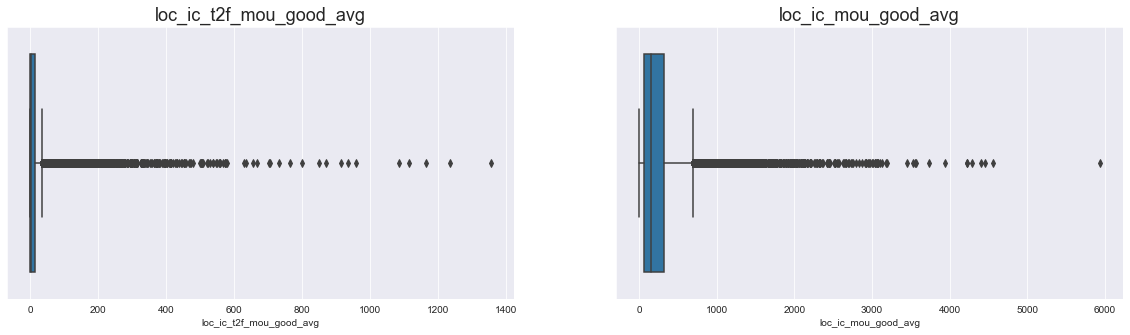

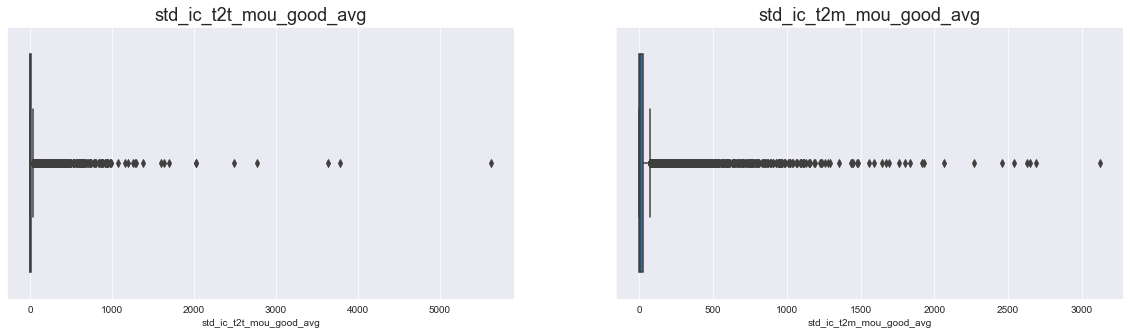

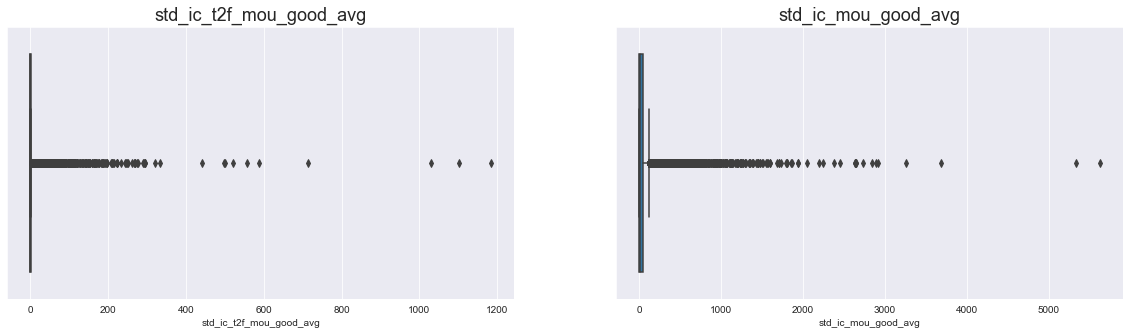

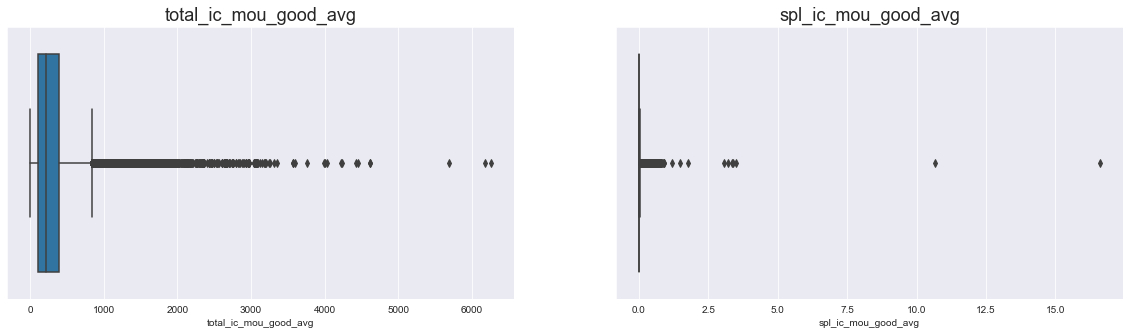

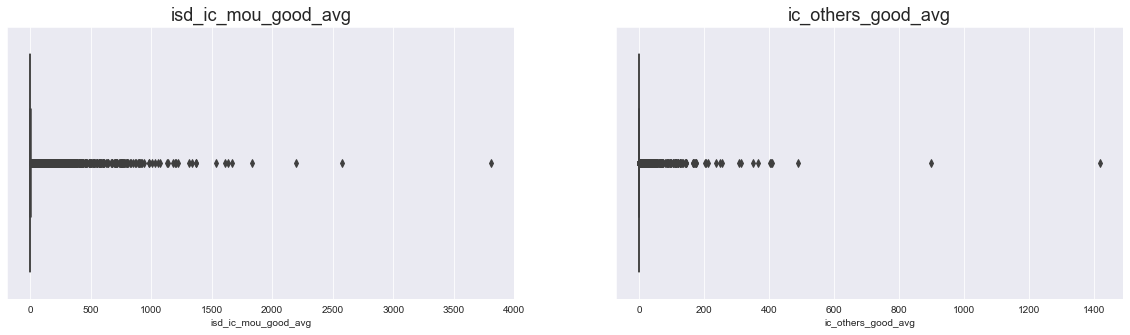

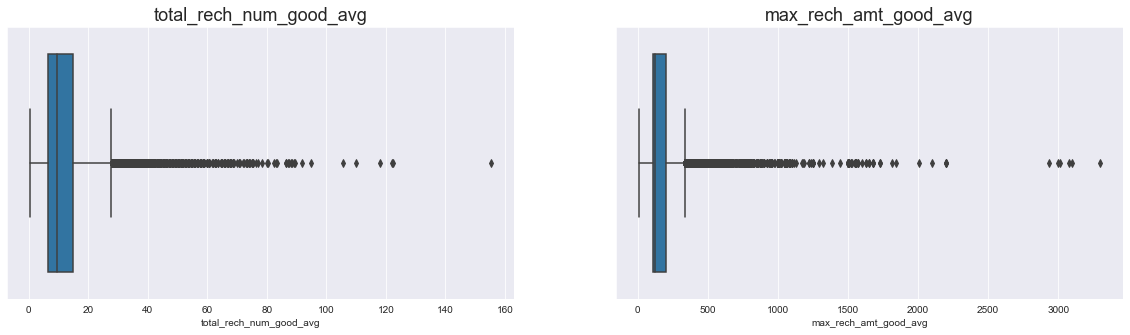

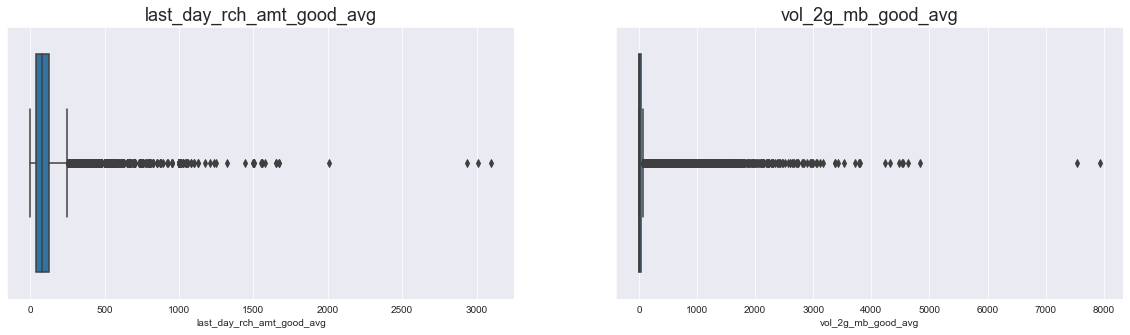

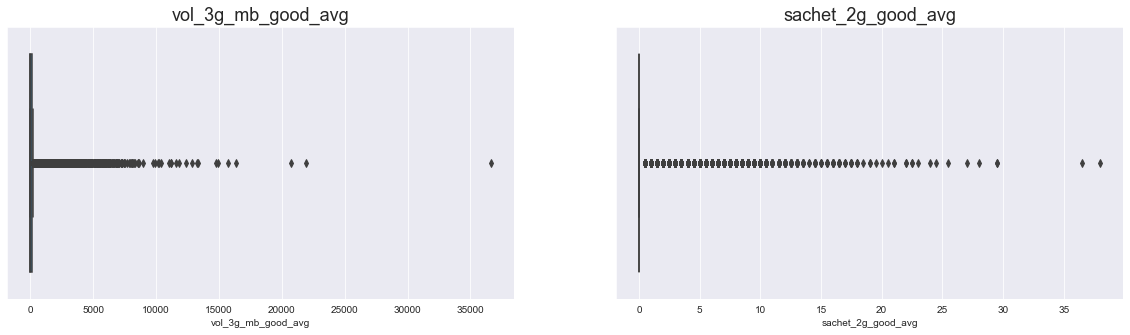

In [37]:
cols = final_df.columns # get all the columns

for i in range(0,len(cols),2): # printing 2 plots in a single row, hence the step of 2
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(cols[i], fontsize=18) # column name being the title
    sns.boxplot(x = cols[i], data = final_df)
    plt.subplot(1,2,2)
    plt.title(cols[i+1], fontsize=18) # column name being the title
    sns.boxplot(x = cols[i+1], data = final_df)
    plt.show()

It seems every column has outliers on the higher side. So instead of removing these rows, capping the outliers to the 95th percentile value.

In [38]:
for col in cols:
    if col!="churn": # we don't want to change the churn column
        val = final_df[col].quantile(0.95) # get the value of each column's 95th percentile value
        final_df[col][final_df[col] >= val] = val # assigning anything above the 95th percentile value to 95th percentile value

Checking outliers again using boxplot

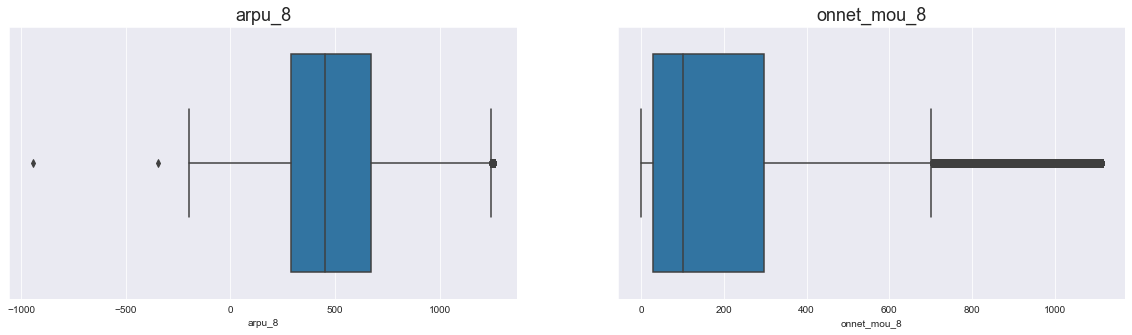

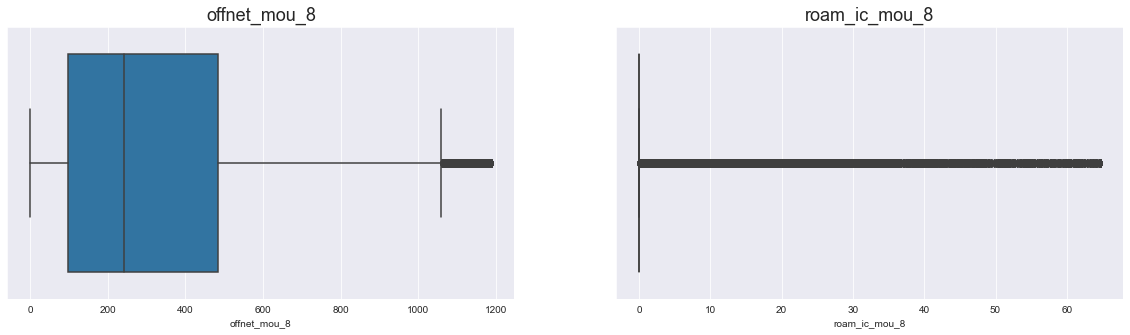

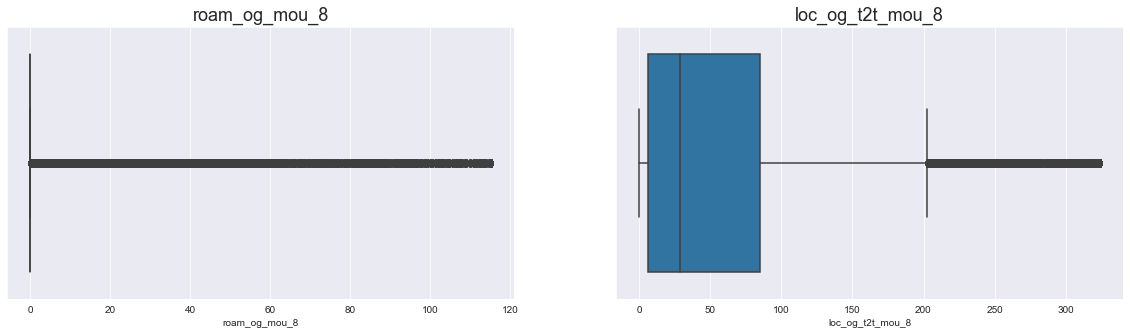

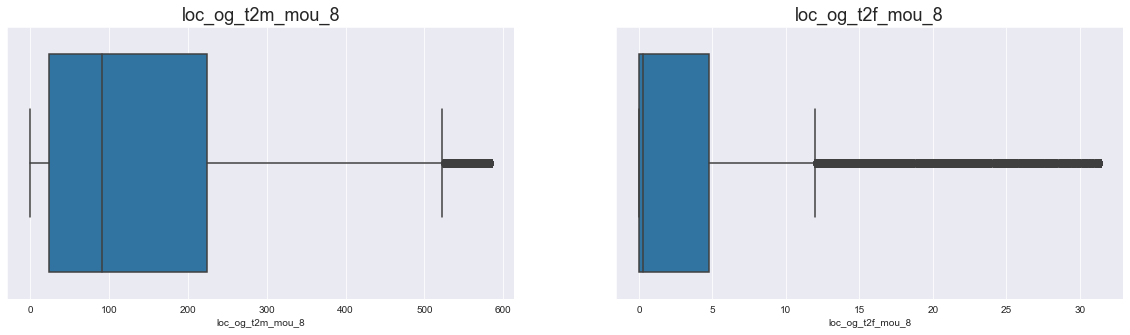

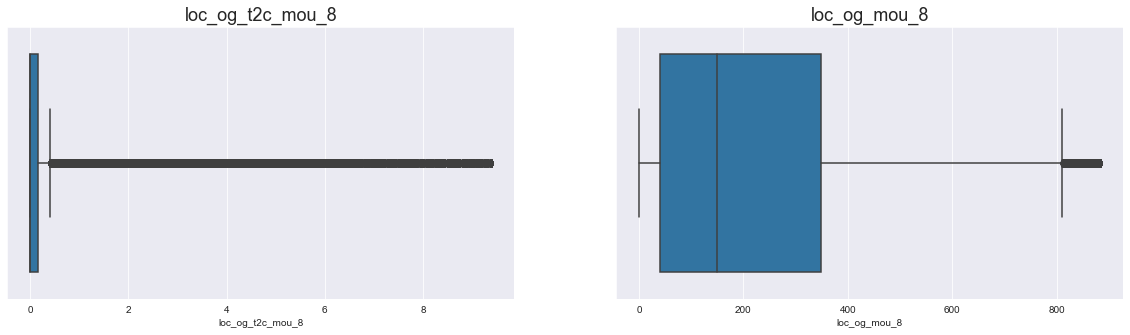

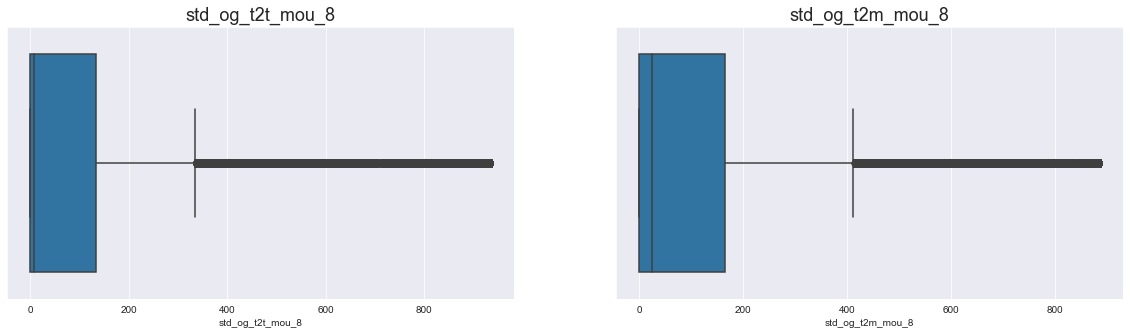

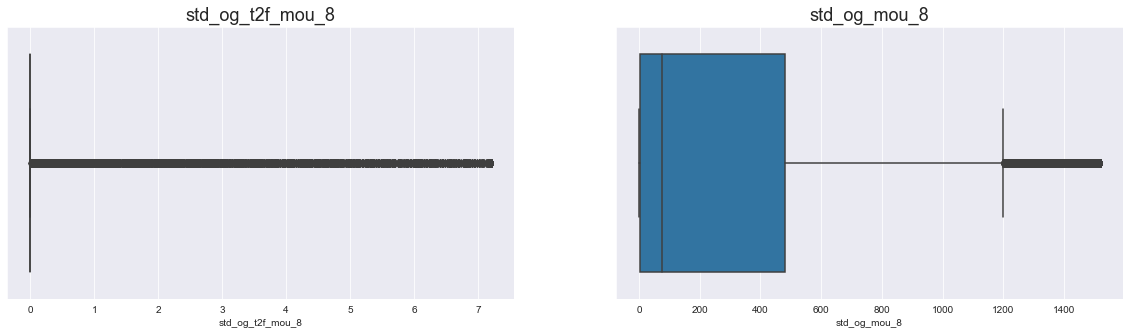

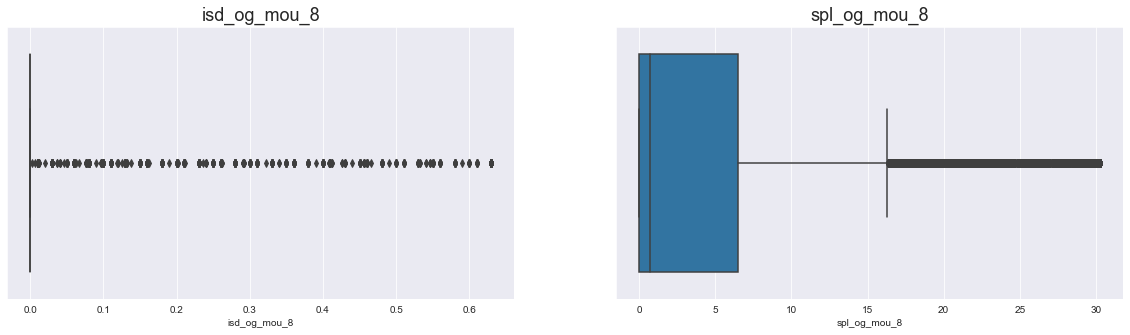

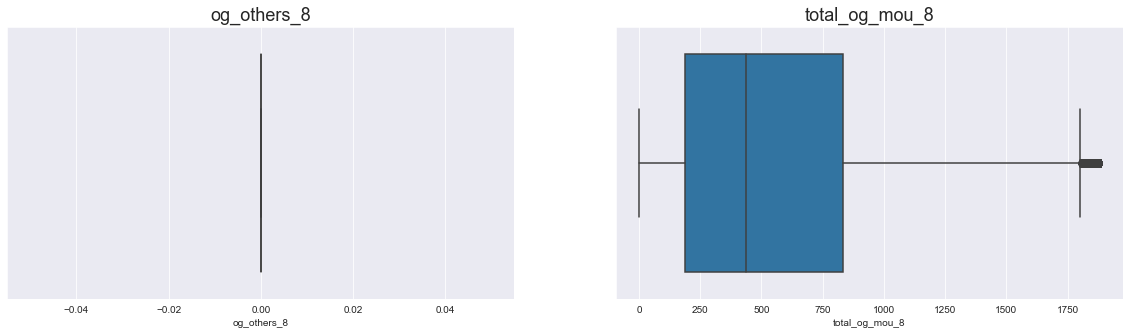

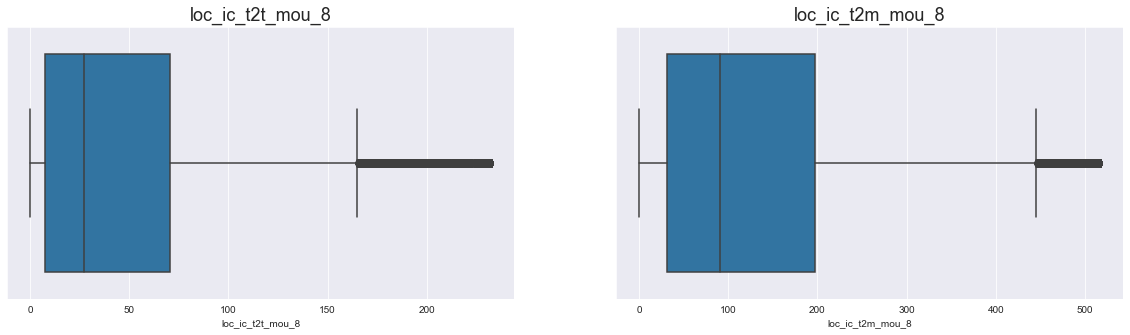

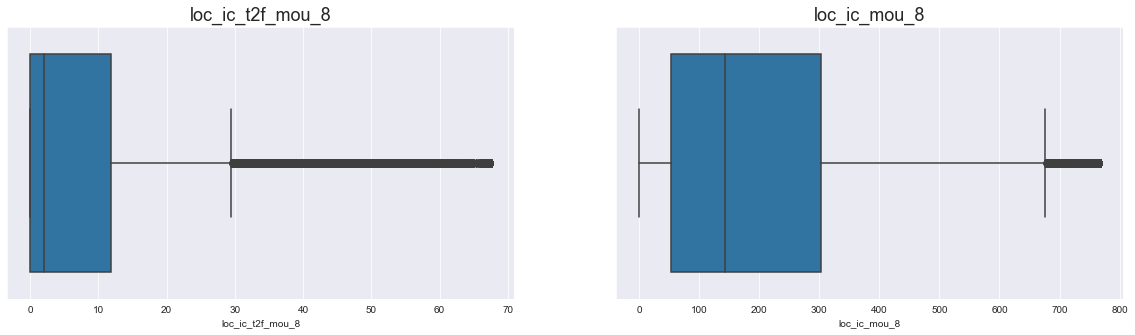

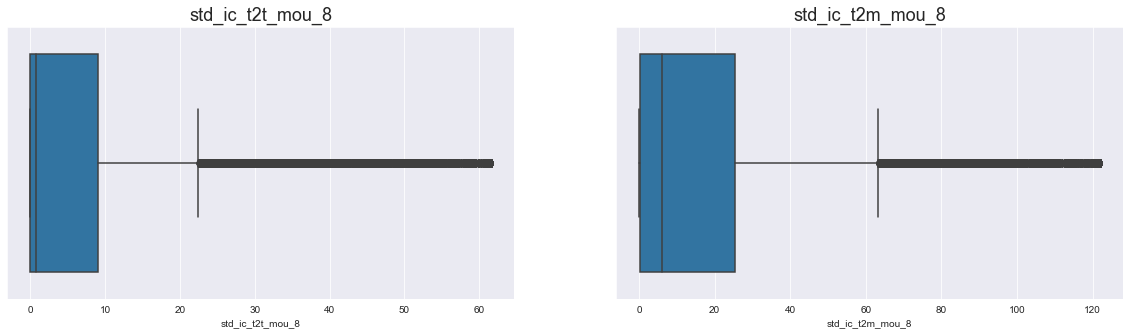

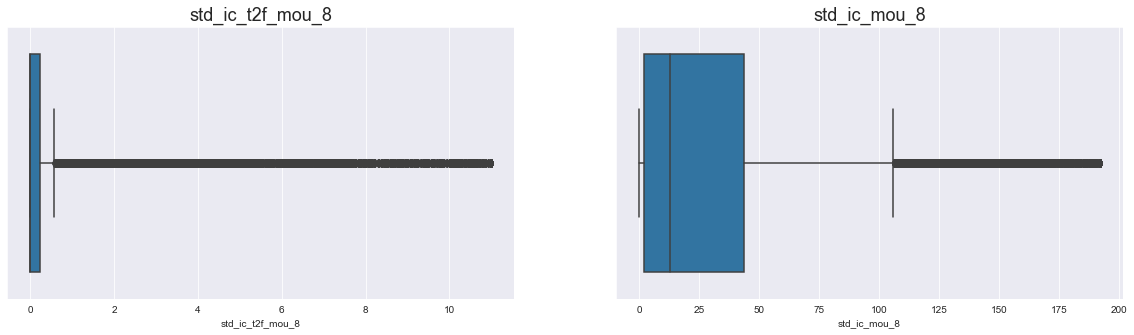

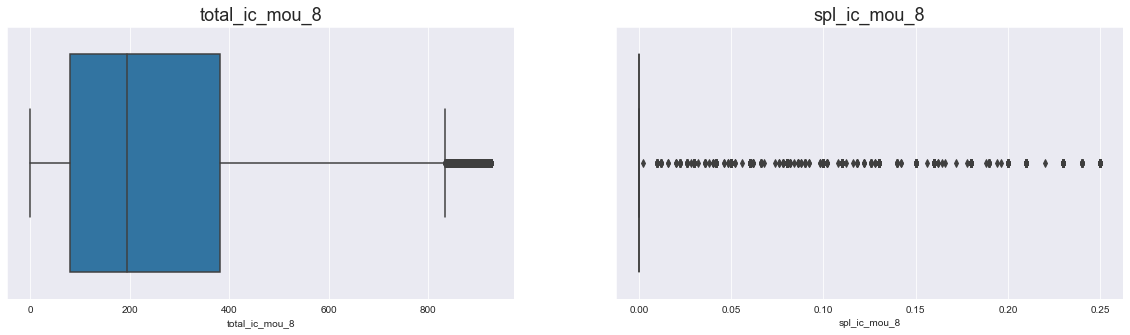

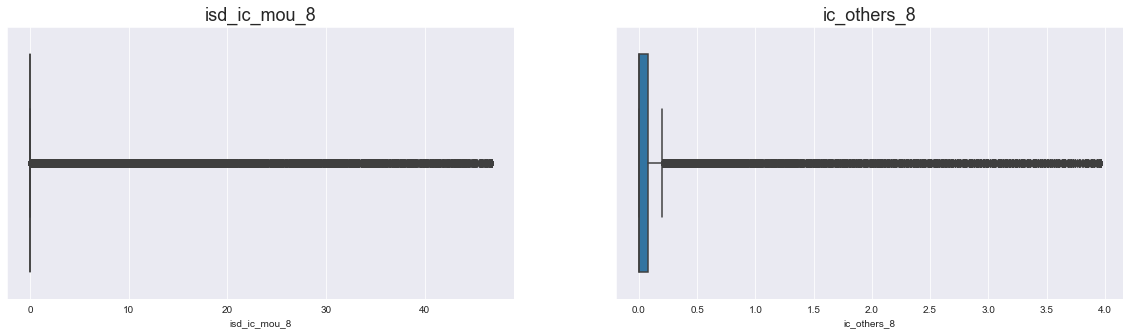

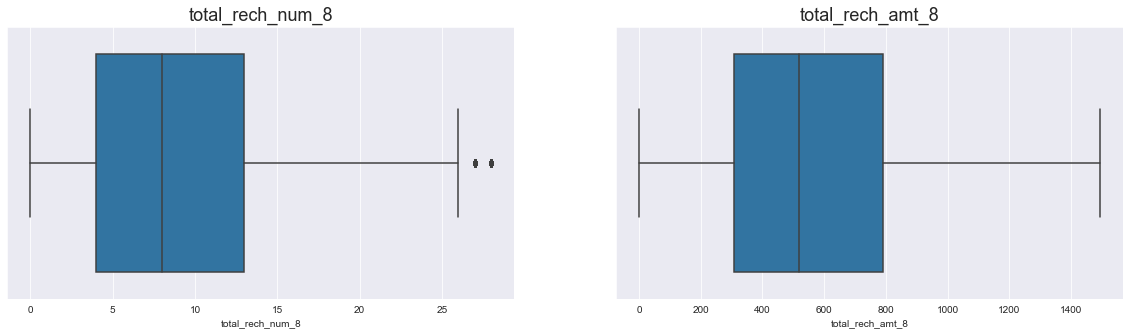

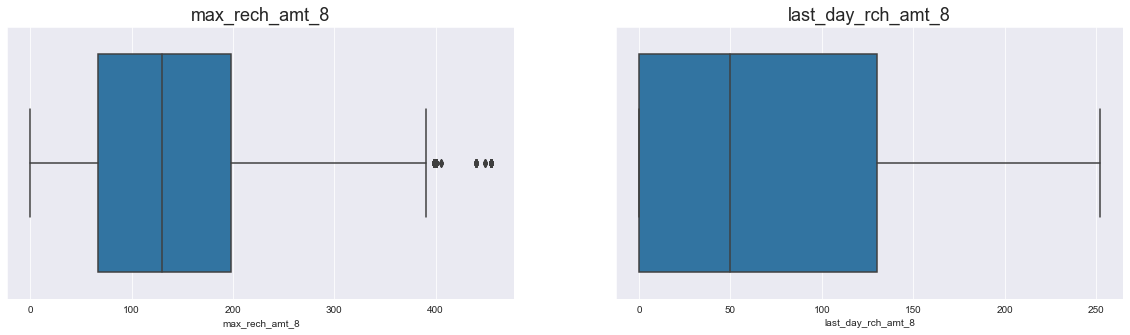

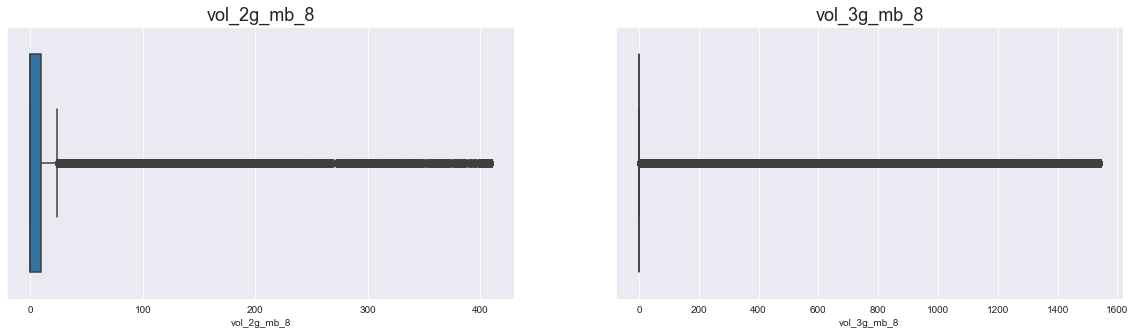

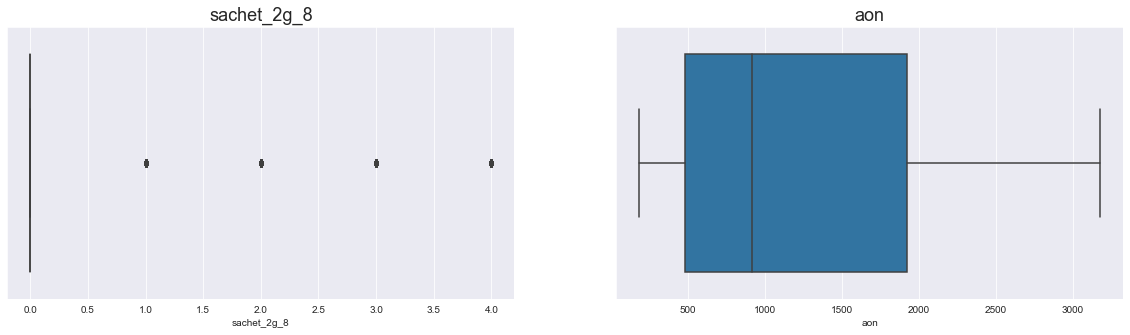

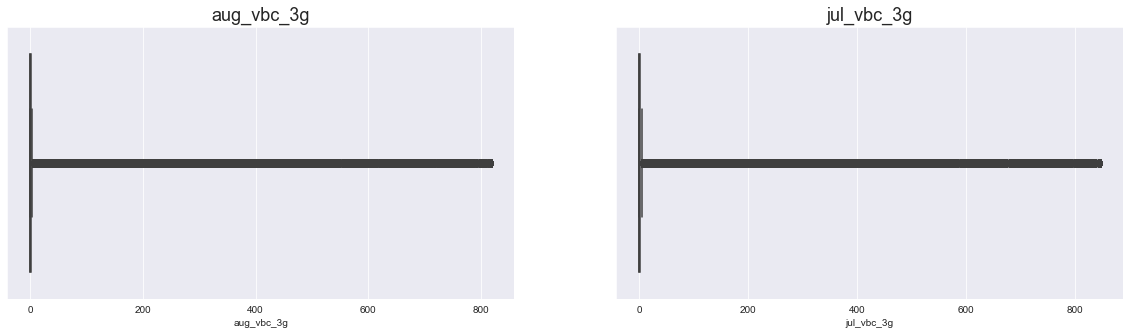

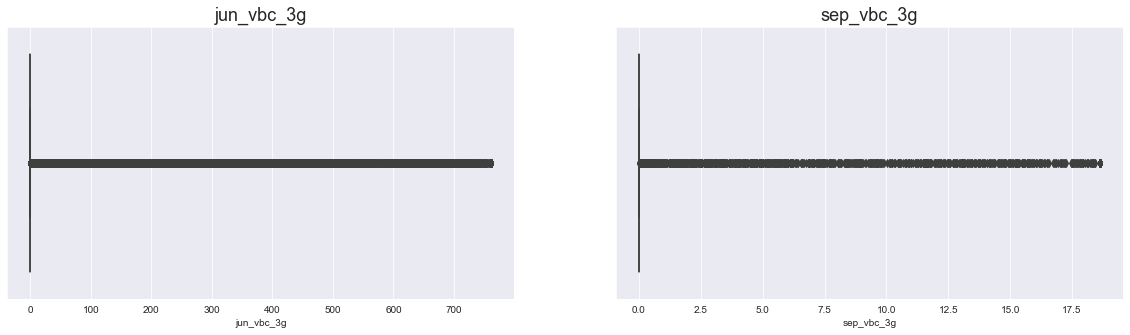

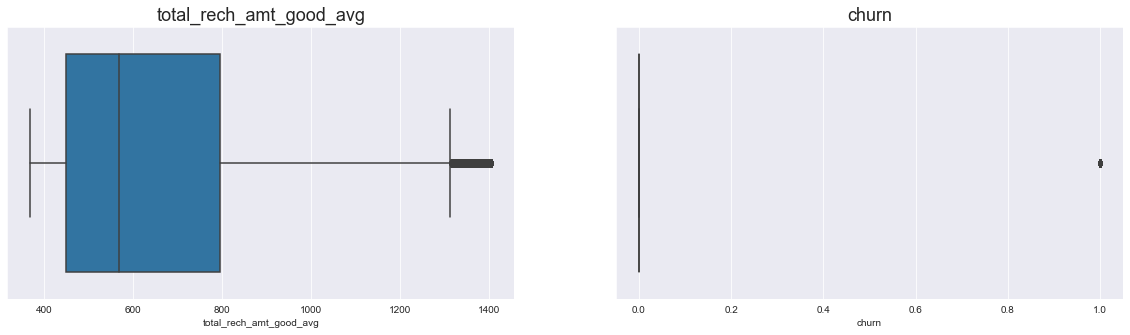

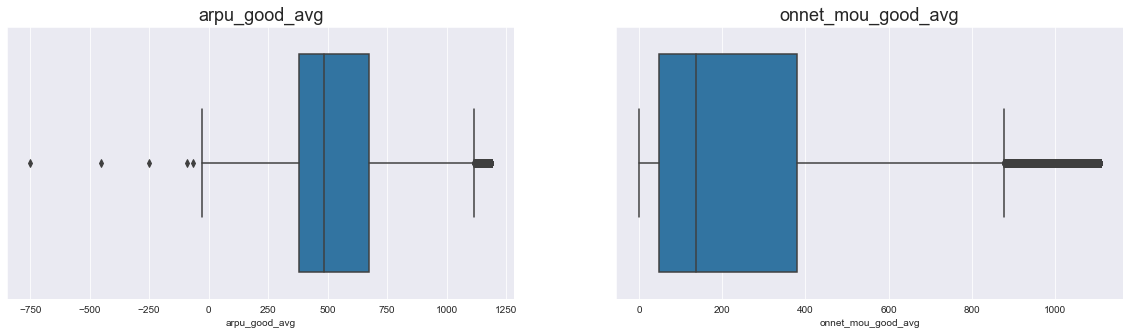

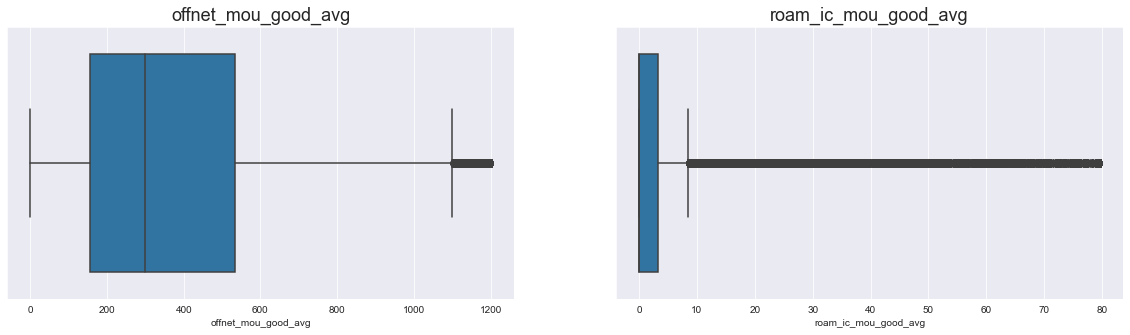

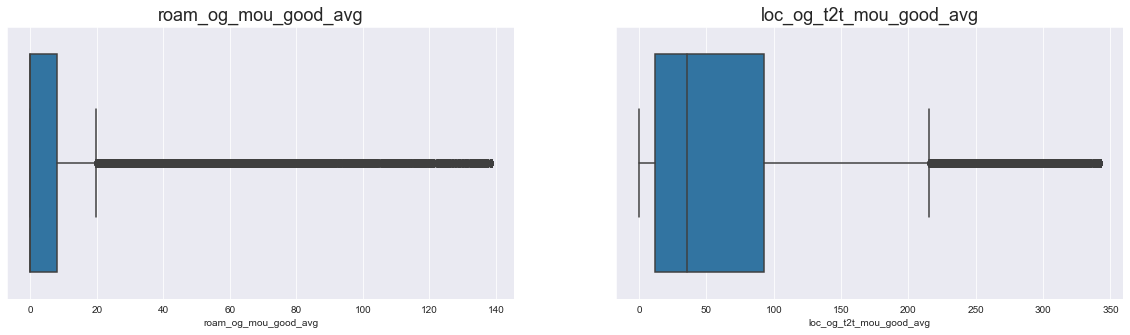

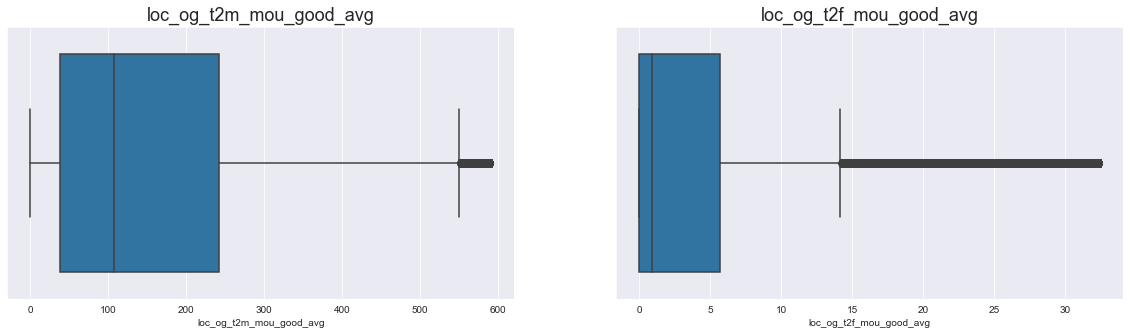

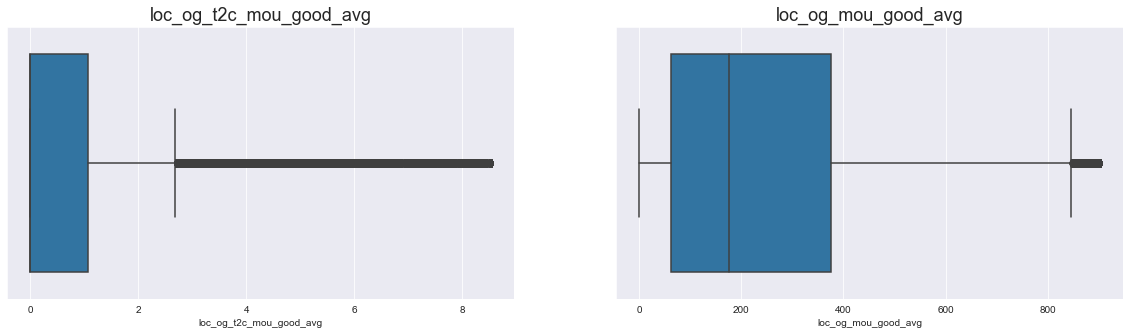

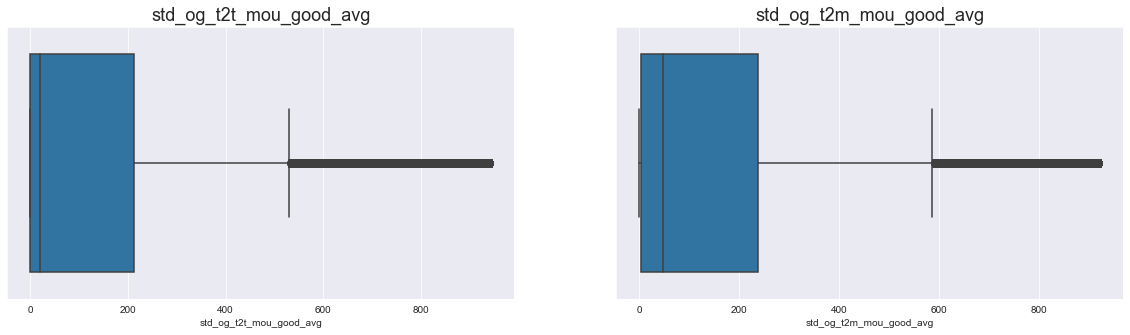

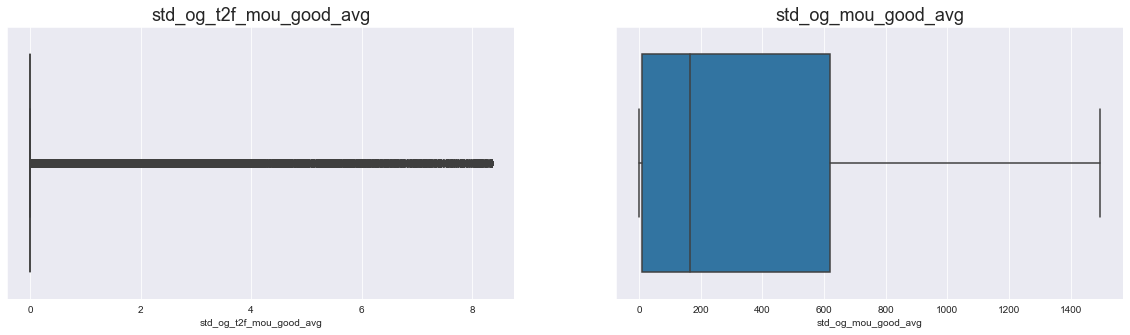

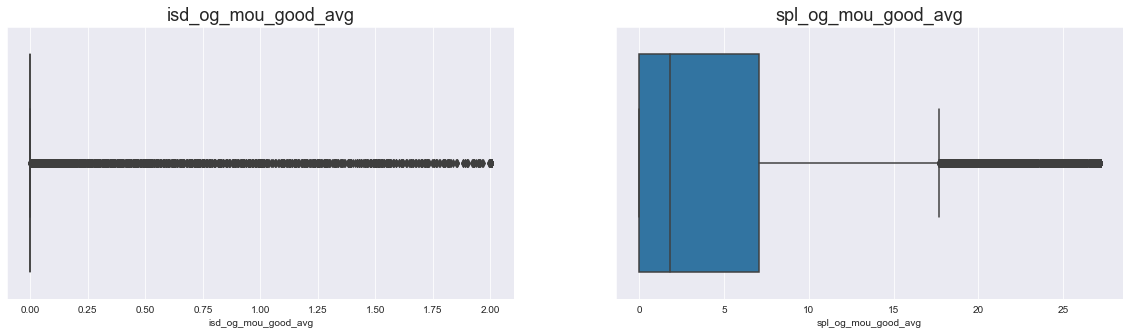

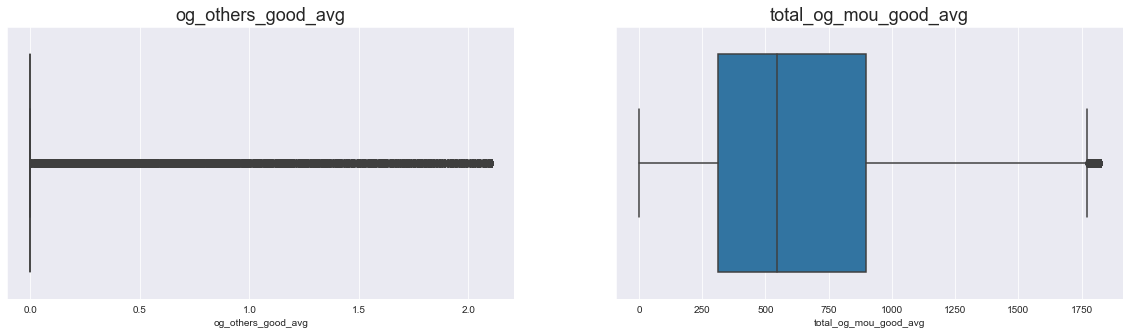

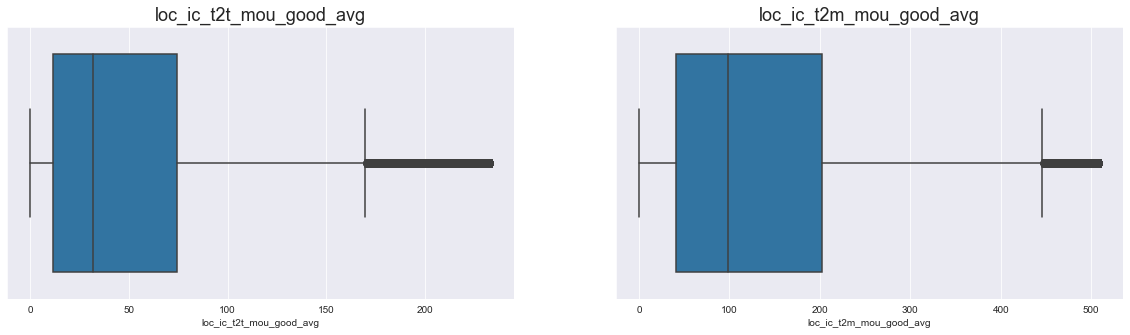

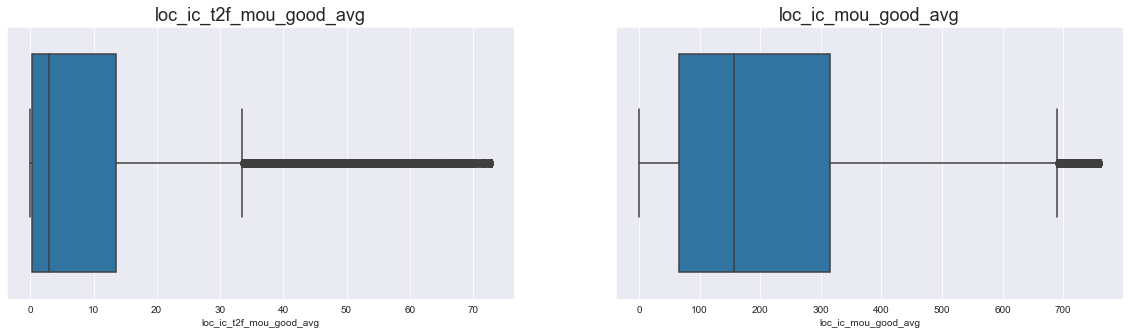

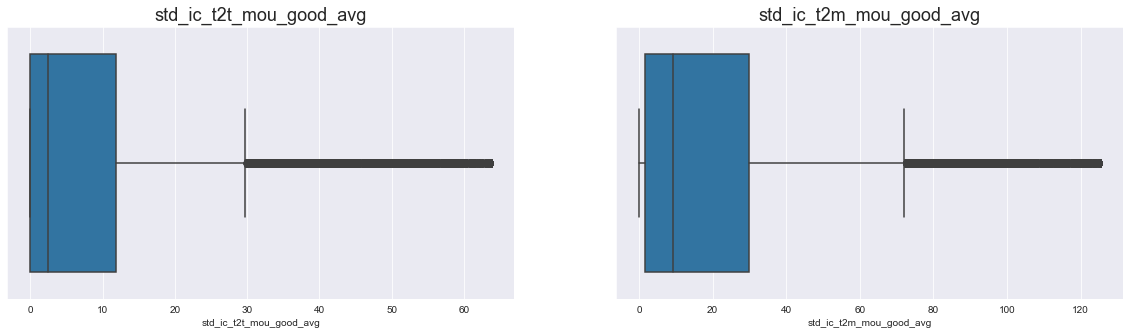

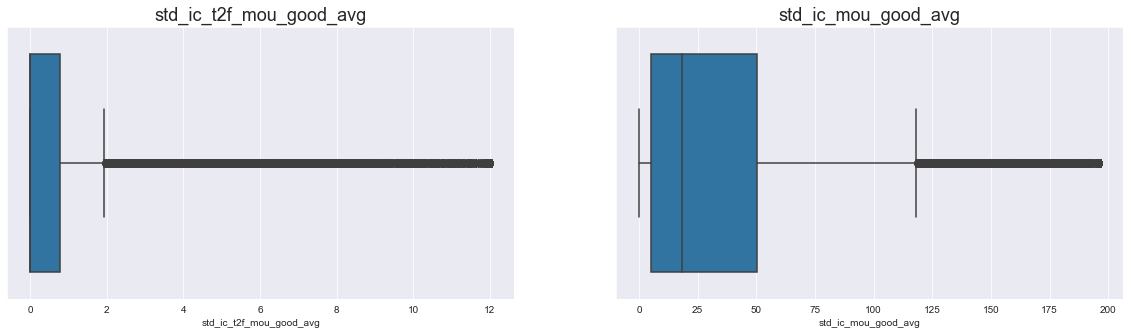

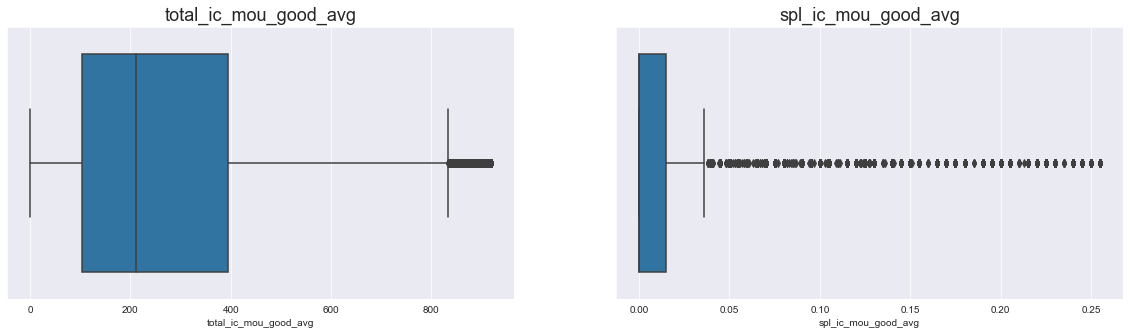

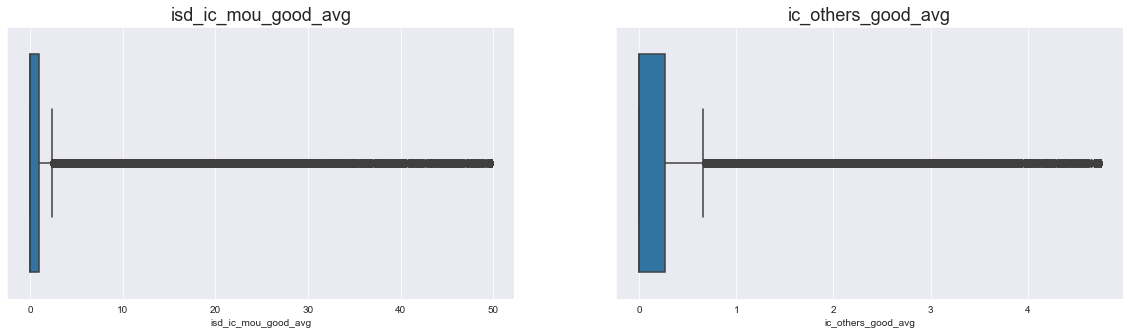

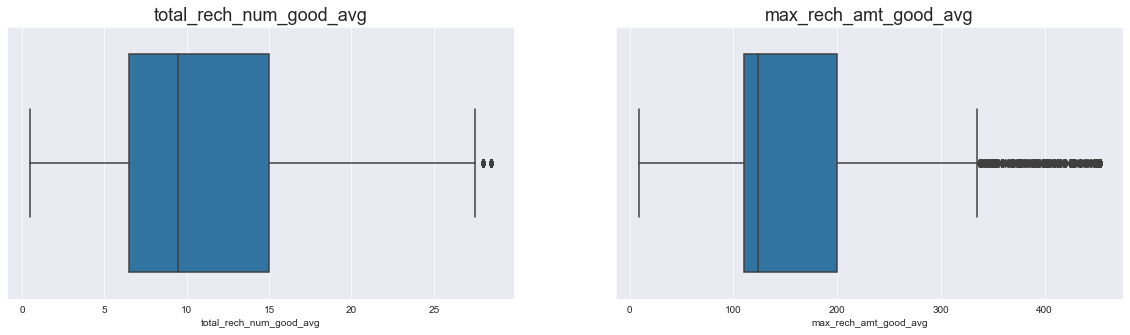

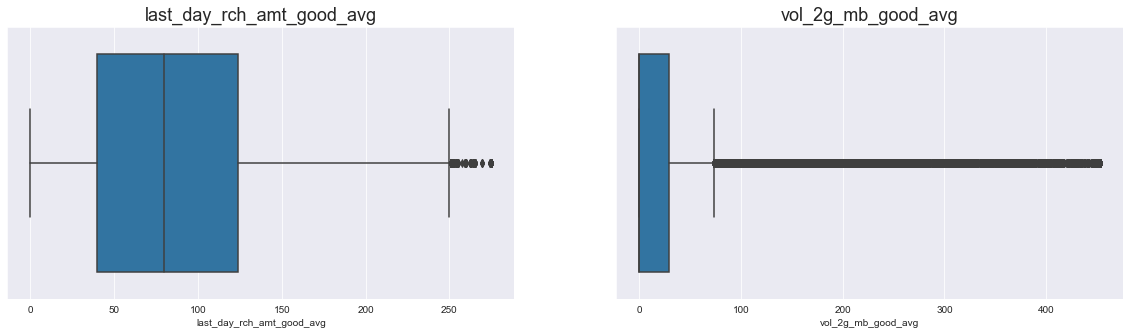

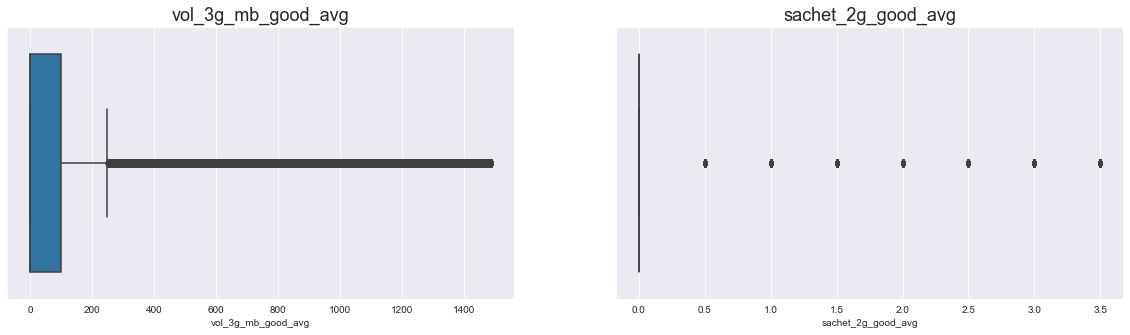

In [39]:
cols = final_df.columns

for i in range(0,len(cols),2):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(cols[i], fontsize=18)
    sns.boxplot(x = cols[i], data = final_df)
    plt.subplot(1,2,2)
    plt.title(cols[i+1], fontsize=18)
    sns.boxplot(x = cols[i+1], data = final_df)
    plt.show()

After capping the boxplots look much better, but there are still some features that look highly skewed. These features are:
1. roam_ic_mou_8
2. roam_og_mou_8
3. std_og_t2f_mou_8
4. isd_og_mou_8
5. og_others_8
6. spl_ic_mou_8
7. isd_ic_mou_8
8. vol_2g_mb_8
9. vol_3g_mb_8
10. sachet_2g_8
11. aug_vbc_3g
12. jul_vbc_3g
13. jun_vbc_3g
14. sep_vbc_3g
15. std_og_t2f_mou_good_avg
16. isd_og_mou_good_avg
17. og_others_good_avg
18. sachet_2g_good_avg

Using the describe function to check the above features in detail (like 90th, 95th, and 99th percentile value)

In [40]:
final_df[["roam_ic_mou_8","roam_og_mou_8","std_og_t2f_mou_8","isd_og_mou_8","og_others_8","spl_ic_mou_8","isd_ic_mou_8","vol_2g_mb_8","vol_3g_mb_8","sachet_2g_8","aug_vbc_3g","jul_vbc_3g","jun_vbc_3g","sep_vbc_3g","std_og_t2f_mou_good_avg","isd_og_mou_good_avg","og_others_good_avg","sachet_2g_good_avg"]].describe(percentiles= (0.25,0.5,0.75,0.9,0.95,0.99))

,roam_ic_mou_8,roam_og_mou_8,std_og_t2f_mou_8,isd_og_mou_8,og_others_8,spl_ic_mou_8,isd_ic_mou_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,std_og_t2f_mou_good_avg,isd_og_mou_good_avg,og_others_good_avg,sachet_2g_good_avg
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,5.930510,10.799194,0.599412,0.037608,0.0,0.017791,4.391621,41.853878,194.490784,0.457699,96.509621,99.526191,86.220515,1.165709,0.810154,0.140196,0.259616,0.401703
std,16.148617,29.080818,1.773818,0.143983,0.0,0.061364,11.820604,104.535891,431.831004,1.076622,222.971066,230.743641,205.853202,4.315661,2.104439,0.468813,0.579219,0.916854
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9.620000,0.000000,0.000000,1.600000,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,20.360000,38.660000,1.800000,0.000000,0.0,0.000000,15.880000,153.540000,914.600000,2.000000,438.970000,454.830000,394.500000,0.000000,2.975000,0.205000,1.150000,1.500000
95%,64.665000,115.355000,7.210000,0.630000,0.0,0.250000,46.782500,409.852500,1542.287500,4.000000,818.520000,845.277500,761.635000,18.632500,8.347500,2.005000,2.105000,3.500000
99%,64.670000,115.380000,7.210000,0.630000,0.0,0.250000,46.785000,409.905000,1542.315000,4.000000,818.750000,845.315000,761.740000,18.635000,8.350000,2.005000,2.105000,3.500000


From above, the following columns are highly skewed (at least 75 percentile values are same as minimum) and there is not much difference in their other values:
- roam_ic_mou_8
- roam_og_mou_8
- std_og_t2f_mou_8
- isd_og_mou_8
- og_others_8
- spl_ic_mou_8
- isd_ic_mou_8
- vol_3g_mb_8
- sachet_2g_8
- aug_vbc_3g
- jul_vbc_3g
- jun_vbc_3g
- sep_vbc_3g
- std_og_t2f_mou_good_avg
- isd_og_mou_good_avg
- og_others_good_avg
- sachet_2g_good_avg


So dropping these highly skewed features

In [41]:
final_df.drop(["roam_ic_mou_8","roam_og_mou_8","std_og_t2f_mou_8","isd_og_mou_8","og_others_8","spl_ic_mou_8","isd_ic_mou_8","vol_3g_mb_8","sachet_2g_8","aug_vbc_3g","jul_vbc_3g","jun_vbc_3g","sep_vbc_3g","std_og_t2f_mou_good_avg","isd_og_mou_good_avg","og_others_good_avg","sachet_2g_good_avg"], axis = 1, inplace = True)
final_df.shape

(30011, 63)

Below features have outliers on the lower side as well. Looking at those in detail
- arpu_8
- arpu_good_avg

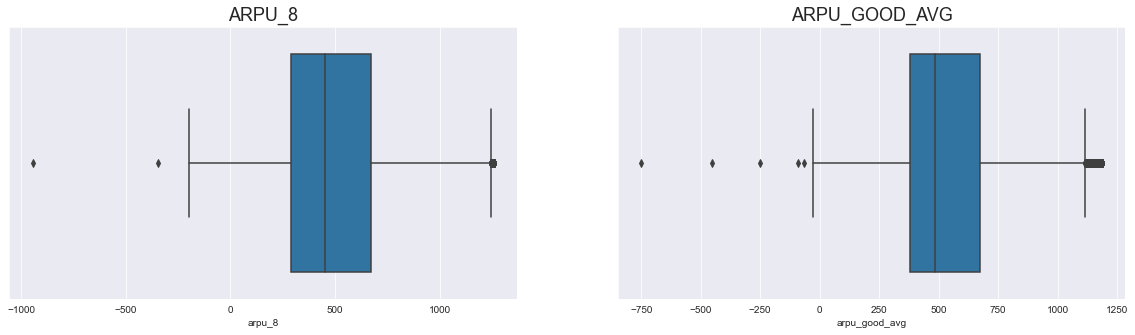

,arpu_8,arpu_good_avg
count,30011.000000,30011.000000
mean,506.491979,562.892027
std,318.245594,243.477280
min,-945.808000,-749.783000
0.1%,-5.000000,72.150000
1%,0.000000,253.246200
5%,22.206000,313.706750
10%,134.170000,333.576000
20%,252.300000,364.696000
25%,289.609500,381.272250


In [42]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("ARPU_8", fontsize=18)
sns.boxplot(x = "arpu_8", data = final_df)

plt.subplot(1,2,2)
plt.title("ARPU_GOOD_AVG", fontsize=18)
sns.boxplot(x = "arpu_good_avg", data = final_df)

plt.show()

final_df[["arpu_8","arpu_good_avg"]].describe(percentiles= (0.001, 0.01, 0.05, 0.1, 0.2, 0.25,0.5,0.75))

Looking at the boxplots and the description of the 2 columns, it will be best to cap the lower value to 0.1% for both the columns

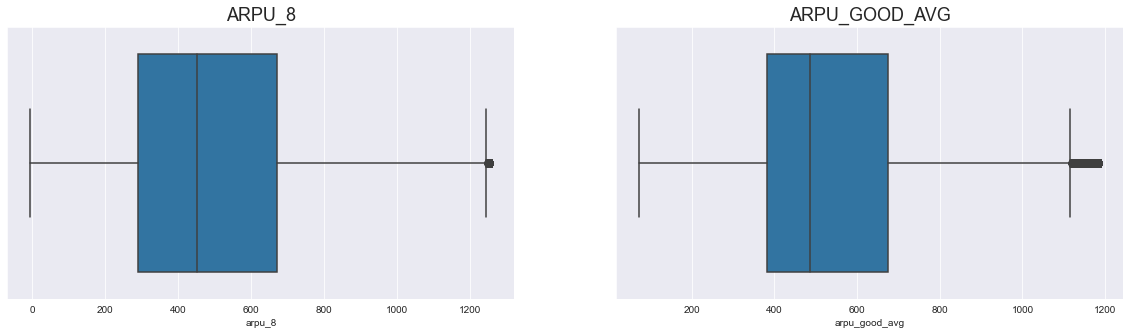

,arpu_8,arpu_good_avg
count,30011.000000,30011.000000
mean,506.547152,562.988154
std,318.102234,243.204363
min,-5.000000,72.150000
0.1%,-5.000000,72.275235
1%,0.000000,253.246200
5%,22.206000,313.706750
10%,134.170000,333.576000
20%,252.300000,364.696000
25%,289.609500,381.272250


In [43]:
arpu_8_val = final_df["arpu_8"].quantile(0.001)
final_df["arpu_8"][final_df["arpu_8"] <= arpu_8_val] = arpu_8_val


arpu_good_avg_val = final_df["arpu_good_avg"].quantile(0.001)
final_df["arpu_good_avg"][final_df["arpu_good_avg"] <= arpu_good_avg_val] = arpu_good_avg_val



plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("ARPU_8", fontsize=18)
sns.boxplot(x = "arpu_8", data = final_df)

plt.subplot(1,2,2)
plt.title("ARPU_GOOD_AVG", fontsize=18)
sns.boxplot(x = "arpu_good_avg", data = final_df)

plt.show()

final_df[["arpu_8","arpu_good_avg"]].describe(percentiles= (0.001, 0.01, 0.05, 0.1, 0.2, 0.25,0.5,0.75))

### Bivariate Analysis

Looking at each feature for customers that churned and those that did not.

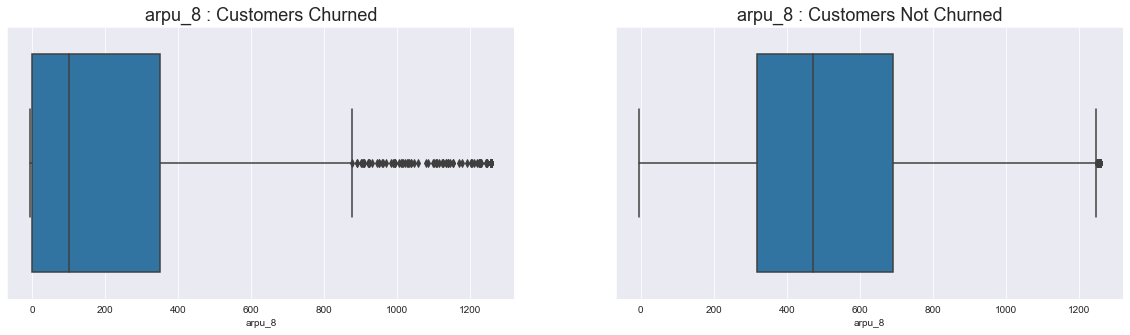

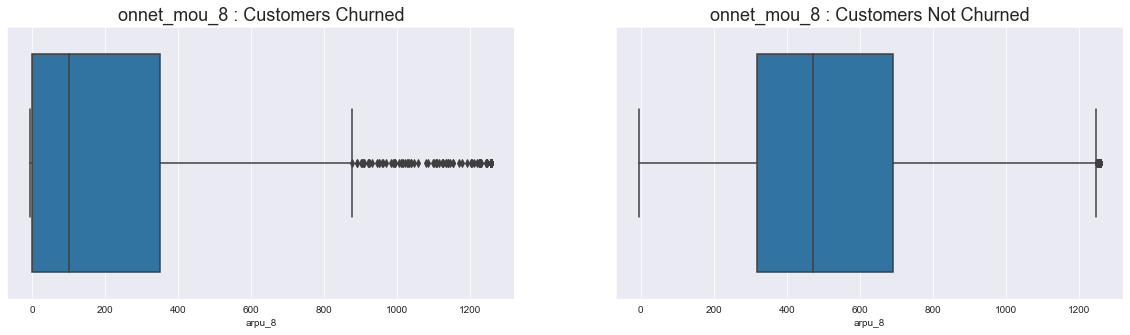

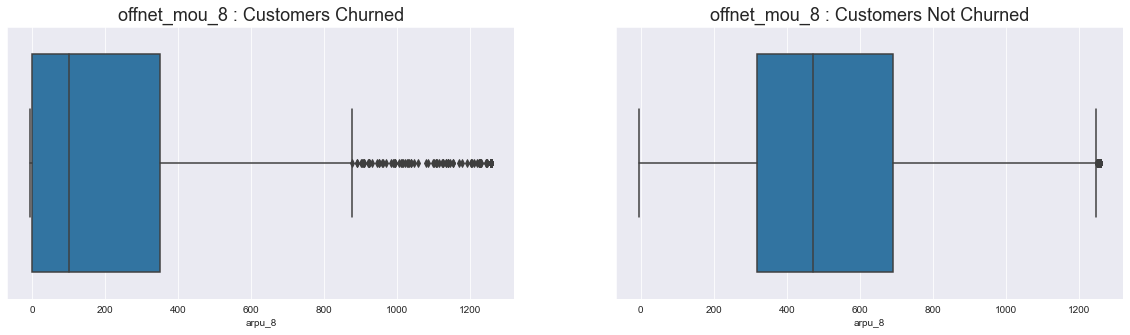

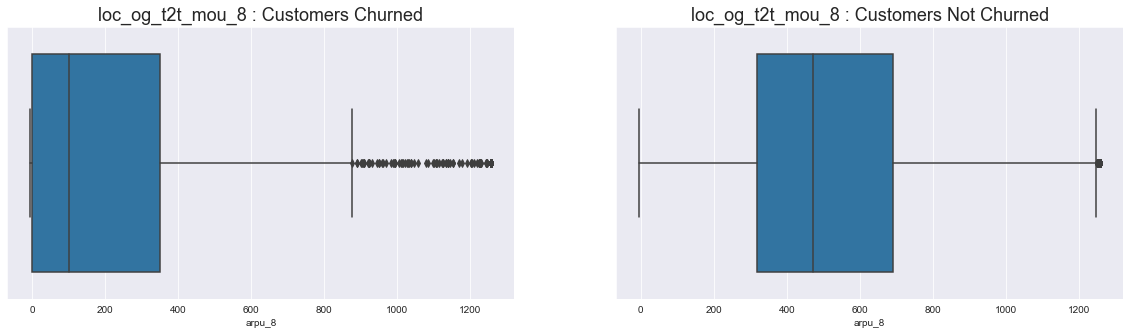

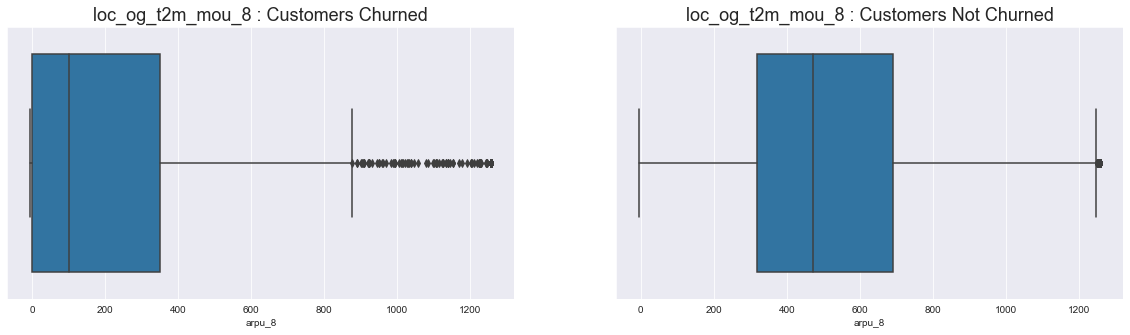

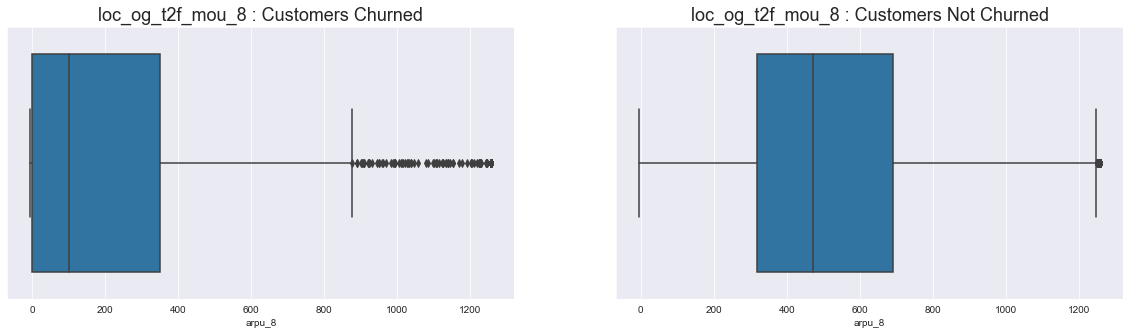

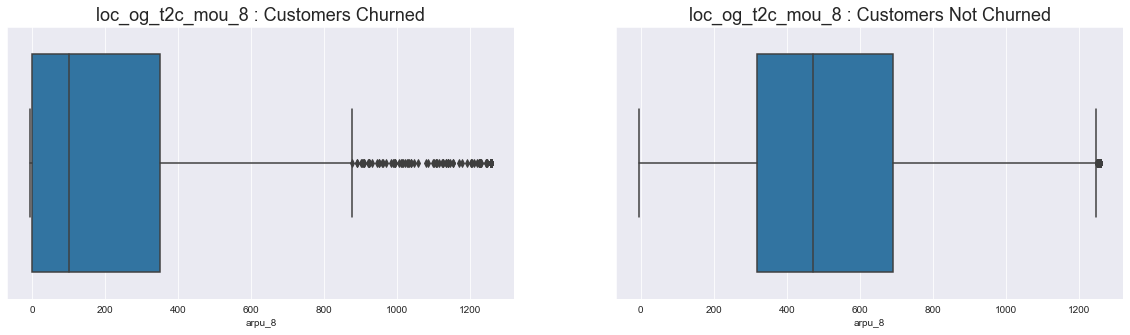

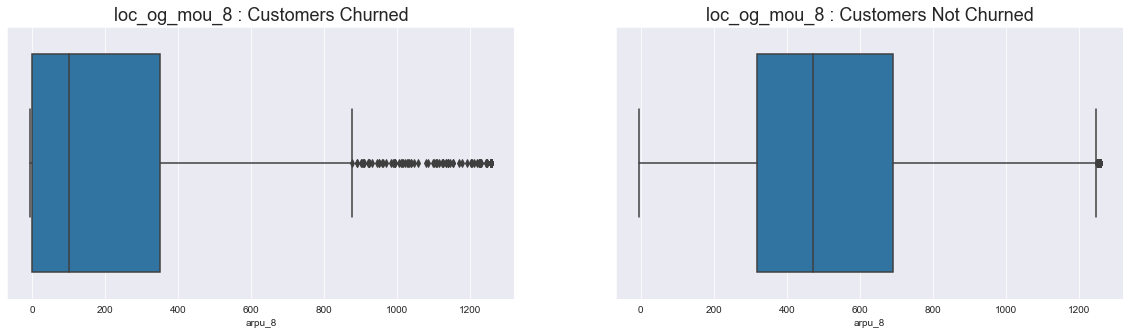

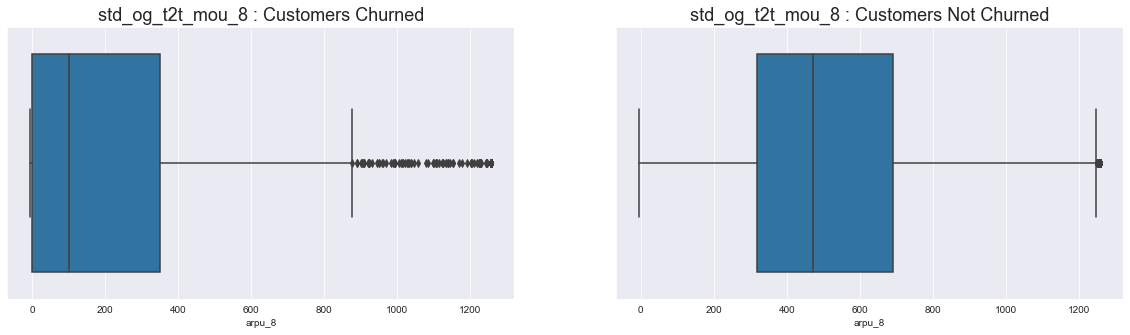

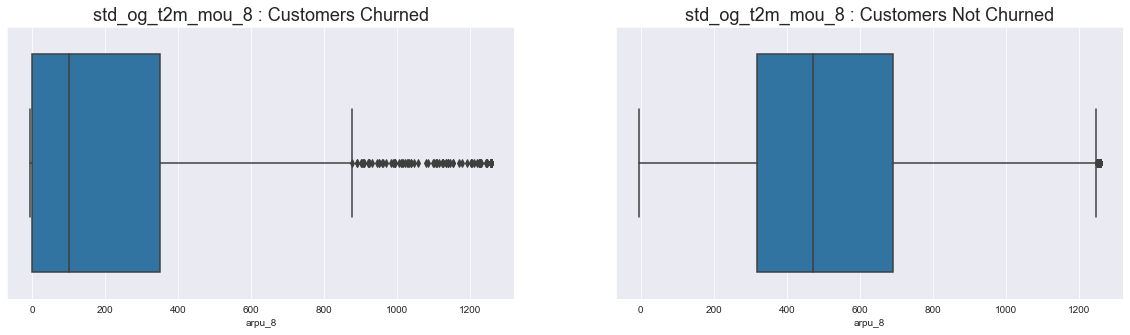

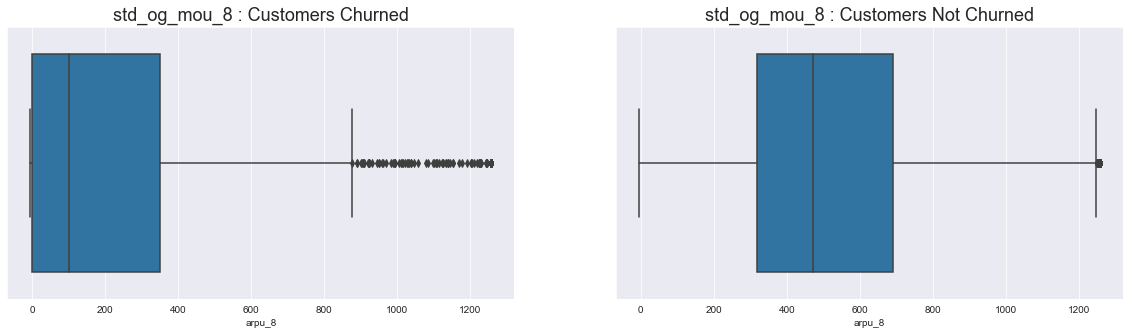

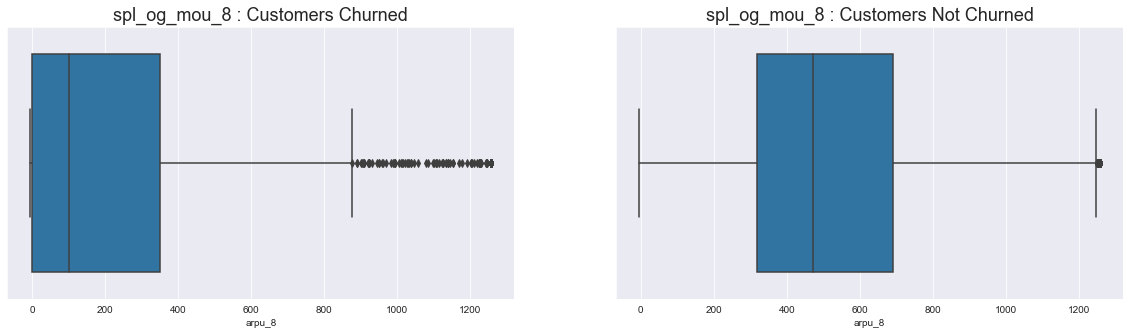

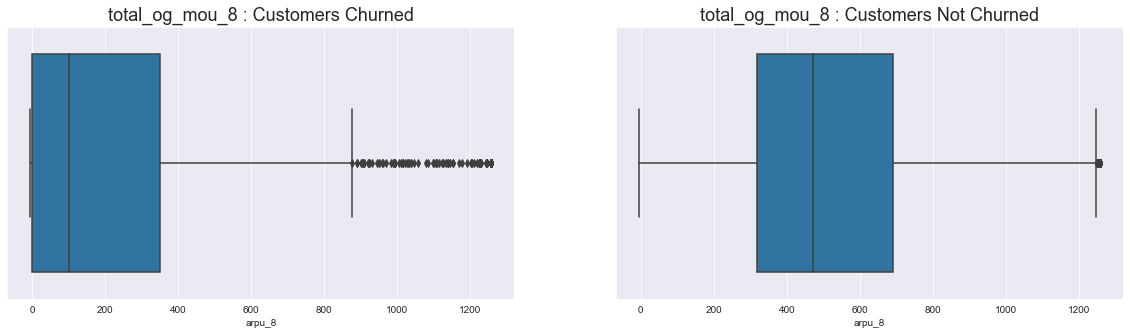

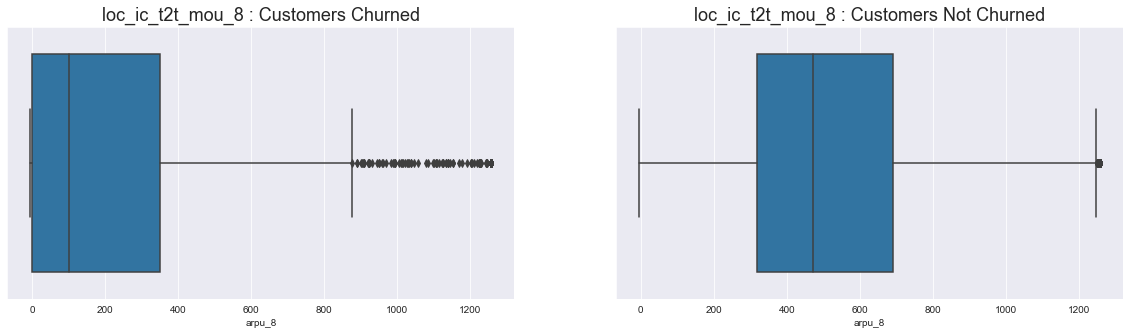

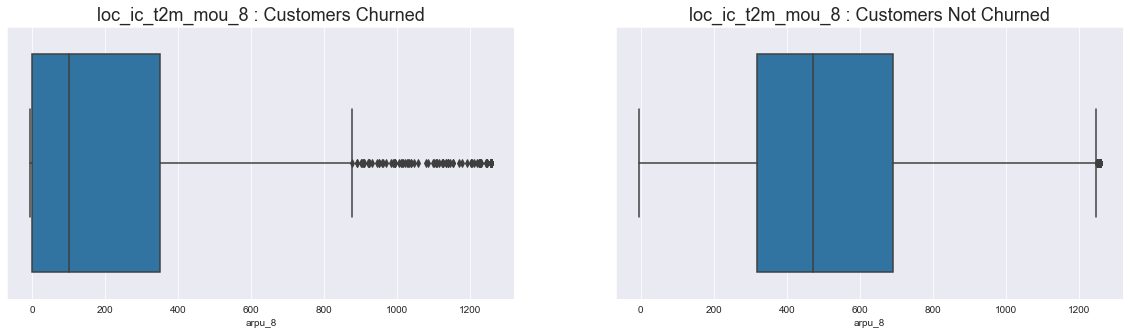

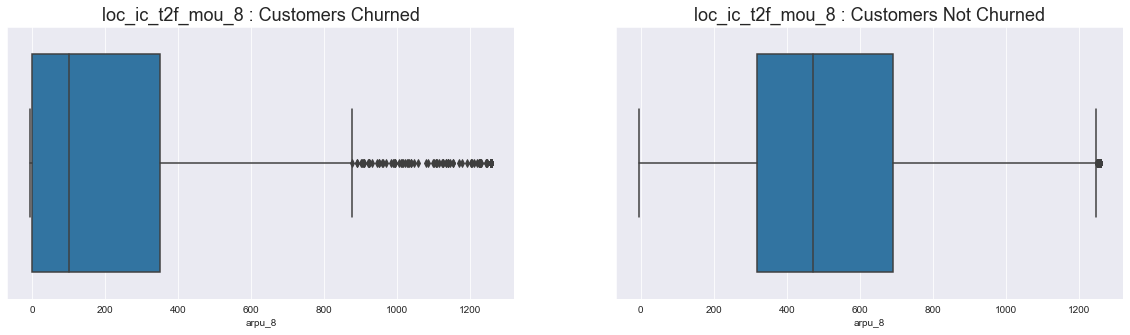

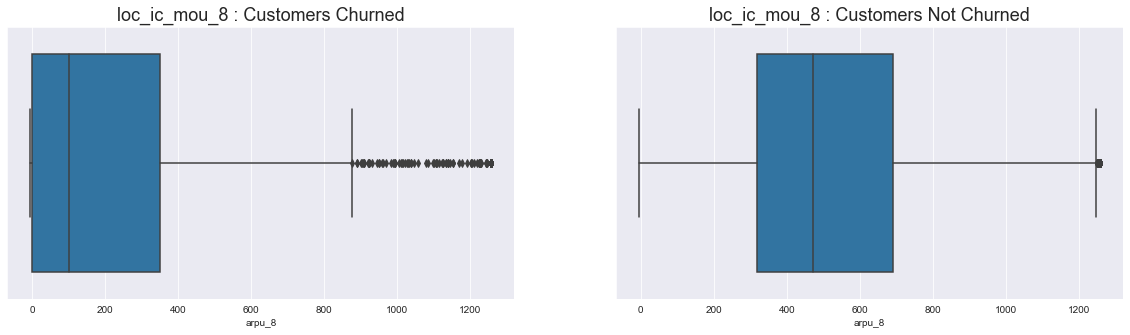

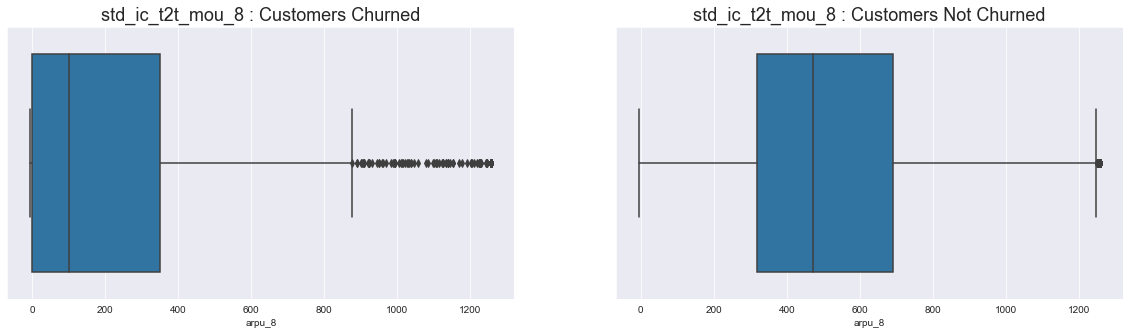

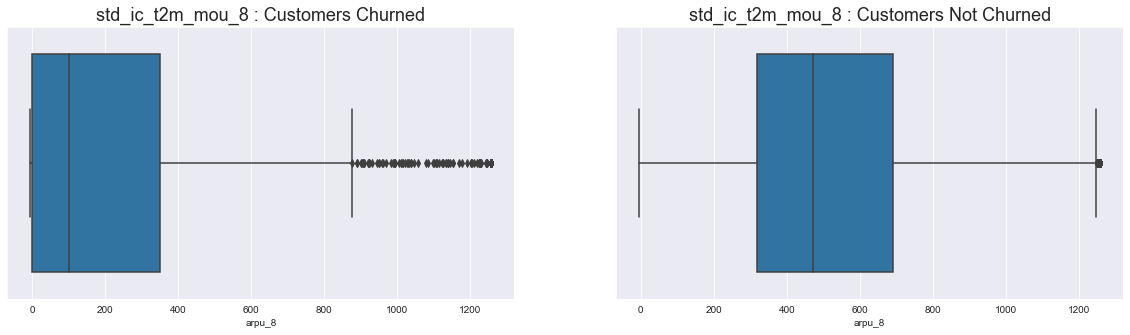

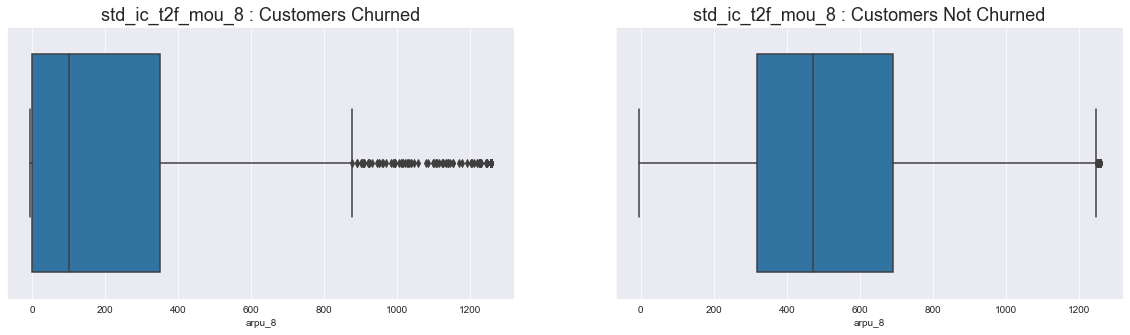

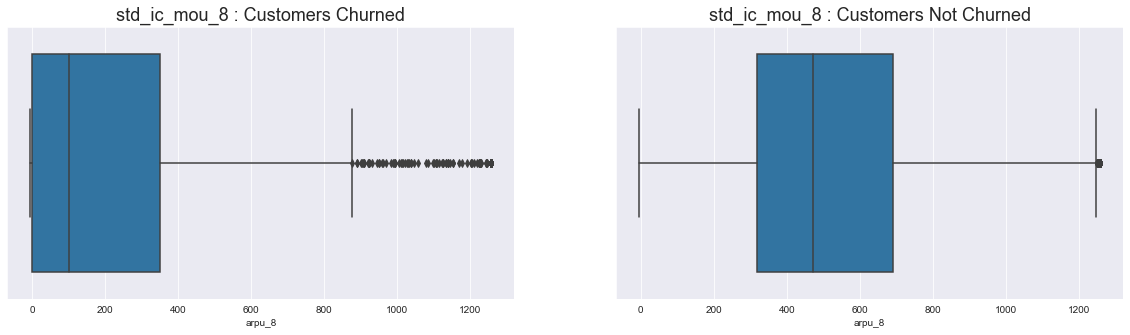

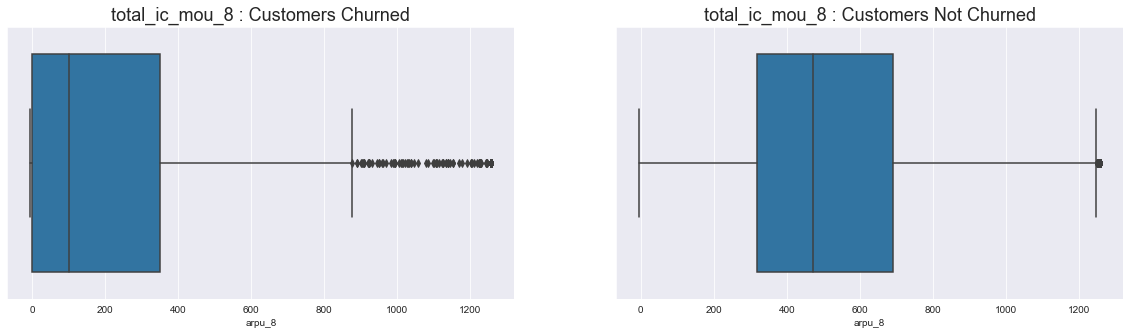

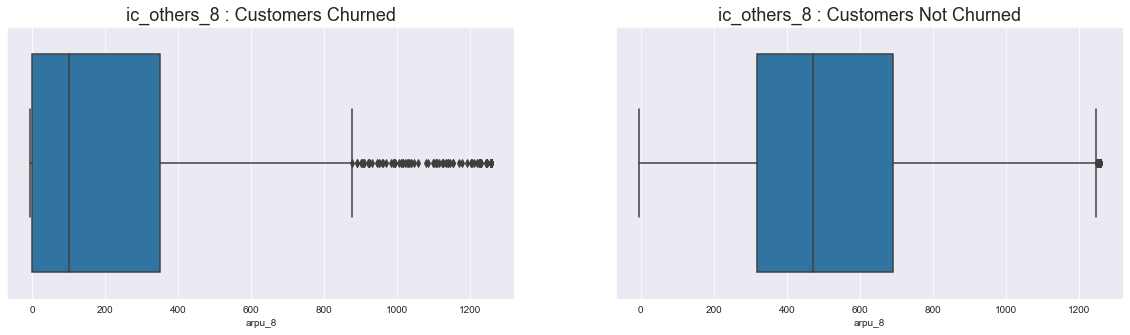

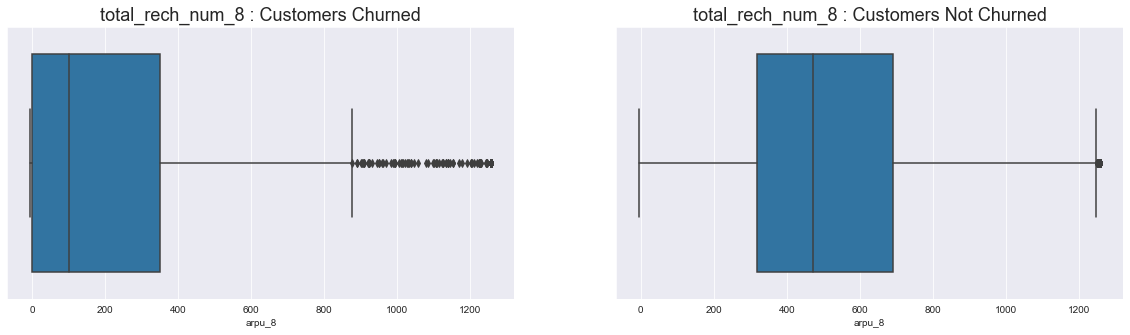

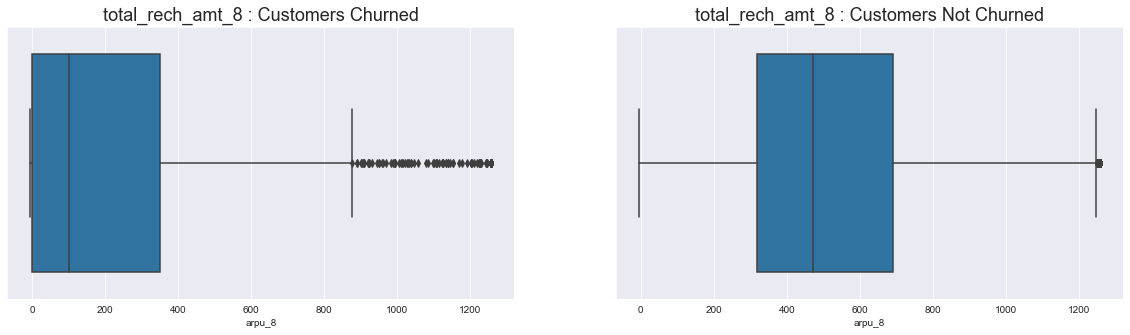

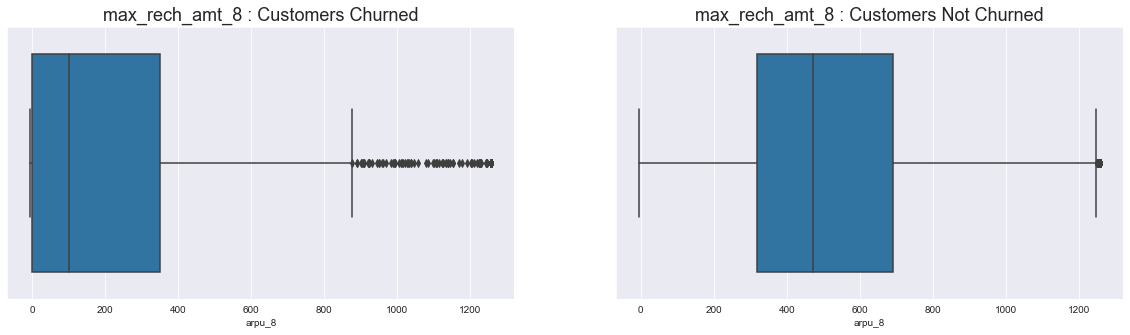

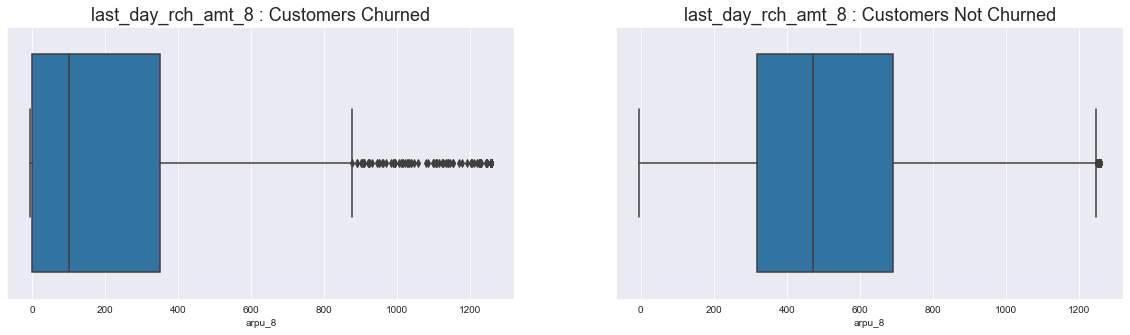

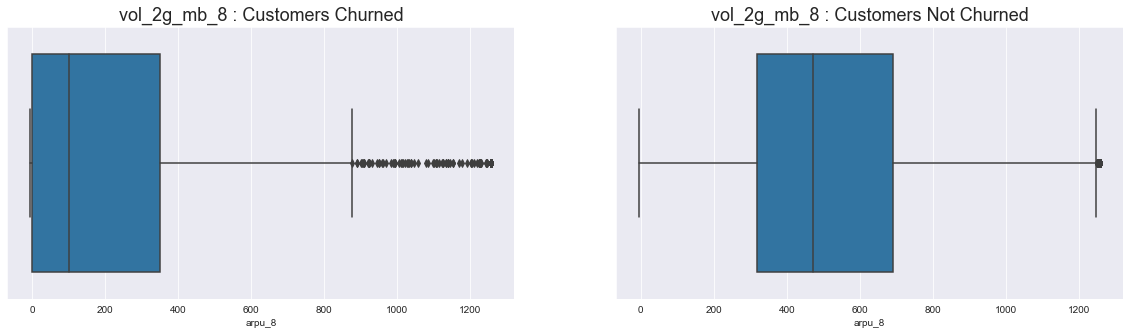

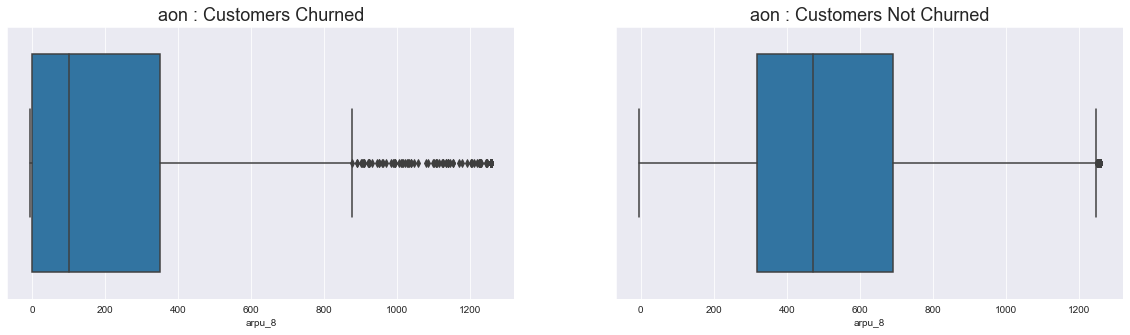

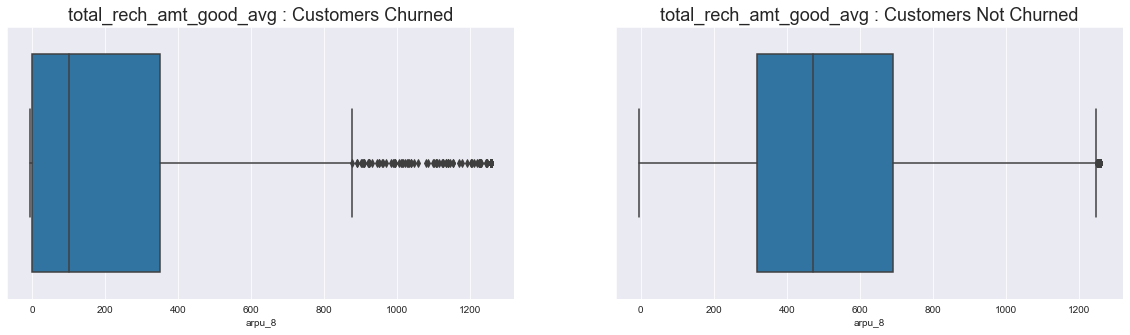

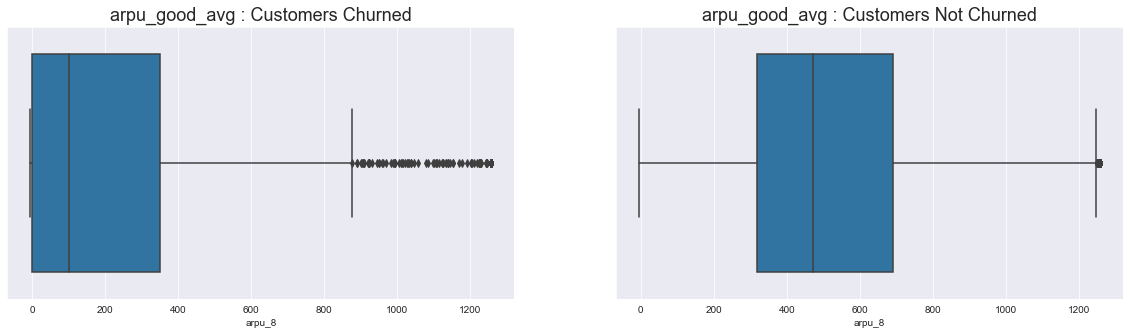

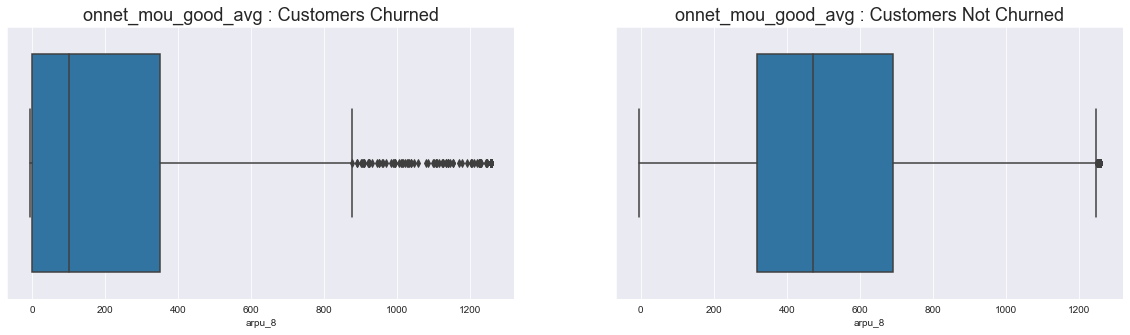

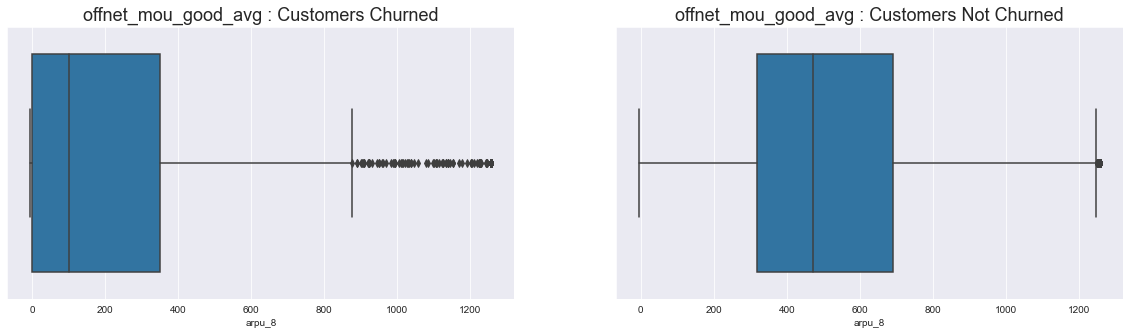

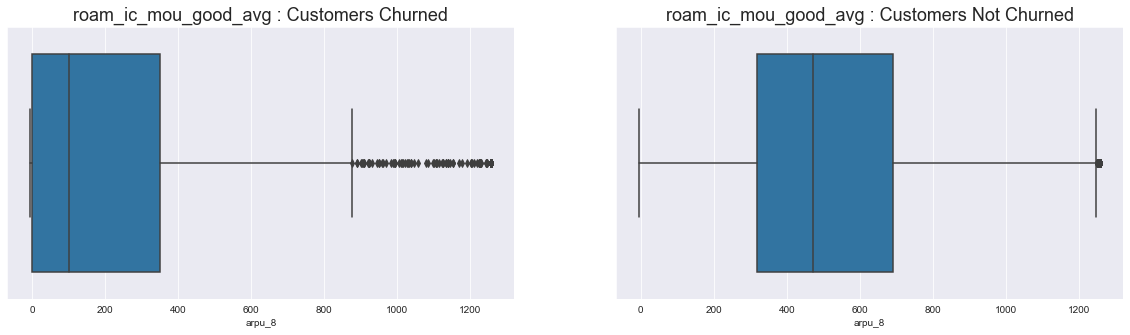

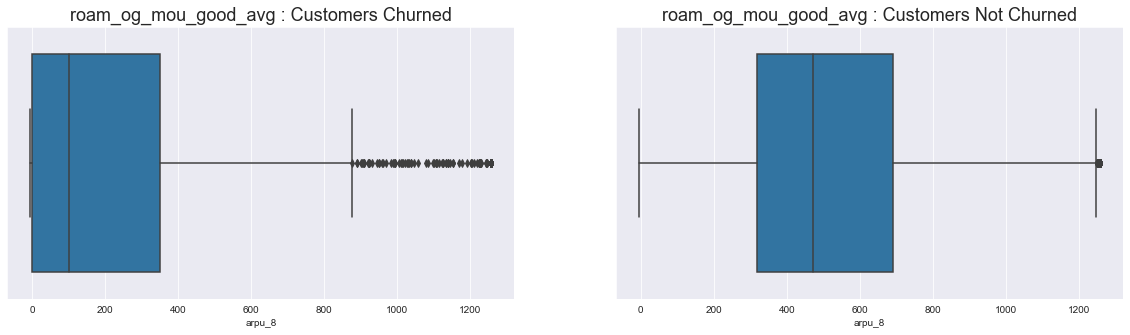

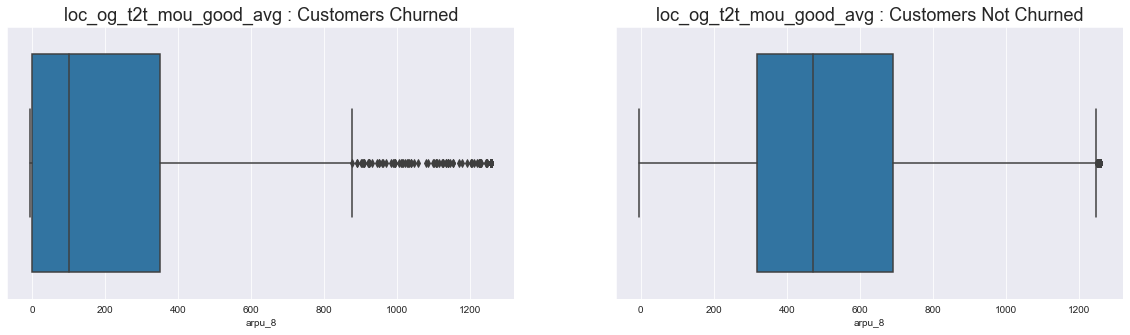

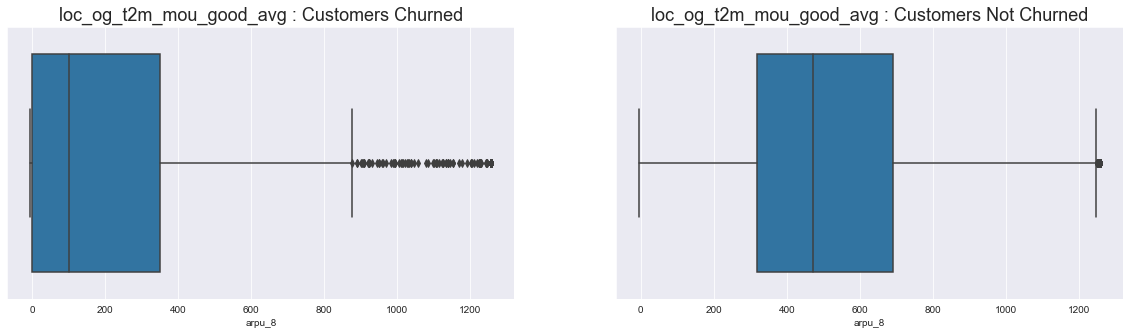

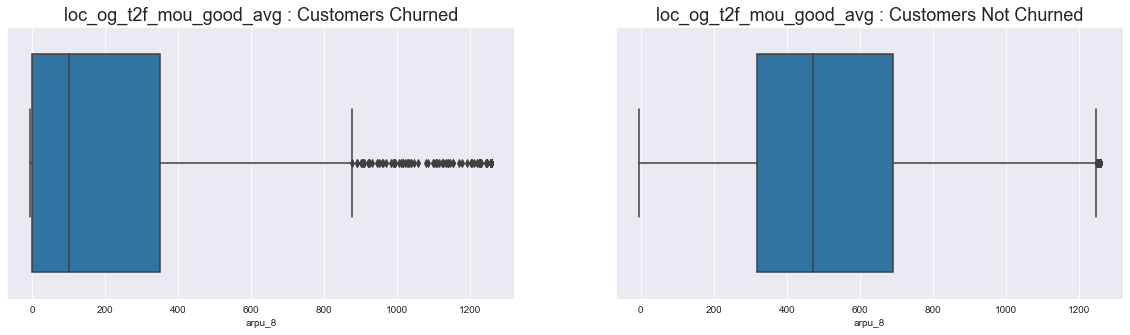

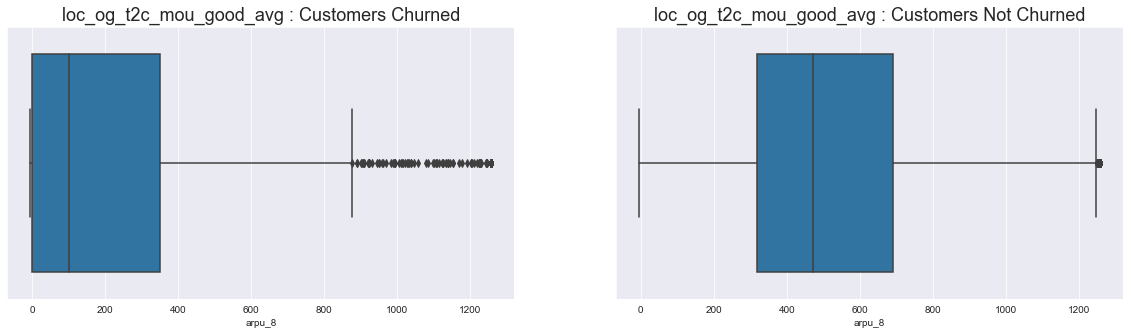

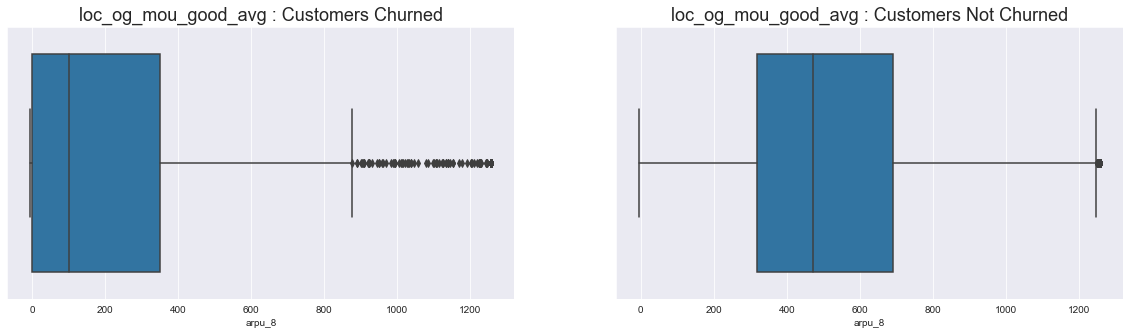

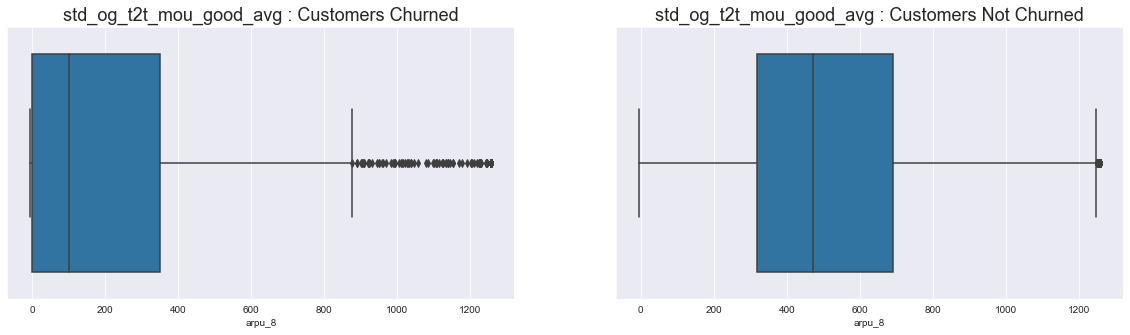

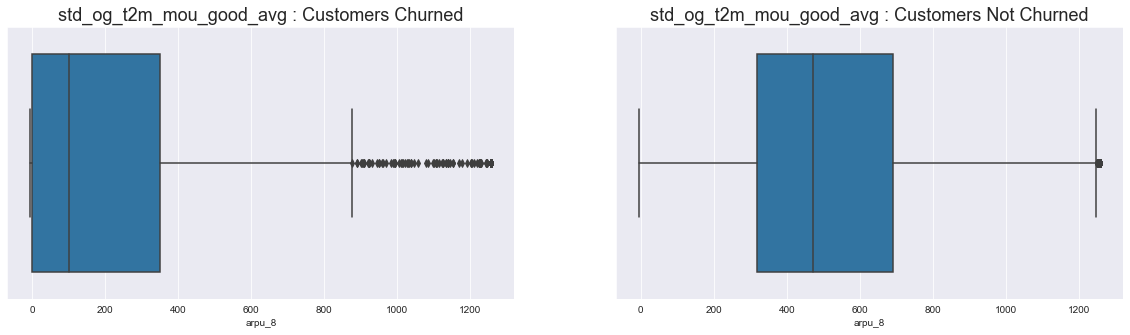

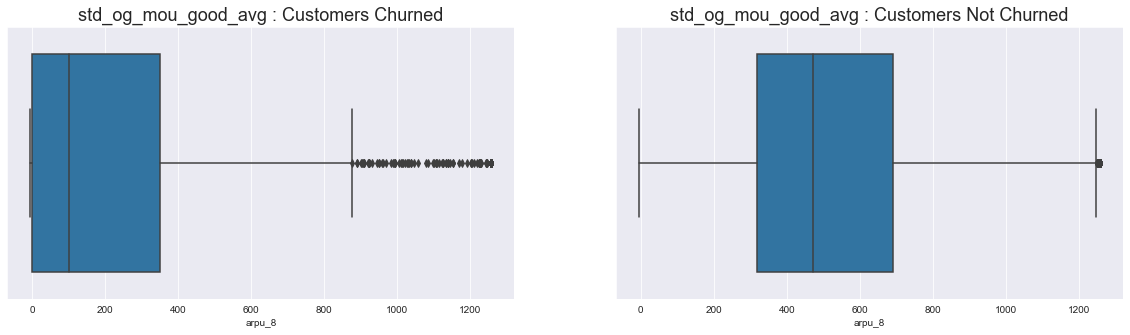

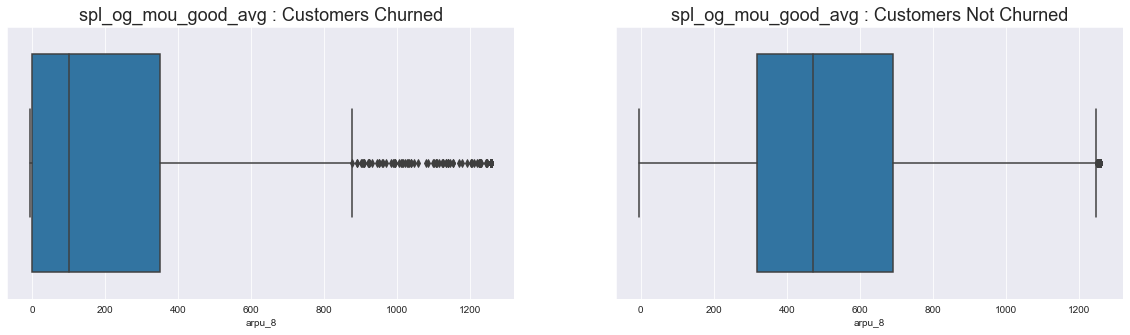

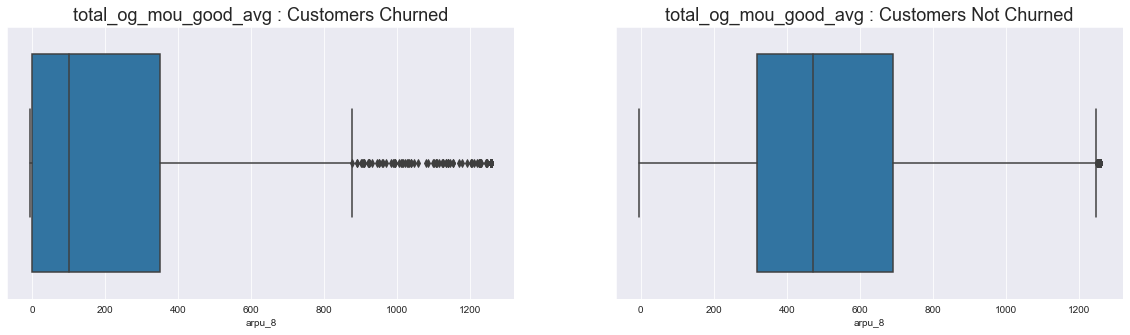

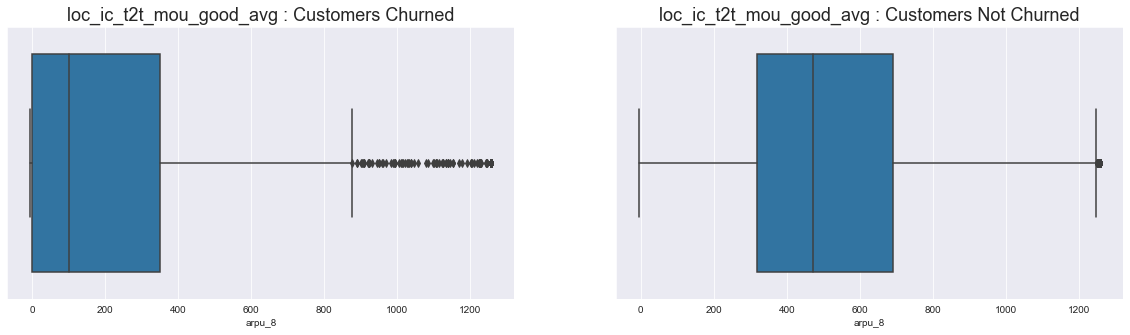

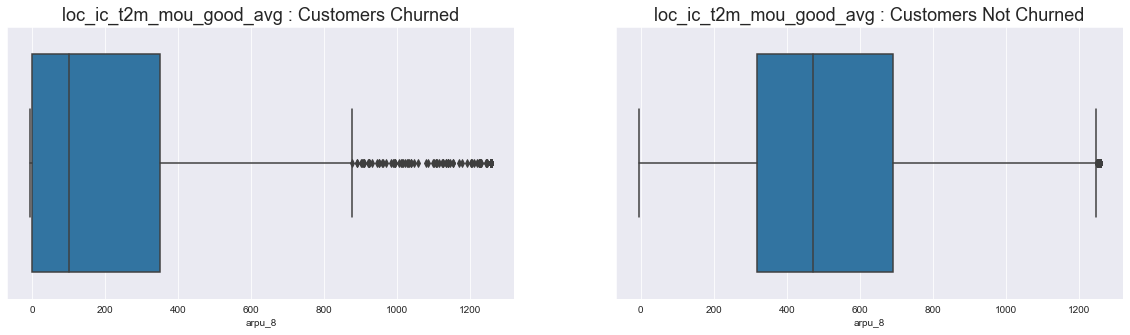

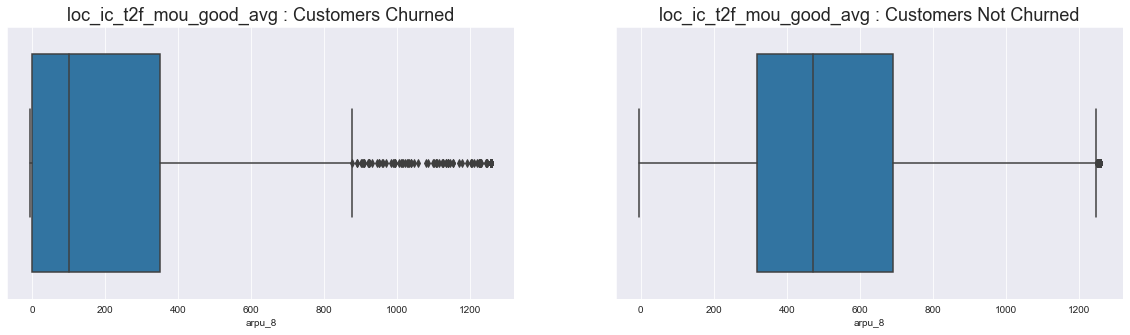

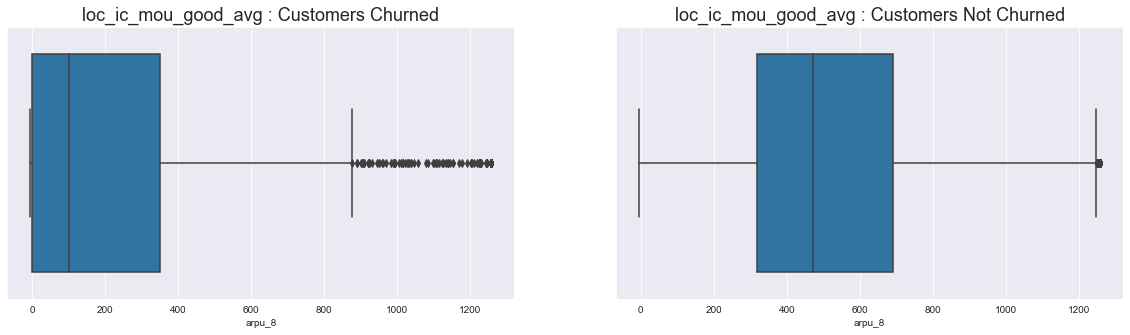

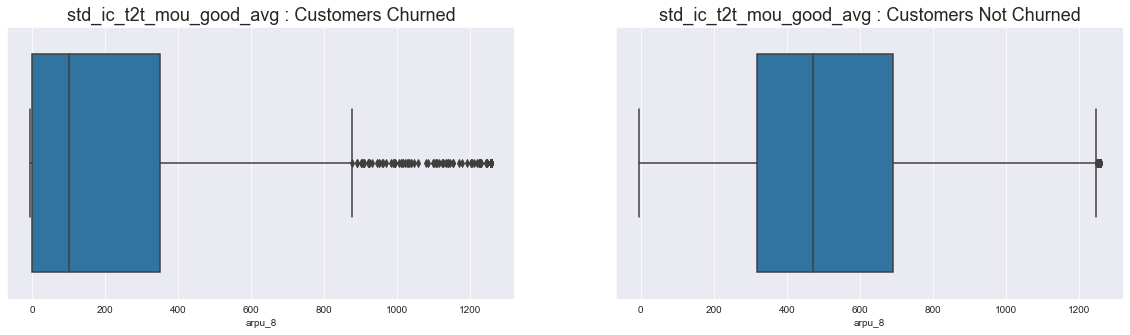

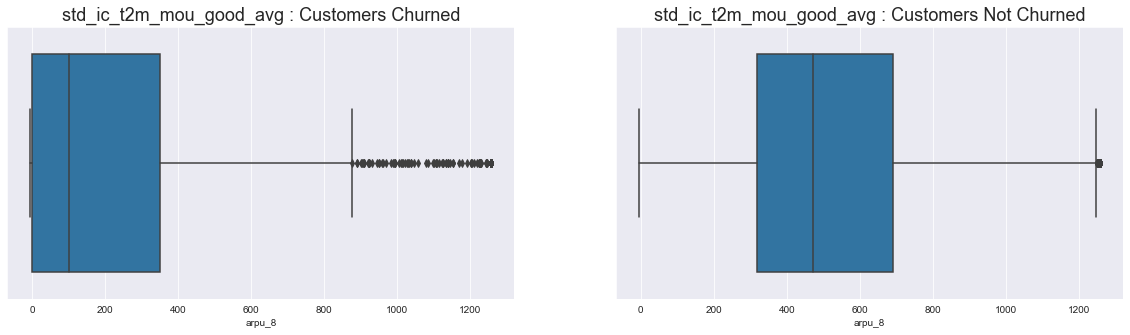

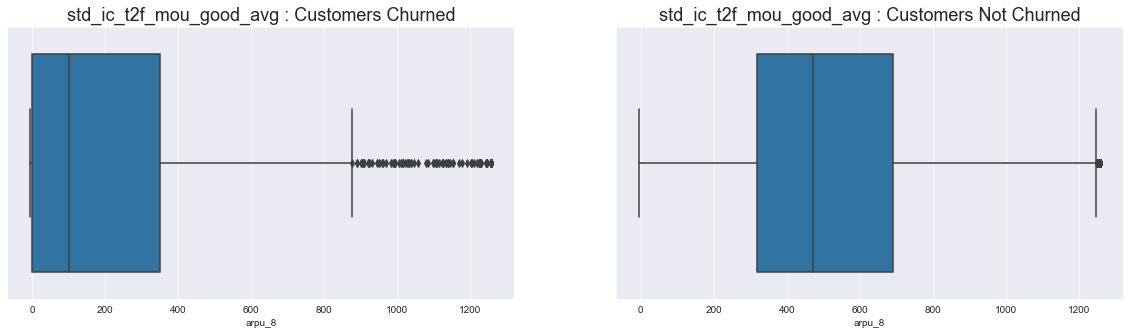

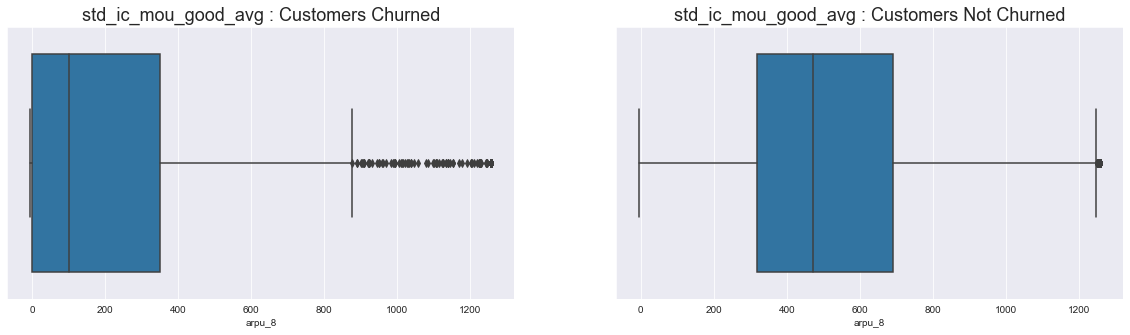

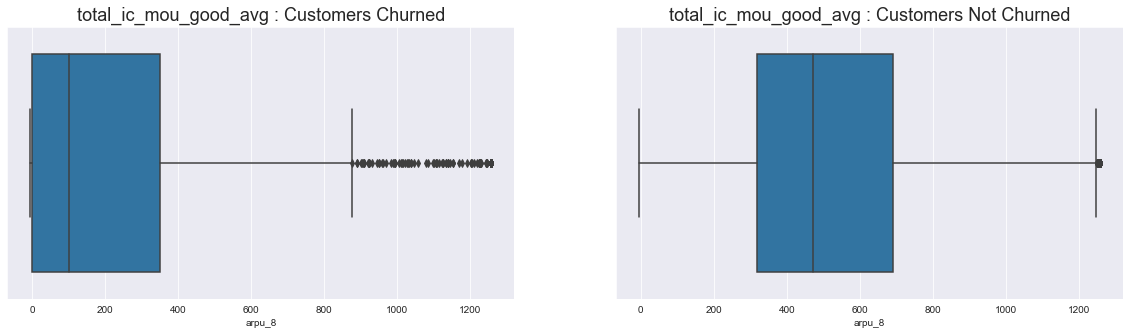

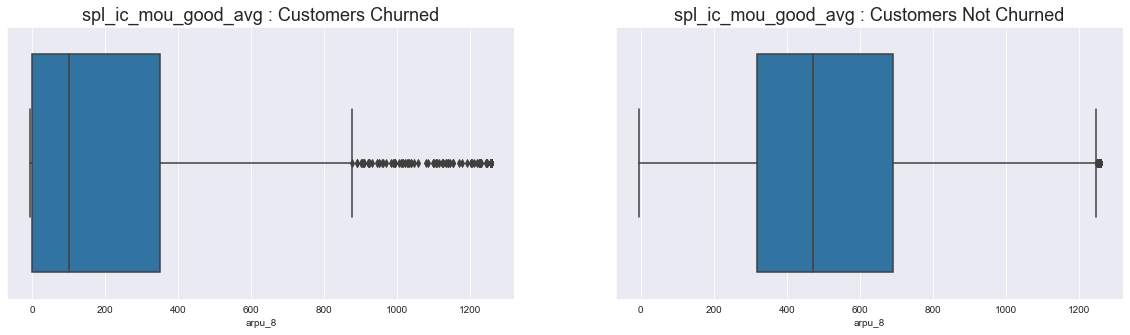

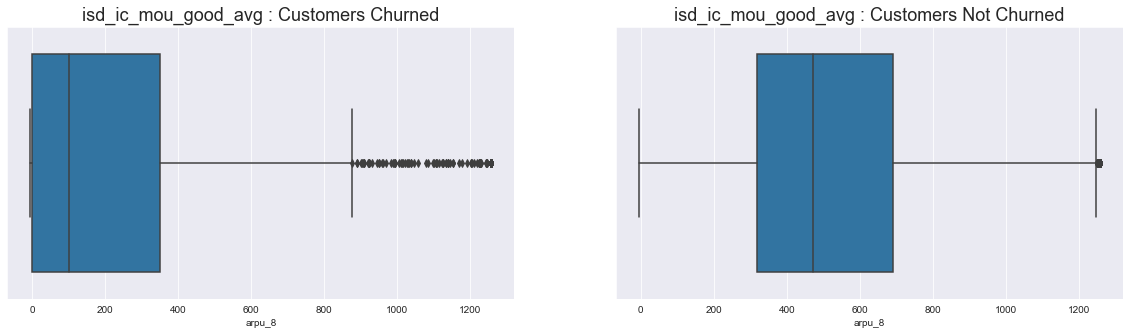

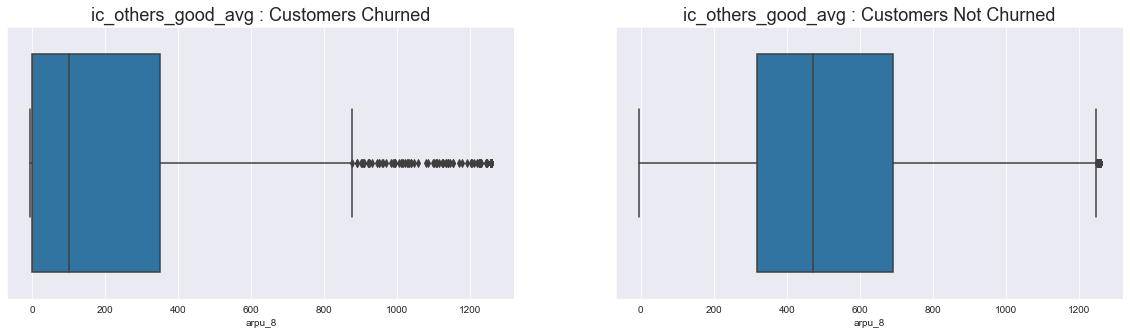

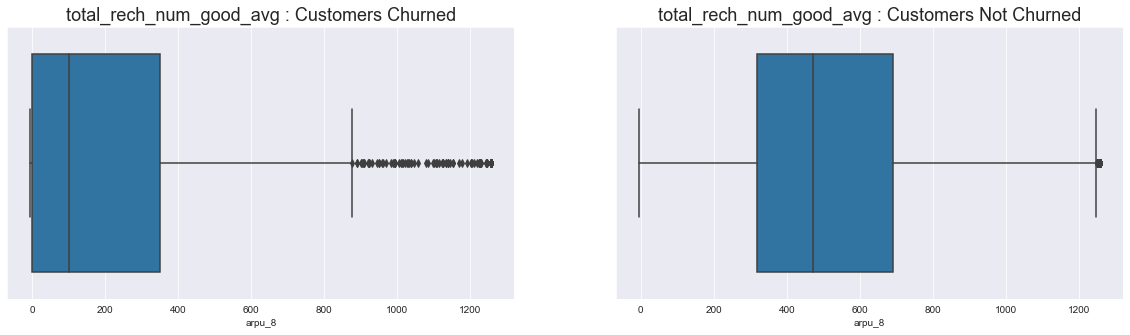

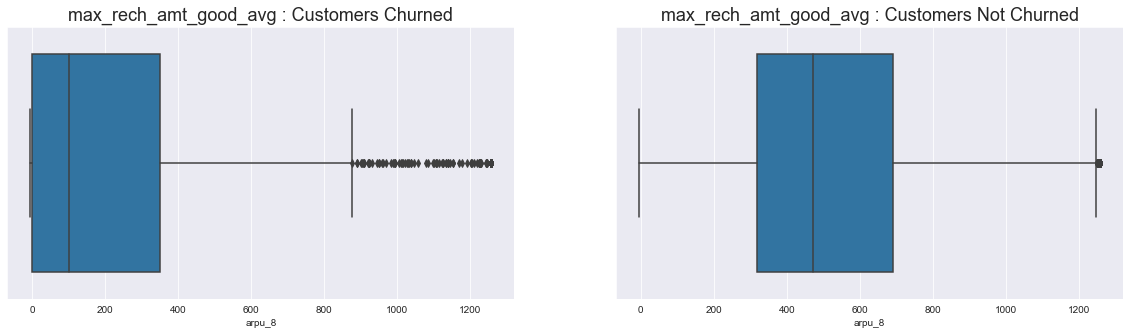

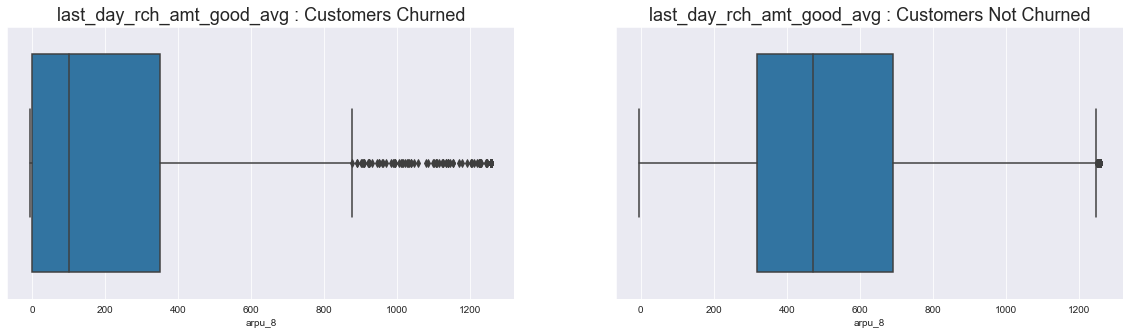

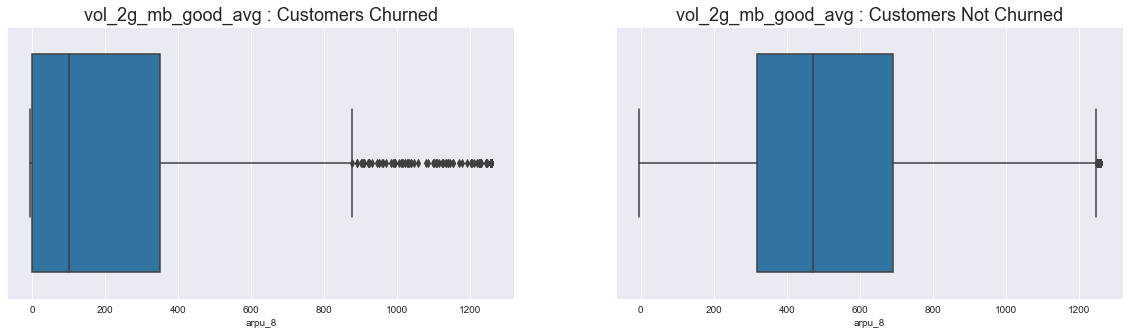

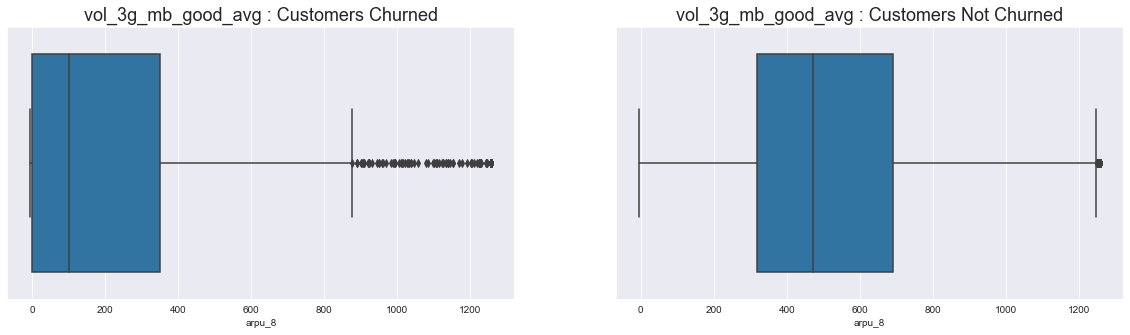

In [44]:
cols = final_df.columns

for col in cols:
    if col != "churn":
        plt.figure(figsize = (20,5))
        plt.subplot(1,2,1)
        plt.title(col + " : Customers Churned", fontsize=18)
        sns.boxplot(x = "arpu_8", data = final_df[final_df["churn"] == 1])
        plt.subplot(1,2,2)
        plt.title(col + " : Customers Not Churned", fontsize=18)
        sns.boxplot(x = "arpu_8", data = final_df[final_df["churn"] == 0])
        plt.show()

### Train Test Split

In [45]:
X = final_df.drop("churn", axis = 1)
y = final_df["churn"]

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42) # splitting the data

### MinMax Scaler

In [47]:
scaler = MinMaxScaler() # using MinMaxScaler() to scale all the features

cols = X_train.columns

X_train[cols] = scaler.fit_transform(X_train[cols])

X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,aon,total_rech_amt_good_avg,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_mou_good_avg,spl_og_mou_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg
337,0.216817,0.033594,0.057520,0.115618,0.076071,0.619086,0.000000,0.114837,0.000000,0.000000,0.002904,0.00000,0.056215,0.050675,0.166217,0.153710,0.140832,0.000000,0.000000,0.250909,0.014375,0.129954,0.000000,0.142857,0.219545,0.435165,0.515873,0.001317,0.414471,0.110361,0.330971,0.047650,0.212849,0.0,0.0,0.154317,0.383923,0.754371,0.0,0.337389,0.000000,0.001143,0.002922,0.0,0.169290,0.126708,0.475664,0.051229,0.362406,0.000000,0.002634,0.296389,0.019865,0.303993,0.0,0.000000,0.000000,0.178571,0.425197,0.436364,1.000000,0.192270
20790,0.327098,0.134969,0.365523,0.085542,0.101878,0.000000,0.061735,0.098885,0.131171,0.402048,0.315567,0.47737,0.310706,0.154002,0.471286,0.000000,0.363982,0.007464,0.032060,0.000000,0.022812,0.401140,0.262626,0.428571,0.240964,0.285714,0.000000,0.000000,0.003001,0.082410,0.257690,0.138700,0.335305,0.0,0.0,0.111841,0.062567,0.000000,0.0,0.083462,0.122335,0.395942,0.321696,0.0,0.305371,0.291878,0.296195,0.005212,0.288482,0.055014,0.074512,0.000000,0.065369,0.275946,1.0,0.417934,0.083289,0.321429,0.249719,0.236364,0.000000,0.000000
42083,0.358356,0.000359,0.000000,0.001234,0.000000,0.000000,0.000000,0.000453,0.000000,0.000000,0.000000,0.00000,0.000212,0.419754,0.036111,0.021155,0.153431,0.000000,0.000000,0.000000,0.000000,0.127094,0.000000,0.142857,0.370817,0.553846,1.000000,0.034154,0.914305,0.033253,0.269089,0.011767,0.000628,0.0,0.0,0.038108,0.001277,0.000000,0.0,0.015304,0.000000,0.000000,0.000000,0.0,0.007570,0.087690,0.057299,0.042588,0.069384,0.000000,0.000000,0.000000,0.000000,0.057388,0.0,0.000000,0.000000,0.125000,0.546682,0.458182,0.129457,0.844418
95072,0.490301,0.661680,0.033177,0.116420,0.067389,0.000000,0.000000,0.087382,0.747967,0.000000,0.461187,0.00000,0.413029,0.086994,0.130705,0.740883,0.179646,0.020769,0.056002,0.277273,0.058123,0.168948,0.000000,0.428571,0.487282,0.318681,0.000000,0.034911,0.316105,0.146988,0.313277,0.482572,0.050189,0.0,0.0,0.064633,0.075361,0.080567,0.0,0.076849,0.543295,0.013429,0.351731,0.0,0.326464,0.104170,0.157185,0.822275,0.216030,0.261667,0.087682,0.127854,0.148671,0.213315,0.0,0.053020,0.000000,0.392857,0.311586,0.272727,0.054008,0.410603
64915,0.410633,0.133849,0.222229,0.460653,0.439473,0.016250,0.000000,0.460787,0.000000,0.007264,0.004240,0.00000,0.219591,0.993424,0.684800,1.000000,0.877826,0.017037,0.005740,0.949091,0.063488,0.740837,0.000000,0.142857,0.412316,0.360440,0.650794,1.000000,0.757919,0.339759,0.445244,0.102917,0.213647,0.0,0.0,0.333304,0.418661,0.010167,0.0,0.401300,0.000000,0.009168,0.005981,0.0,0.203413,0.913455,0.790504,1.000000,0.922480,0.000000,0.053759,0.764218,0.081114,0.780545,0.0,0.004318,0.000000,0.160714,0.518560,0.870909,0.238953,0.461020


In [48]:
X_test[cols] = scaler.transform(X_test[cols])

# head to confirm
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,aon,total_rech_amt_good_avg,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_mou_good_avg,spl_og_mou_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg
39713,0.815156,0.193509,0.145768,0.059660,0.144827,0.000000,0.823842,0.117849,0.209870,0.095459,0.185131,1.000000,0.221450,0.178501,0.241962,0.002367,0.217235,0.538050,0.000000,0.000000,0.172704,0.215733,0.000000,1.000000,0.767738,0.109890,0.099206,0.148815,0.133378,0.145060,0.319917,0.194419,0.102517,0.250973,0.057278,0.082643,0.079716,0.076100,0.44041,0.086372,0.198175,0.066198,0.167005,0.724078,0.191494,0.409983,0.272126,0.067277,0.314555,0.109635,0.092990,0.194271,0.106804,0.283265,0.156863,0.0,0.043226,0.857143,0.159730,0.058182,0.155302,0.88811
80955,0.004107,0.038713,0.003685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107143,0.000000,0.000000,0.000000,0.000000,0.112704,1.000000,1.000000,1.000000,0.176971,0.043377,0.175837,0.088150,0.107773,0.025880,0.03104,0.105041,1.000000,0.156904,1.000000,0.086669,1.000000,0.025021,0.034691,0.093406,0.039875,1.000000,0.173927,0.000000,0.446115,0.128282,0.000000,0.0,0.000000,0.767857,0.227222,0.200000,0.000000,0.00000
80034,1.000000,1.000000,0.578724,0.000000,0.178103,0.117253,0.000000,0.122151,1.000000,0.265058,1.000000,0.000000,1.000000,0.002837,0.050529,0.137288,0.046983,0.102710,0.171450,0.000000,0.141871,0.109642,0.000000,0.500000,1.000000,0.659341,1.000000,0.000000,0.752918,1.000000,1.000000,1.000000,0.641100,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.277288,0.021443,0.188270,0.000000,0.154396,0.023501,0.000343,0.000000,0.007443,0.016300,0.000000,0.000000,0.005291,0.007286,0.000000,0.0,0.000000,0.392857,0.654668,1.000000,0.000000,0.00000
93911,0.487050,0.398266,0.316031,0.383472,0.503546,0.952047,0.562001,0.508157,0.341714,0.051649,0.240851,0.249752,0.436701,0.349781,0.373364,0.327835,0.386288,0.161285,0.052558,0.000000,0.085206,0.340712,0.654040,0.142857,0.566934,1.000000,0.000000,0.000000,0.062021,0.369157,0.415299,0.232629,0.249358,0.922536,0.443326,0.343426,0.362064,0.678272,0.00000,0.392088,0.100809,0.046406,0.092289,0.176833,0.273008,0.361012,0.255060,0.063094,0.287700,0.064418,0.051045,0.037775,0.055780,0.250490,0.784314,0.0,0.074855,0.107143,1.000000,1.000000,0.000000,0.00000
55461,0.501684,0.876979,0.369268,0.772095,0.082446,0.026764,0.000000,0.338964,0.777492,0.439632,0.736019,0.000000,0.752761,0.259091,0.199735,0.459945,0.253534,0.159500,0.112824,0.089091,0.128017,0.236833,0.065657,0.428571,0.481928,0.285714,0.000000,0.000000,0.118039,0.224578,0.394434,0.589584,0.153983,0.000000,0.000000,0.498065,0.026890,0.015097,0.00000,0.207188,0.511794,0.182712,0.435875,0.000000,0.459946,0.264803,0.178056,0.754518,0.272821,0.088868,0.008421,0.000000,0.034211,0.233207,0.000000,0.0,0.045335,0.375000,0.137233,0.176364,0.000000,0.00000


In [49]:
X_train.describe(percentiles=(0.25,0.5, 0.75,0.9,0.95)) # confirming that the values are between 0 and 1 since we used MinMaxScaler

,arpu_8,onnet_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,aon,total_rech_amt_good_avg,arpu_good_avg,onnet_mou_good_avg,offnet_mou_good_avg,roam_ic_mou_good_avg,roam_og_mou_good_avg,loc_og_t2t_mou_good_avg,loc_og_t2m_mou_good_avg,loc_og_t2f_mou_good_avg,loc_og_t2c_mou_good_avg,loc_og_mou_good_avg,std_og_t2t_mou_good_avg,std_og_t2m_mou_good_avg,std_og_mou_good_avg,spl_og_mou_good_avg,total_og_mou_good_avg,loc_ic_t2t_mou_good_avg,loc_ic_t2m_mou_good_avg,loc_ic_t2f_mou_good_avg,loc_ic_mou_good_avg,std_ic_t2t_mou_good_avg,std_ic_t2m_mou_good_avg,std_ic_t2f_mou_good_avg,std_ic_mou_good_avg,total_ic_mou_good_avg,spl_ic_mou_good_avg,isd_ic_mou_good_avg,ic_others_good_avg,total_rech_num_good_avg,max_rech_amt_good_avg,last_day_rch_amt_good_avg,vol_2g_mb_good_avg,vol_3g_mb_good_avg
count,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000
mean,0.404088,0.207365,0.287375,0.200038,0.257680,0.146766,0.112339,0.265855,0.148537,0.166075,0.206216,0.168130,0.307445,0.221689,0.267431,0.156563,0.277101,0.143246,0.172536,0.099522,0.182266,0.289462,0.096629,0.342507,0.387783,0.331053,0.327566,0.102536,0.356027,0.286937,0.439715,0.242660,0.325436,0.108626,0.115418,0.209896,0.279787,0.157148,0.137544,0.286074,0.177481,0.193901,0.248618,0.191190,0.362181,0.235760,0.283553,0.162167,0.294177,0.161839,0.188626,0.114372,0.200490,0.310273,0.143010,0.100235,0.109589,0.391919,0.345802,0.347698,0.119997,0.137498
std,0.251294,0.273332,0.272642,0.267468,0.280961,0.268366,0.264405,0.280557,0.276714,0.277025,0.292344,0.276143,0.274925,0.269022,0.273367,0.267962,0.273575,0.265598,0.268006,0.251844,0.265444,0.271931,0.249642,0.259662,0.259589,0.238386,0.319961,0.255630,0.313518,0.275081,0.218482,0.280421,0.265043,0.257220,0.262130,0.263515,0.277704,0.269401,0.271218,0.275184,0.290652,0.286256,0.299473,0.276058,0.260282,0.266290,0.270650,0.266068,0.270848,0.266599,0.266245,0.258854,0.264212,0.265468,0.292206,0.252487,0.254031,0.242339,0.231837,0.258814,0.264794,0.284585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234264,0.025160,0.081059,0.019157,0.041394,0.000000,0.000000,0.045842,0.000000,0.000492,0.001956,0.000000,0.099303,0.032064,0.060747,0.000000,0.068559,0.000000,0.002017,0.000000,0.010208,0.084425,0.000000,0.142857,0.207497,0.147253,0.000000,0.000000,0.099700,0.077590,0.276582,0.043128,0.126686,0.000000,0.000000,0.033529,0.063066,0.000000,0.00000

In [50]:
for col in X_train.columns:
    print(col + " : " + str(np.isinf(X_train[col]).sum())) # Checking if any column has infinite value so that later it doesn't cause any issue

arpu_8 : 0
onnet_mou_8 : 0
offnet_mou_8 : 0
loc_og_t2t_mou_8 : 0
loc_og_t2m_mou_8 : 0
loc_og_t2f_mou_8 : 0
loc_og_t2c_mou_8 : 0
loc_og_mou_8 : 0
std_og_t2t_mou_8 : 0
std_og_t2m_mou_8 : 0
std_og_mou_8 : 0
spl_og_mou_8 : 0
total_og_mou_8 : 0
loc_ic_t2t_mou_8 : 0
loc_ic_t2m_mou_8 : 0
loc_ic_t2f_mou_8 : 0
loc_ic_mou_8 : 0
std_ic_t2t_mou_8 : 0
std_ic_t2m_mou_8 : 0
std_ic_t2f_mou_8 : 0
std_ic_mou_8 : 0
total_ic_mou_8 : 0
ic_others_8 : 0
total_rech_num_8 : 0
total_rech_amt_8 : 0
max_rech_amt_8 : 0
last_day_rch_amt_8 : 0
vol_2g_mb_8 : 0
aon : 0
total_rech_amt_good_avg : 0
arpu_good_avg : 0
onnet_mou_good_avg : 0
offnet_mou_good_avg : 0
roam_ic_mou_good_avg : 0
roam_og_mou_good_avg : 0
loc_og_t2t_mou_good_avg : 0
loc_og_t2m_mou_good_avg : 0
loc_og_t2f_mou_good_avg : 0
loc_og_t2c_mou_good_avg : 0
loc_og_mou_good_avg : 0
std_og_t2t_mou_good_avg : 0
std_og_t2m_mou_good_avg : 0
std_og_mou_good_avg : 0
spl_og_mou_good_avg : 0
total_og_mou_good_avg : 0
loc_ic_t2t_mou_good_avg : 0
loc_ic_t2m_mou_good_

## Modeling

### Interpretable Model

Using Logistic Regression to make an interpretable model.

#### Feature scaling using RFE

Getting top 15 columns from RFE to make the model

In [51]:
X_train_interpretable = X_train.copy()

logreg = LogisticRegression(class_weight= 'balanced') # as the churn (target variable) is imbalanced

rfe = RFE(logreg, 15) # getting top 15 columns from RFE to make the model
rfe = rfe.fit(X_train_interpretable,y_train)

rfe.support_

array([False,  True,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [52]:
list(zip(X_train_interpretable.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 37),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 2),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 43),
 ('loc_og_t2c_mou_8', False, 32),
 ('loc_og_mou_8', False, 31),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('spl_og_mou_8', False, 48),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 9),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 7),
 ('loc_ic_mou_8', False, 8),
 ('std_ic_t2t_mou_8', False, 33),
 ('std_ic_t2m_mou_8', False, 34),
 ('std_ic_t2f_mou_8', False, 39),
 ('std_ic_mou_8', False, 27),
 ('total_ic_mou_8', True, 1),
 ('ic_others_8', False, 42),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 11),
 ('max_rech_amt_8', False, 10),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('aon', False, 5),
 ('total_rech_amt_good_avg', True, 1),
 ('arpu_good_avg', False, 23),
 ('onnet_mou_good_avg', False, 3),
 ('o

In [53]:
col = X_train_interpretable.columns[rfe.support_] # Get the top 15 features

#### Model 1

In [54]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.3
Date:                Mon, 18 Jan 2021   Deviance:                       8150.7
Time:                        14:05:05   Pearson chi2:                 1.34e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5627      0.064     -8.821      0.000      -0.688      -0.438
onnet_mou_8                 2.9598      0.495      5.980      0.000       1.990       3.930
offnet_mou_8                2.1417      0.425      5.041      0.000       1.309       2.974
loc_og_t2m_mou_8           -1.0512      0.498     -2.111      0.035      -2.027      -0.075
std_og_t2t_mou_8           -4.4893      0.653     -6.875      0.000      -5.769      -3.210
std_og_t2m_mou_8           -3.4598      0.524     -6.604      0.000      -4.487      -2.433
std_og_mou_8                7.2395      1.076      6.731      0.000       5.131       9.348
total_og_mou_8             -7.4942      0.937     -7.997      0.000      -9.331      -5.658
loc_ic_t2m_mou_8           -1.3481      0.485     -2.780      0.005      -2.299      -0.398
total_ic_mou_8             -3.7013      0.430     -8.616      0.000      -4.543      -2.859
total_rech_num_8           -1.9816      0.178    -11.124      0.000      -2.331      -1.632
last_day_rch_amt_8         -2.4407      0.138    -17.647      0.000      -2.712      -2.170
vol_2g_mb_8                -1.9835      0.228     -8.692      0.000      -2.431      -1.536
total_rech_amt_good_avg     1.0963      0.130      8.452      0.000       0.842       1.350
std_og_mou_good_avg         0.8053      0.126      6.374      0.000       0.558       1.053
loc_ic_t2m_mou_good_avg     1.3084      0.196      6.678      0.000       0.924       1.692
===========================================================================================
"""

Checking VIF

In [55]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_mou_8,61.65
6,total_og_mou_8,57.95
1,offnet_mou_8,34.27
3,std_og_t2t_mou_8,25.48
4,std_og_t2m_mou_8,23.42
0,onnet_mou_8,21.83
2,loc_og_t2m_mou_8,12.59
7,loc_ic_t2m_mou_8,12.41
8,total_ic_mou_8,7.28
14,loc_ic_t2m_mou_good_avg,6.90


Removing std_og_mou_8 as the feature has a really high VIF value.

In [56]:
col = col.drop('std_og_mou_8',1)
col

Index(['onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'total_rech_amt_good_avg', 'std_og_mou_good_avg',
       'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 2

In [57]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm2 = sm.GLM(y_train, X_train_interpretable[col], family = sm.families.Binomial())
res = logm2.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4139.7
Date:                Mon, 18 Jan 2021   Deviance:                       8279.5
Time:                        14:05:05   Pearson chi2:                 1.31e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
onnet_mou_8                 1.1488      0.436      2.636      0.008       0.295       2.003
offnet_mou_8                2.8212      0.406      6.951      0.000       2.026       3.617
loc_og_t2m_mou_8           -3.3826      0.402     -8.425      0.000      -4.169      -2.596
std_og_t2t_mou_8           -0.5897      0.356     -1.655      0.098      -1.288       0.109
std_og_t2m_mou_8           -1.7756      0.459     -3.867      0.000      -2.676      -0.876
total_og_mou_8             -2.4485      0.542     -4.519      0.000      -3.511      -1.387
loc_ic_t2m_mou_8           -0.9515      0.497     -1.913      0.056      -1.926       0.023
total_ic_mou_8             -4.7070      0.434    -10.834      0.000      -5.559      -3.855
total_rech_num_8           -2.6696      0.171    -15.634      0.000      -3.004      -2.335
last_day_rch_amt_8         -2.7270      0.133    -20.429      0.000      -2.989      -2.465
vol_2g_mb_8                -2.1305      0.230     -9.266      0.000      -2.581      -1.680
total_rech_amt_good_avg     0.9892      0.129      7.657      0.000       0.736       1.242
std_og_mou_good_avg         0.3591      0.113      3.165      0.002       0.137       0.582
loc_ic_t2m_mou_good_avg     0.8681      0.191      4.538      0.000       0.493       1.243
===========================================================================================
"""

Checking VIF

In [58]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,32.45
5,total_og_mou_8,30.84
0,onnet_mou_8,15.49
4,std_og_t2m_mou_8,13.33
6,loc_ic_t2m_mou_8,12.40
2,loc_og_t2m_mou_8,11.38
7,total_ic_mou_8,7.25
3,std_og_t2t_mou_8,6.95
13,loc_ic_t2m_mou_good_avg,6.90
12,std_og_mou_good_avg,4.48


Removing offnet_mou_8 as this feature has a really high VIF value.

In [59]:
col = col.drop("offnet_mou_8",1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'total_rech_amt_good_avg', 'std_og_mou_good_avg',
       'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 3

In [60]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4120.3
Date:                Mon, 18 Jan 2021   Deviance:                       8240.6
Time:                        14:05:06   Pearson chi2:                 1.15e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5821      0.064     -9.138      0.000      -0.707      -0.457
onnet_mou_8                 1.9395      0.431      4.504      0.000       1.095       2.784
loc_og_t2m_mou_8           -1.6450      0.355     -4.631      0.000      -2.341      -0.949
std_og_t2t_mou_8           -1.2917      0.328     -3.942      0.000      -1.934      -0.649
std_og_t2m_mou_8            0.5447      0.336      1.623      0.105      -0.113       1.203
total_og_mou_8             -3.0375      0.564     -5.387      0.000      -4.143      -1.932
loc_ic_t2m_mou_8           -1.0689      0.489     -2.184      0.029      -2.028      -0.110
total_ic_mou_8             -4.4828      0.433    -10.351      0.000      -5.332      -3.634
total_rech_num_8           -1.8744      0.172    -10.880      0.000      -2.212      -1.537
last_day_rch_amt_8         -2.2998      0.134    -17.111      0.000      -2.563      -2.036
vol_2g_mb_8                -1.9370      0.224     -8.652      0.000      -2.376      -1.498
total_rech_amt_good_avg     1.3215      0.125     10.557      0.000       1.076       1.567
std_og_mou_good_avg         0.8080      0.125      6.440      0.000       0.562       1.054
loc_ic_t2m_mou_good_avg     1.3572      0.196      6.936      0.000       0.974       1.741
===========================================================================================
"""

Checking VIF

In [61]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,25.07
0,onnet_mou_8,13.95
5,loc_ic_t2m_mou_8,12.37
6,total_ic_mou_8,7.25
2,std_og_t2t_mou_8,6.93
12,loc_ic_t2m_mou_good_avg,6.90
1,loc_og_t2m_mou_8,6.51
3,std_og_t2m_mou_8,6.49
11,std_og_mou_good_avg,4.47
10,total_rech_amt_good_avg,3.19


Removing total_og_mou_8 as it has a really high VIF value.

In [62]:
col = col.drop("total_og_mou_8", 1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'total_rech_amt_good_avg', 'std_og_mou_good_avg',
       'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 4

In [63]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4137.2
Date:                Mon, 18 Jan 2021   Deviance:                       8274.3
Time:                        14:05:06   Pearson chi2:                 8.66e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5320      0.063     -8.441      0.000      -0.656      -0.408
onnet_mou_8                 0.2221      0.298      0.747      0.455      -0.361       0.805
loc_og_t2m_mou_8           -2.6195      0.301     -8.711      0.000      -3.209      -2.030
std_og_t2t_mou_8           -1.4616      0.301     -4.858      0.000      -2.051      -0.872
std_og_t2m_mou_8           -1.1003      0.158     -6.955      0.000      -1.410      -0.790
loc_ic_t2m_mou_8           -0.9494      0.491     -1.933      0.053      -1.912       0.013
total_ic_mou_8             -4.7881      0.436    -10.973      0.000      -5.643      -3.933
total_rech_num_8           -1.8987      0.172    -11.059      0.000      -2.235      -1.562
last_day_rch_amt_8         -2.3130      0.134    -17.261      0.000      -2.576      -2.050
vol_2g_mb_8                -1.9305      0.223     -8.647      0.000      -2.368      -1.493
total_rech_amt_good_avg     1.3171      0.124     10.612      0.000       1.074       1.560
std_og_mou_good_avg         0.7993      0.126      6.357      0.000       0.553       1.046
loc_ic_t2m_mou_good_avg     1.3914      0.196      7.103      0.000       1.007       1.775
===========================================================================================
"""

Checking VIF

In [64]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_t2m_mou_8,12.36
0,onnet_mou_8,7.37
5,total_ic_mou_8,7.25
2,std_og_t2t_mou_8,6.93
11,loc_ic_t2m_mou_good_avg,6.86
10,std_og_mou_good_avg,4.47
1,loc_og_t2m_mou_8,3.86
9,total_rech_amt_good_avg,3.17
6,total_rech_num_8,2.99
3,std_og_t2m_mou_8,2.44


Removing loc_ic_t2m_mou_8 as it has a really high VIF value.

In [65]:
col = col.drop("loc_ic_t2m_mou_8", 1)
col

Index(['onnet_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'total_rech_amt_good_avg',
       'std_og_mou_good_avg', 'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 5

In [66]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit(class_weight = "balanced")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4139.0
Date:                Mon, 18 Jan 2021   Deviance:                       8278.1
Time:                        14:05:06   Pearson chi2:                 8.65e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5318      0.063     -8.445      0.000      -0.655      -0.408
onnet_mou_8                 0.2757      0.295      0.935      0.350      -0.302       0.853
loc_og_t2m_mou_8           -2.8097      0.288     -9.757      0.000      -3.374      -2.245
std_og_t2t_mou_8           -1.5173      0.298     -5.084      0.000      -2.102      -0.932
std_og_t2m_mou_8           -1.1003      0.158     -6.961      0.000      -1.410      -0.791
total_ic_mou_8             -5.3633      0.334    -16.050      0.000      -6.018      -4.708
total_rech_num_8           -1.8950      0.172    -11.048      0.000      -2.231      -1.559
last_day_rch_amt_8         -2.3086      0.134    -17.235      0.000      -2.571      -2.046
vol_2g_mb_8                -1.9287      0.223     -8.645      0.000      -2.366      -1.491
total_rech_amt_good_avg     1.3264      0.124     10.688      0.000       1.083       1.570
std_og_mou_good_avg         0.8149      0.125      6.494      0.000       0.569       1.061
loc_ic_t2m_mou_good_avg     1.2186      0.175      6.982      0.000       0.877       1.561
===========================================================================================
"""

Checking VIF

In [67]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,onnet_mou_8,7.27
2,std_og_t2t_mou_8,6.83
4,total_ic_mou_8,4.76
10,loc_ic_t2m_mou_good_avg,4.54
9,std_og_mou_good_avg,4.46
1,loc_og_t2m_mou_8,3.38
8,total_rech_amt_good_avg,3.14
5,total_rech_num_8,2.98
3,std_og_t2m_mou_8,2.44
6,last_day_rch_amt_8,2.05


As onnet_mou_8 still has a high VIF (Greater than 5), we'll drop this feature.

In [68]:
col = col.drop("onnet_mou_8",1)
col

Index(['loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'total_rech_amt_good_avg', 'std_og_mou_good_avg',
       'loc_ic_t2m_mou_good_avg'],
      dtype='object')

#### Model 6

In [69]:
X_train_sm = sm.add_constant(X_train_interpretable[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit(class_weight = 'balanced')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4139.5
Date:                Mon, 18 Jan 2021   Deviance:                       8278.9
Time:                        14:05:07   Pearson chi2:                 8.47e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.5293      0.063     -8.411      0.000      -0.653      -0.406
loc_og_t2m_mou_8           -2.7948      0.287     -9.723      0.000      -3.358      -2.231
std_og_t2t_mou_8           -1.2801      0.159     -8.076      0.000      -1.591      -0.969
std_og_t2m_mou_8           -1.1153      0.157     -7.089      0.000      -1.424      -0.807
total_ic_mou_8             -5.3295      0.332    -16.052      0.000      -5.980      -4.679
total_rech_num_8           -1.8711      0.169    -11.048      0.000      -2.203      -1.539
last_day_rch_amt_8         -2.2981      0.133    -17.233      0.000      -2.560      -2.037
vol_2g_mb_8                -1.9321      0.223     -8.660      0.000      -2.369      -1.495
total_rech_amt_good_avg     1.3395      0.123     10.866      0.000       1.098       1.581
std_og_mou_good_avg         0.8069      0.125      6.446      0.000       0.562       1.052
loc_ic_t2m_mou_good_avg     1.2078      0.174      6.935      0.000       0.866       1.549
===========================================================================================
"""

Checking VIF

In [70]:
vif = pd.DataFrame()
vif["Features"] = X_train_interpretable[col].columns
vif["VIF"] = [variance_inflation_factor(X_train_interpretable[col].values, i) for i in range(X_train_interpretable[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_ic_mou_8,4.58
9,loc_ic_t2m_mou_good_avg,4.50
8,std_og_mou_good_avg,4.45
0,loc_og_t2m_mou_8,3.35
7,total_rech_amt_good_avg,3.06
4,total_rech_num_8,2.93
2,std_og_t2m_mou_8,2.42
1,std_og_t2t_mou_8,2.31
5,last_day_rch_amt_8,2.03
6,vol_2g_mb_8,1.20


Since P-value for all features is lower than 0.05, and VIF is lower than 5, model has been created. Now predicting the training and test dataframes:

#### Prediction

In [71]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1) # Predicting the training set

In [72]:
y_train_pred_final = pd.DataFrame({'Churn' : y_train.values, 'Churn_Prob' : y_train_pred})

y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.102921
1,0,0.025520
2,0,0.023561
3,0,0.058727
4,0,0.000337


In [73]:
y_train_pred_final['predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0) # Using 0.5 as an example as the cut-off point

# Checking head for the predicted value
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.102921,0
1,0,0.025520,0
2,0,0.023561,0
3,0,0.058727,0
4,0,0.000337,0


Checking the overall accuracy of the cut-off being 0.5

In [74]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9227400390346076


Overall accuracy of this model with cut-off being 0.5 is 92%. Will now check the confusion matrix, sensitivity and specificity with 0.5. Then will go ahead to find the optimal cut-off point

#### Confusion Matrix, Sensitivity, Specificity

In [75]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])
print(confusion)

[[18920   267]
 [ 1356   464]]


In [76]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [77]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.2549450549450549
-------- 
Specificity
0.9860843279303695


#### ROC Curve

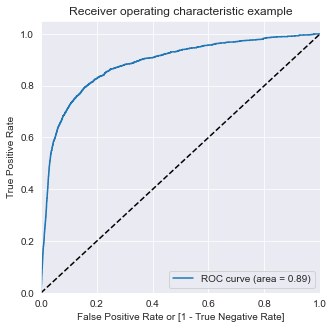

In [78]:
# function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"], drop_intermediate = False)


draw_roc(y_train_pred_final["Churn"], y_train_pred_final["Churn_Prob"])


Area under the curve is 0.89, which is very good. Sensitivity is really low, so will now find the optimal cut-off point to get better accuracy

#### Optimal Cut-Off Point

In [79]:
numbers = [float(i)/10 for i in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.102921,0,1,1,0,0,0,0,0,0,0,0
1,0,0.025520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.023561,0,1,0,0,0,0,0,0,0,0,0
3,0,0.058727,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000337,0,1,0,0,0,0,0,0,0,0,0


Now calculating accuracy, sensitivity and specificity for all the above cut-off points

In [80]:
cutoff_df = pd.DataFrame(columns = ["prob", "accuracy", "sensitivity", "specificity"])

numbers = [float(i)/10 for i in range(10)]

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    specificity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.086638     1.000000     0.000000
0.1   0.1  0.830342     0.801648     0.833064
0.2   0.2  0.897510     0.687912     0.917392
0.3   0.3  0.918646     0.605495     0.948350
0.4   0.4  0.928357     0.471978     0.971647
0.5   0.5  0.922740     0.254945     0.986084
0.6   0.6  0.919551     0.131319     0.994319
0.7   0.7  0.916742     0.062637     0.997759
0.8   0.8  0.914552     0.020879     0.999322
0.9   0.9  0.913410     0.000549     1.000000


Plotting accuracy, sensitivity and specificity

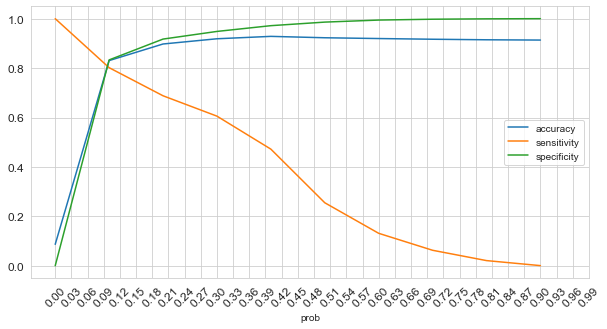

In [81]:
# Plotting accuracy, sensitivity and specificity for various possibilities above

sns.set_style("whitegrid") 

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'], figsize=(10,5))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.03), size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()


From above graph, it can be observed that the optimal cut-off point seems to be 0.1

In [82]:
y_train_pred_final["FinalPredicted"] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.1 else 0)

Checking Accuracy, Confusion Matrix, Sensitivity and Specificity of the final predicted (i.e. cut-off point being 0.1)

In [83]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.FinalPredicted))

0.8303422668634265


In [84]:
confusion = metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"])
print(confusion)

[[15984  3203]
 [  361  1459]]


In [85]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [86]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.8016483516483517
-------- 
Specificity
0.8330640537864179


It can be observed from above that even though the accuracy dropped, the sensitivity has increased vastly. In this case, high sensitivity is required since the prediction is for the users who would churn. With this optimal cut-off point i.e. 0.1, will predict more churned customers (maybe even some that won't churn), which will be better.

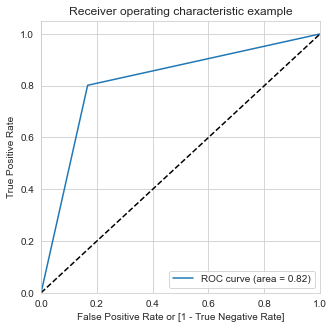

In [87]:
# function to draw ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"], drop_intermediate = False)


draw_roc(y_train_pred_final["Churn"], y_train_pred_final["FinalPredicted"])


#### Prediction on Test Dataset

In [88]:
X_test_interpretable = X_test.copy()

X_test_interpretable = X_test_interpretable[col] # only the columns that we have from out training model
X_test_interpretable.head()

,loc_og_t2m_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,total_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,total_rech_amt_good_avg,std_og_mou_good_avg,loc_ic_t2m_mou_good_avg
39713,0.144827,0.209870,0.095459,0.215733,1.000000,0.099206,0.148815,0.145060,0.167005,0.272126
80955,0.000000,0.000000,0.000000,0.000000,0.107143,0.000000,0.000000,1.000000,1.000000,0.034691
80034,0.178103,1.000000,0.265058,0.109642,0.500000,1.000000,0.000000,1.000000,0.188270,0.000343
93911,0.503546,0.341714,0.051649,0.340712,0.142857,0.000000,0.000000,0.369157,0.092289,0.255060
55461,0.082446,0.777492,0.439632,0.236833,0.428571,0.000000,0.000000,0.224578,0.435875,0.178056


In [89]:
X_test_sm = sm.add_constant(X_test_interpretable)

y_test_pred = res.predict(X_test_sm)


# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
39713,0.014952
80955,0.811303
80034,0.007182
93911,0.025637
55461,0.031013


In [90]:
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,churn,Churn_Prob
0,0,0.014952
1,1,0.811303
2,0,0.007182
3,0,0.025637
4,0,0.031013


In [91]:
y_pred_final['FinalPredicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0) # as our cut-off point was 0.1, we'll use that to predict our test dataset as well
y_pred_final.head()

,churn,Churn_Prob,FinalPredicted
0,0,0.014952,0
1,1,0.811303,1
2,0,0.007182,0
3,0,0.025637,0
4,0,0.031013,0


#### Checking Accuracy, Confusion Matrix, Sensitivity and Specificity on the Test Dataset

In [92]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final["churn"], y_pred_final["FinalPredicted"])

0.8277432252332296

In [93]:
confusion2 = metrics.confusion_matrix(y_pred_final["churn"], y_pred_final["FinalPredicted"] )
confusion2

array([[6854, 1377],
       [ 174,  599]], dtype=int64)

In [94]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [95]:
print("Sensitivity : ")
print(TP / float(TP + FN))
print("-------- \nSpecificity")
print(TN / float(TN + FP))

Sensitivity : 
0.8016483516483517
-------- 
Specificity
0.8330640537864179


Comparing the training dataset and test dataset, below are the metrics:
1. Accuracy for training : 83.03% and Accuracy for testing : 82.77% 
2. Sensitivity for training : 80.16% and Sensitivity for testing : 80.16%
3. Specificity for training : 83.3% and Specificity for testing : 83.3%

#### Feature Importance

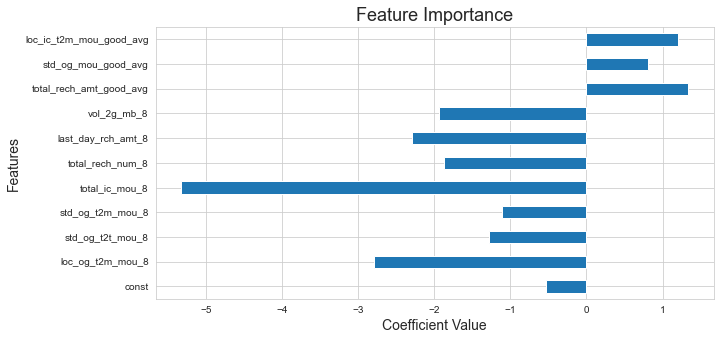

In [142]:
plt.figure(figsize = (10,5))
res.params.plot(kind = "barh")
plt.title("Feature Importance", fontsize = 18)
plt.ylabel("Features", fontsize = 14)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.show()

From the coefficient graph above, it can be observerd that the top 3 features to decide if a customer will churn or not are below:
1. total_ic_mou_8 : -5.3295
2. loc_og_t2m_mou_8 : -2.7948
3. last_day_rch_amt_8 : -2.2981

### High Performance Models

Using PCA from the Statsmodels library to reduce the dimensions and then creating 3 high performance models in the order:
1. Logistic Regression
2. Random Forest
3. XGBoost

Based on their accuracy and confusion matrix, will select the best performing model.

### PCA

In [96]:
pca = PCA(random_state = 42)


In [98]:
pca.fit_transform(X_train)
pca.explained_variance_ratio_.cumsum()


array([0.18958225, 0.33317866, 0.40195417, 0.45746652, 0.51154641,
       0.55161439, 0.58592845, 0.61836544, 0.64654446, 0.67305194,
       0.6982361 , 0.72209158, 0.74463114, 0.76398452, 0.78179275,
       0.79917881, 0.81421936, 0.82886024, 0.8424089 , 0.85530787,
       0.86754095, 0.87853539, 0.88763219, 0.89658957, 0.90489461,
       0.91291611, 0.92065862, 0.92768454, 0.93453461, 0.94060106,
       0.94646531, 0.95205517, 0.95656006, 0.96070968, 0.96472822,
       0.96841907, 0.97203745, 0.97543979, 0.97837045, 0.98111608,
       0.98368151, 0.98595042, 0.98806623, 0.98969959, 0.99120493,
       0.99266389, 0.99377462, 0.99470153, 0.9955726 , 0.99628182,
       0.99680796, 0.99727774, 0.99773019, 0.99812248, 0.99848563,
       0.99884518, 0.99917167, 0.99943616, 0.99964095, 0.99978744,
       0.9999148 , 1.        ])

From the cumulative sum of the explained variance above, it can be observed that after 82%, the addition of the variance is low. So taking the value of 0.82, using the scree plot below will decide the optimal number of components

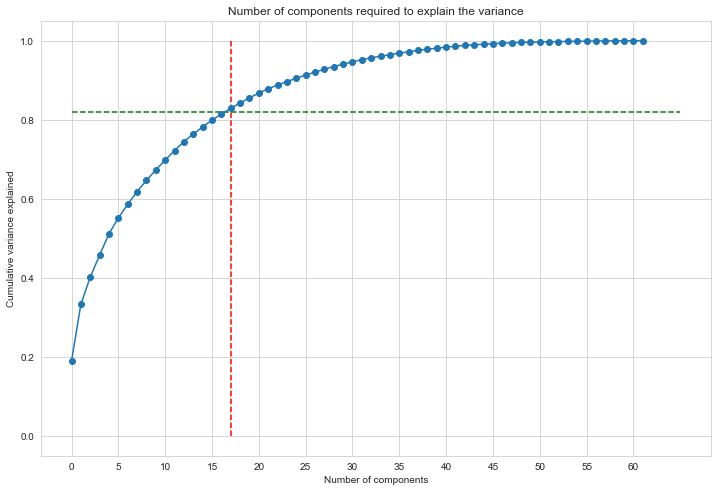

In [99]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)


fig = plt.figure(figsize=[12,8])
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.82, xmax=65, xmin=0, colors="g", linestyles="--")
plt.xticks(np.arange(0,65,step=5))
plt.plot(var_cumu, marker = 'o')
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of components")
plt.title("Number of components required to explain the variance")
plt.show()

So the optimal number of PCA is 17.

In [101]:
pca_final = IncrementalPCA(n_components = 17)
# Incremental PCA doesn't build all the components. It only builds until n_components whereas PCA builds all and then take the top n_components. 
# Since we don't require all the PCA components, we're using Incremental PCA

X_train_PCA = pca_final.fit_transform(X_train)
X_train_PCA.shape

(21007, 17)

In [102]:
X_test_PCA = pca_final.transform(X_test)
X_test_PCA.shape

(9004, 17)

Writing a function to get the accuracy and confusion matrix for training and test dataset that can be called after predicting the datasets using each high performance model

In [103]:
# evaluating the models on the trained test and the test set

def evaluate_model(classifier):
    print("Train Accuracy :", metrics.accuracy_score(y_train, classifier.predict(X_train_PCA)))
    print("Train Confusion Matrix:")
    print(metrics.confusion_matrix(y_train, classifier.predict(X_train_PCA)))
    print("-"*50)
    print("Test Accuracy :", metrics.accuracy_score(y_test, classifier.predict(X_test_PCA)))
    print("Test Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, classifier.predict(X_test_PCA)))

### Logistic Regression

In [104]:
LogRegPCA = LogisticRegression(class_weight = "balanced")
Model_PCA = LogRegPCA.fit(X_train_PCA, y_train)

Making Predictions

In [105]:
evaluate_model(Model_PCA)

Train Accuracy : 0.8219165040224687
Train Confusion Matrix:
[[15787  3400]
 [  341  1479]]
--------------------------------------------------
Test Accuracy : 0.8260772989782319
Test Confusion Matrix:
[[6812 1419]
 [ 147  626]]


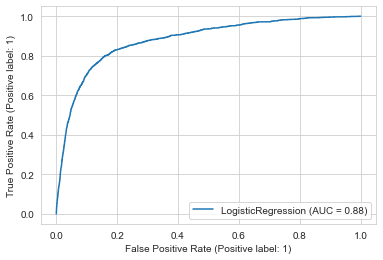

In [106]:
plot_roc_curve(Model_PCA, X_train_PCA, y_train)
plt.show()

### Random Forest

In [107]:
rf = RandomForestClassifier(random_state = 42, class_weight = "balanced", n_jobs = -1)

params = {
    "max_depth" : [5, 7, 10, 12, 14],
    "min_samples_leaf" : [5, 10, 15, 20, 50, 100, 500, 1000],
    "criterion" : ["gini","entropy"],
    "n_estimators" : [10,15,20,25,30,40,50,100],
    "max_features": ["auto", "sqrt", "log2"]
}


grid_search = model_selection.GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 4,
                          n_jobs = -1,
                          verbose = 1,
                          scoring = "accuracy")

In [108]:
%%time

grid_search.fit(X_train_PCA, y_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits
Wall time: 25min 33s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 12, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 100, 500,
                                              1000],
                         'n_estimators': [10, 15, 20, 25, 30, 40, 50, 100]},
             scoring='accuracy', verbose=1)

In [109]:
grid_search.best_score_

0.9154566884804737

In [110]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

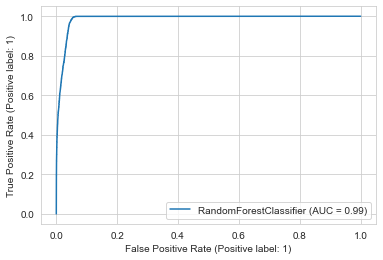

In [111]:
plot_roc_curve(rf_best, X_train_PCA, y_train)
plt.show()

In [112]:
evaluate_model(rf_best)

Train Accuracy : 0.9581568048745657
Train Confusion Matrix:
[[18406   781]
 [   98  1722]]
--------------------------------------------------
Test Accuracy : 0.9141492669924478
Test Confusion Matrix:
[[7781  450]
 [ 323  450]]


### XGBoost

In [113]:
xgb_model = xgb.XGBClassifier(class_weight = "balanced")

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200, 300, 500]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator = xgb_model, 
                                       param_grid = parameters, 
                                       n_jobs=-1, cv=4, 
                                       scoring = scorer, 
                                       verbose = 1, 
                                       refit=True)

In [114]:
%%time
clf_xgb.fit(X_train_PCA, y_train)

Fitting 4 folds for each of 750 candidates, totalling 3000 fits
[15:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1h 7min 48s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [115]:
clf_xgb.best_score_


0.8857157825258588

In [116]:
xg_best = clf_xgb.best_estimator_
xg_best

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=19, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

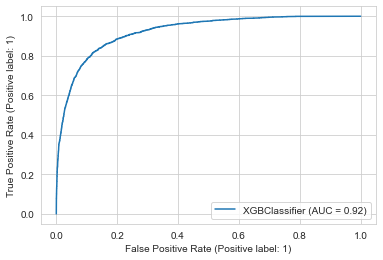

In [117]:
plot_roc_curve(xg_best, X_train_PCA, y_train)
plt.show()

In [118]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xg_best.predict_proba(X_train_PCA)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xg_best.predict_proba(X_test_PCA)[:, 1]))

AUC on train data by XGBoost = 0.9234149925229822
AUC on test data by XGBoost = 0.8827867008939636


## Conclusion and Final Remarks

* 1 interpretable model was created to see what factors are the most important for a customer to decide if they'd like to churn or not. 
* 3 high performance models were created using: Logistic Regression, Random Forest, and XGBoost. All the 3 models gave fairly high accuracy for training and test datasets.
* ***Random Forest Model*** works best on the data given and will be best to predict the future customers who could possibly churn. This model was **95% accurate** on the training set, and on the unseen test dataset accuract of **91%** was received, which is very high and good. Random Forest was also less computationally less expensive.
* From the **interpretable model** , the top 3 important features:
    1. total_ic_mou_8 : -5.3295
    2. loc_og_t2m_mou_8 : -2.7948
    3. last_day_rch_amt_8 : -2.2981

### Feature Importance Graph

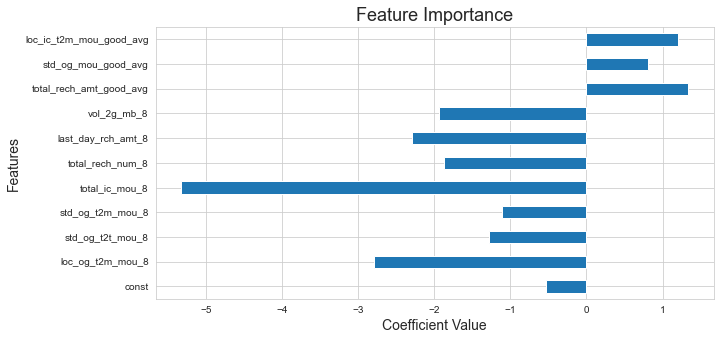

In [143]:
plt.figure(figsize = (10,5))
res.params.plot(kind = "barh")
plt.title("Feature Importance", fontsize = 18)
plt.ylabel("Features", fontsize = 14)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.show()